## Import and load the spacy model

In [27]:
import spacy
import random
from spacy.util import minibatch, compounding
from pathlib import Path
from spacy.training.example import Example
from .Users//TrainingDataFinal import TRAIN_DATA
import matplotlib.pyplot as plt

SyntaxError: invalid syntax (250017849.py, line 6)

In [9]:
''' < reading data > '''
with open('data\jobs_crawl_filter_jobsuche_en.csv', encoding="utf8") as f:
    contents = f.readlines()

FileNotFoundError: [Errno 2] No such file or directory: 'data\\jobs_crawl_filter_jobsuche_en.csv'

In [4]:
JobTitle = list()
JobID = list()

In [19]:
separedted_Skills = list()

In [5]:
true_Skills = list()

In [6]:
''' < Extracting Title of the Job >'''
for jobs in contents:
    for jobTitle in jobs:
        index = jobs.index(jobTitle)
        if jobTitle.isdecimal() and (jobTitle+jobs[index+1]==jobTitle+'|'):
            jobTitle = jobs.split('|')[2]
            jobId = jobs.split('|')[0]
            if jobTitle not in JobTitle:
                JobTitle.append(jobTitle.lower())
            if jobId not in JobID:
                JobID.append(jobId)
            break

In [7]:
print(len(JobTitle))

6879


In [8]:
''' < Extracting Job Descriptions of the Job >'''
JobDescription=list()

description = ''
for jobs in contents:
    for jobTitle in jobs:
        index = jobs.index(jobTitle)
        if jobTitle.isdecimal() and (jobTitle+jobs[index+1]==jobTitle+'|'):
            if len(description)>0 and description not in JobDescription:
                # description = description.replace("\n", "")
                JobDescription.append(description)
            description = ''
            break
        else:
            jobTitle = jobTitle.replace("\n", "")
            description=description+''+jobTitle.lower()
    description=description+' '

In [9]:
print(len(JobDescription))

6772


In [10]:
''' < Train a New NER > '''
nlp=spacy.load('en_core_web_sm')

In [11]:
# Getting the pipeline component
ner=nlp.get_pipe("ner")

# New label to add
LABEL = "SKILL"

# Add the new label to ner
ner.add_label(LABEL)

# Resume training
optimizer = nlp.resume_training()
move_names = list(ner.move_names)

# List of pipes you want to train
pipe_exceptions = ["ner", "trf_wordpiecer", "trf_tok2vec"]

# List of pipes which should remain unaffected in training
other_pipes = [pipe for pipe in nlp.pipe_names if pipe not in pipe_exceptions]

# Begin training by disabling other pipeline components
with nlp.disable_pipes(*other_pipes) :

  sizes = compounding(1.0, 4.0, 1.001)
  # Training for 30 iterations     
  for itn in range(60):
    # shuffle examples before training
    random.shuffle(TRAIN_DATA)
    # batch up the examples using spaCy's minibatch
    batches = minibatch(TRAIN_DATA, size=sizes)
    # ictionary to store losses
    losses = {}

    for batch in batches:
        texts, annotations = zip(*batch)
        
        example = []
        # Update the model with iterating each text
        for i in range(len(texts)):
            doc = nlp.make_doc(texts[i])
            example.append(Example.from_dict(doc, annotations[i]))
        
        # Update the model
        nlp.update(example, drop=0.5, losses=losses)

C:\ProgramData\miniconda3\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Experience in field service and acquisition " with entities "[(1, 45, 'SKILL')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\ProgramData\miniconda3\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Telemarketing " with entities "[(0, 15, 'SKILL')]". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\ProgramData\miniconda3\Lib\site-packages\spacy\training\iob_utils.py:149: UserWarning: [W030] Some entities could not be aligned in the text "Class B driver's license must be available " with entities "[(0, 26, 'SKILL')]". Use 

In [17]:
# n=0
# # Testing the NER
# for jobdes in JobDescription[1:]: 
#     n+=1
#     doc = nlp(jobdes)
#     # print("Entities in \n")
# #     print(jobdes)
#     print('\n')
#     for ent in doc.ents:
# #         print(ent)
#         print(ent.text)
#         if ent.text not in separedted_Skills:
#             separedted_Skills.append(ent.text)




gäubodenbäcker hahn gmbh builds
corporate culture
bake fresh rolls
prepare delicious snacks and coffee specialties
implementation of hygiene regulations
knowledge as a salesperson will make
pleasant working atmosphere
individual training
gäubodenbacker hahn gmbh hadersbacher strasse
9418 0"|specialist salesperson - food craft


gäubodenbäcker hahn gmbh builds
corporate culture
specialist shop in regensburg
bake fresh rolls
prepare delicious snacks and coffee specialties
implementation of hygiene regulations
knowledge as a salesperson will make
pleasant working atmosphere
individual training
gäubodenbacker hahn gmbh hadersbacher strasse
9418 0"|specialist salesperson - food craft


gäubodenbäcker hahn gmbh builds
corporate culture
specialist shop in deggendorf
bake fresh rolls
prepare delicious snacks and coffee specialties
implementation of hygiene regulations
knowledge as a salesperson will make
pleasant working atmosphere
individual training
gäubodenbacker hahn gmbh hadersbacher st



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


individual delicacies
places in munich city center
training branch
family working environment
apprenticeship 1000 €
apprenticeship 1100 €
apprenticeship 1200 €
forming benefits
free of charge   - annual employee events
summer party
manufacturing and product knowledge
professional sales techniques
professional sales promotion
recognizing and fulfilling customer wishes
takeover opportunities
branch manager
enjoy furnishing a counter
terms of working hours
commitment
motivation
secondary school certificate
application proces



basics of electrical engineering
apprenticeship as an electronics technician
crane and forklift driver's license
secondary school leaving certificate
mathematics
physics
english
ability to work in a team
reliability
flexibility
advantages with us                  for us
nationality
ethnic
social background
||thyssenkrupp automation engineering
operating business unit
ernstthal/chemnitz site - the technology center for battery solutions - forms the value-added process from lithium-ion cell production


apprenticeship as a mechatronics technician
crane and forklift driver's license
secondary school leaving certificate
mathematics
physics
english
ability to work in a team
reliability
flexibility
advantages with us                  for us
nationality
ethnic
social background
||thyssenkrupp automation engineering
operating business unit
ernstthal/chemnitz site - the technology center for battery solutions - forms the value-added process from lithium-ion cell production


​​project managem



civil engineering
benefits  
37-hour week
experience in the construction industry
driver's license
ability to work in a team
work independently
application please send
earning opportunities
|helper
civil engineering||2023


benefits  
37-hour week
lead and mentor
technical understanding and manual skills
experience in the construction industry
driver's license
team spirit
physical resilience
application please send
earning opportunities
civil engineering||2023


professional in building technology
salzburg alps
environmental standards
independent planning
control and construction supervision
executing companies
architecture
electrical engineering
fire protection technology
training in the field of tga
entrepreneurial thinking
knowledge of autocad
communicative personality
independent working style
trips to customers
team player
analytical understanding
feel for numbers
pleasant working atmosphere
market-compliant overpayment
seeing you!"|project




apprenticeship at jysk means
appre



time  purpose and goal of the position we
several warehouse employees
competencies
general warehouse activities - receipt of goods - goods issue - posting of incoming and outgoing goods - quality control  personal requirements and social skills
experience in handling food
driving license
permanent employment relationship
hourly wage above the agreed rate
|helper - warehousing
member of the igz.
association of german temporary employment agencies


time  purpose and goal of the position we
competencies
control - packing activities  personal requirements and social skills
experience in production
driving license
permanent employment relationship
member of the igz.
association of german temporary employment agencies
berlin hewi stands for holistic
areas of accessibility
areas of responsibility  •
business partners
implementation of the specified marketing measures
house trade fairs
architectural or business degree
sales/marketing
commercial training
experience in the hvac environment
in



apprenticeship and become a full team member
areas of real estate
office management
commercial office management
organization
management of office/business processes
several interesting areas of application
finishing
high school diploma
vocational diploma
verbal and written communication skills
areas of responsibility
laptop   - discounted fitness membership
home office


service technician
nationwide personnel consultancy
focus on direct recruitment
specialist in the field of maintenance and repair of wind turbines
repair measures
control and regulation technology
task of diagnosing and rectifying the faults •
mechatronics technician
solid electrical knowledge
knowledge of control and regulation technology
hydraulics
power electronics
general mechanics
team player
speak good german
driving times are working hours
external training
directly online
seeing you!"|service technician


commercial or technical vocational training
automobile salesman
certified automobile salesman
experience



commercial properties
renovation
market exploration
purchase negotiations
asset management
sales examination
individual offices
administration of residential property
control of current payments
management
independent
karthago property management software


driving wheel loaders
flat hierarchies
acceptance and handover of vehicles
execution of work orders
basic technical
driver's license
structured
independent way of working
ability to work in a team
commitment
reliability
enjoy working in the fresh air"|customer service


versatile machine fleet
family working atmosphere - a secure
permanent employment relationship
collegial togetherness
system-relevant job - regular electronic
troubleshooting on wheel loaders
screens
tractors
entire machine fleet
commercial vehicle/agricultural machine or construction machine mechanic/fitter
team player
bring motivation
driving license classes


strong and experienced partner
performance-based remuneration
tasks also include the representation of t



educational recommendations
appreciative working environment
possibility of free allocation
good working atmosphere
multi-professional teams
leadership skills
state-recognized as an educator
degree as a childhood educator
social worker
40 hours per week) for our two facilities in langenfelder damm
office programs
structured way of working
assertiveness


b2b sales
2,200 customer advisors
product partners entrust us with their sales
multi-channel media
turnover of 1.4 billion
office atmosphere
directly to building
shopping discounts
corporate benefits
potential every
head between calls
office working hours
structured onboarding
existing customers
tailor-made
individual advice
term customer loyalty
knowledge of german enjoy the daily contact
existing customers
communication skills


strong and experienced partner
performance-based remuneration
tasks also include the representation of the most successful online supermarket in europe
receipt and processing of parcels and mail - checking




several hematological malignancies
promising studies being launched
focus on toxicity mechanisms
young international colleagues
students in medicine
excellent academic background
background in cell biology
experience in protein biochemistry
supervision of prof
degree the doctorate program involves
structured training program
recognized speakers
specialist clinics
departments
excellent research and teaching enable patient


fare  these great tasks
control of products • packing of goods  you inspire us if you: • apply to us and want to work with us • send
areas in which you can demonstrate your skills
administration 073140318610 01722413944 (also whatsapp)  eura personal süd gmbh mrs
rühl muensterplatz
eura group focuses
areas of trade
medicine and office workers


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on respons



everything revolves around the greatest possible meat enjoyment
flat hierarchies
roster and long-term holiday planning so that your private life
free drinks
guests warmly
prepare the cash register
team player
experience in restaurant management
specialist in system catering


thermocouples
sheathed thermocouples
addition to fair remuneration
40-hour week
capital-forming benefits
free drinks
area of ​​responsibility
existing programs
mechanical department
profound programming knowledge
in-depth


allgäu in ottobeuren kneipp
individual travelers
congress participants
making and serving bar drinks
ability to work independently


partylite's beautiful candles
time-management no minimum sales weekly commission payment
bulk orderer
accept orders
business online


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibilit



regulated working hours without weekend or even night shifts
organization of work processes
roster design  
assessment of care needs  
training in geriatric care
health
nursing  
training in nursing management  
communicative personality
organizational skills  
assertiveness  * creativity
driver's license
advita academy
advancement opportunities  
advita team
application!  
service manager|advita pflegedienst gmbh
branches in berlin
saxony-anhalt
thuringia
baden-württemberg and
advita cares
shared apartments
home and cares
advita houses combine these


advita houses
departments involved in project management
varied working
implementation of the overall project  
departments involved  
commercial or technical area
degree in project management  
experience in project work
independent
optimize processes
organizational talent
knowledge of ms office  
assertiveness
persuasiveness
driver's license
knowledge of german
permanent employment
structured onboarding program  
health insurance
adv



external training
basic further training
nice living environment
corporate benefits program gives
areas of vascular diseases
entire musculoskeletal system
license to practice medicine
ability to work in a team


several tesla mrts
advanced training authorization
external training
benchmark study
health management system
corporate benefits
nice living environment
medical result measurement
specialist in neurology
experience in neurology
social skills
regardless of gender
corporate culture


nice living environment
budget responsibility
taking into account medical
accident surgery
hospitals and rehabilitation facilities
specialist in orthopedics
leadership skills
regardless of gender
corporate culture


equipped medical practice
administration
practice equipment
general medicine  
german license
practice medicine
experience in the field of general medicine
regardless of gender
corporate culture


mecklenburg scope
specialist in gastroenerology •
several years of experience in the field



ayaz ohg
passion for meat
competent advice
portioning of meat
professional training as a butcher
communication skills
enthusiasm
team spirit
sense of responsibility
tackle independently
rehearsed team
individual career opportunities through
salary - save
application reaches the right contact person
regardless of gender
nationality
ethnic
social origin
religion/belief


stores in menden
demanding and varied
areas of responsibility
pleasant working atmosphere
collegial working environment
promoting design of the department
cleanliness - pricing
implementation of sales promotion measures
several years of professional experience in the meat/delicatessen trade
apprenticeship - in-depth knowledge
sense of responsibility
enthusiasm
swords - baarstrasse 111
complete and meaningful online application
salary expectations


terms of working hours and place of work
training as a tax clerk
experience in the independent client support
enjoy working in a team
individual working time regulation
spor



fittings
areas in order
​​responsibility  • competent advice
taking into account individual customer requirements • quotation calculation
tracking and processing • management
processing of customer master data  that
basic qualities.
afraid of office dogs
commercial training
wood-based materials
communication skills
team spirit
regulated working hours
structured
multi-week induction
pleasant working atmosphere
directly online
answer any questions you may have in advance
tasks independently


crispy rolls
competent advice
professional training as a bakery salesman
experience in food retail
knowledge of food
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - save
compatibility of work, family and private life through a family-friendly personnel policy
application reaches the right contact person
regardless of gender
nationality
ethnic
social background


billing of order services
assertiveness
bring
teamwork skills
en



berlin-zehlendorf
permanent employment relationship
structured american innovation
areas of shopping
mechatronics technician
precision mechanic
precision equipment construction
independent working methods
application for the position as electronics technician
application documents directly
electronics technician
system technology|"neo temp gmbh
innovative processes
practice-oriented expertise


cross-functional
agile team
control-relevant key figures of retail germany
data architecture
data from the diverse system world of the company
several product teams
departments of controlling in retail germany
central office
schedule your working hours independently
business processes
application documentation
product through refactoring
cost controlling
enjoy advising customers
implementation of product requirements
solution-oriented thinking
structured way of working help
agile mindset makes
degree in (business) computer science
economics
business administration
mathematics
data warehouse ap



market in hagen butcher
demanding and varied
areas of responsibility
pleasant working atmosphere
collegial working environment
promoting design of the department
cleanliness - pricing
implementation of sales promotion measures
several years of professional experience in the meat/delicatessen trade
apprenticeship - in-depth knowledge
sense of responsibility
enthusiasm
complete and meaningful online application
salary expectations


driving force
training as a salesman specializing in delicatessen
prepare goods for sale • to present goods
sales promotion measures
secondary school leaving certificate
application reaches the right contact person directly
regardless of gender
nationality
ethnic
social background


€18.00 • permanent employment
forming benefits
mechatronics technician
experience in mechanical engineering
dream gmbh
been supporting companies
commercial temporary employment
nationwide network
mechatronics technician


€18.00 • permanent employment
forming benefits
mechatroni



forming benefits
individual components
control of the welds  requirements:  •
training as a welder
several years of professional experience
several years of professional experience in industry • ability to work in a team
dream gmbh
been supporting companies
commercial temporary employment
nationwide network


forming benefits
troubleshooting  requirements:  •
mechatronics technician
experience in mechanical engineering
dream gmbh
been supporting companies
commercial temporary employment
nationwide network


placing specialists
corporate security department  • advice
departments on determining the protection requirements for information clusters
service providers
economics
social sciences
analytical skills
future team
corporate culture
name culture
regional team events
corporate benefits  apply
mail to job-69@top-itservices.com
jill-cristin krampf


control the incoming goods professionally.
certificate of enrollment as a registered student
bachelor's
master's
state examination course



allgäu employment type(s
machine and plant operator
prepare packaged goods for shipment  you bring
several years of professional experience as a machine operator
driving license
allowances - holiday and christmas bonuses
chances of being hired
free work clothes
shoes tempster gmbh


monitoring
processing of business orders
chances of being hired
free work clothes
|helper


forklift driver
loading and unloading of trucks - order
experience - forklift license
€
allowances - holiday and christmas bonuses
chances of being hired - working
free work clothes
|forklift


train stations
enthusiasm for trading
reliability and conscientiousness
independence and enthusiasm
lekkerland offers
rehearsed team
application reaches the right contact person
regardless of gender
nationality
ethnic
social background


booming
experience in the warehouse (not absolutely necessary
hourly wage of €16 per hour
salary at the same time
free of charge
vehicle
employer contribution - free fruit
cover letter
enclo



master electrical engineering
areas of building technology and plant construction
​​responsibility  organization
management
control of the entire technical building management
taking into account the relevant legal provisions
master craftsman part
looking way of working • ability to work in a team
driver's license
degree in supply engineering
facility management
basic qualities.
directly online


areas of building technology and plant construction
several properties • carrying out maintenance, inspections and repair work
troubleshooting and repairs • security
instructions
external companies
looking way of working • ability to work in a team
basic qualities.
directly online


house technician
areas of building technology and plant construction
​​responsibility  • supervisor
troubleshooting and troubleshooting
troubleshooting
apprenticeship as plant mechanic
looking way of working • ability to work in a team
driver's license
basic qualities.
directly online
seeing you!"|plant mechanic 



several large trading
sales responsibility
areas of responsibility
areas - solution of customer-specific problems taking into account the technical feasibility
profitability calculations
drafting and ongoing conclusion
implementation of target group-relevant events
experience in field service
experience in the successful acquisition
assertiveness - independent
structured
negotiation skills
good written and spoken english skills
office management.||2023


driving license tests
reports on vehicle damage
automotive engineering
electrical engineering
experience in the automotive industry
careful way of working
sense of responsibility
communication skills
driver's license
standard engineer's salary
possibility of performance bonuses
social benefits
motor vehicle expert


driving license tests
reports on vehicle damage
automotive engineering
electrical engineering
experience in the automotive industry
careful way of working
sense of responsibility
communication skills
driver's license
stan



permanent employment relationship
work in rail vehicle construction
areas of shopping
individual parts
assembly of finished assemblies
individual components
construction mechanic
locksmith
plant mechanic
knowledge of rail vehicles
application for the position of locksmith
application documents directly
0"|industrial mechanic|"neo temp gmbh
innovative processes
practice-oriented expertise


permanent employment relationship
work in rail vehicle construction
areas of shopping
troubleshooting
training in the field of mechatronics technician
agricultural and construction machinery mechatronics technician
electronics technician
assembly
circuit diagrams
experience in new construction
application for the position as a mechatronics technician
application documents directly
0"|mechatronics technician|"neo temp gmbh
innovative processes
practice-oriented expertise


permanent employment relationship
work in rail vehicle construction
areas of shopping
aircraft mechanic
mechanic
agricultural an



berlin-zehlendorf
permanent employment relationship
structured american innovation
areas of shopping
control of manufactured parts
cutting machine operator
knowledge of operating
implementation of technical drawings
independent way of working • high quality awareness • ability
application for the position as a cnc miller
application documents directly
innovative processes
practice-oriented expertise


berlin-zehlendorf
permanent employment relationship
structured american innovation
areas of shopping
control of the manufactured circuit boards
soldering wave bath
control and documentation
mechatronics technician
electronics technician
electronics technician
electronics technician
precision mechanic
​​responsibility • working under clean room conditions
application for the position as a soldering technician
application documents directly
0"|solderer|"neo temp gmbh
innovative processes
practice-oriented expertise


berlin-zehlendorf
permanent employment relationship
structured american 



permanent employment relationship
€15.00 per hour • working hours:
interesting tasks
areas of shopping
industrial mechanic
pipe fitter
process mechanic
experience in welding & assembly of pipelines • reading technical drawings
application for the position as fitter/pipeworker/welder
application documents directly


permanent employment relationship
interesting tasks
areas of shopping
customs
implementation of export controls
customs
forwarding clerk
clerk - logistics
customs
foreign trade knowledge
experience in shipping and export processing
experience working
temporary employment agencies/subcontractors
application for the position as an employee
logistics / export directly
application documents directly


permanent employment relationship
interesting tasks
varied activities • working in a renowned and future-oriented innovation
areas of shopping
technical and commercial preparation
system technology
commercial training as an industrial clerk
clerk - office management
technical und



permanent employment relationship
interesting tasks
areas of shopping
process mechanic-plastic/rubber-t.-plastic windows
woodworking mechanic
carpenter
wood mechanic
experience in the described area of ​​responsibility
application for the position as a carpenter
application documents directly


permanent employment relationship
€15.00 per hour
interesting tasks
areas of shopping
assembly of individual parts
control on the welds  ☑
apprenticeship in the metal sector
specialist training
tig welder
basic welder pass
experience in tig welding of thin sheet metal •
good technical understanding • willingness to work rotating shifts • independent
application for the position as a tig welder
application documents directly
0"|tig welder||2023


permanent employment relationship
interesting tasks
varied activities
areas of shopping
assembly of individual parts
according to drawings, welding thin sheet metal
control on the welds  ☑
vocational training
tig welder
experience in tig welding of thi



side to getting things moving in the telecommunications market
independent way
billing of construction work
knowledge of setting up fttx infrastructure systems
knowledge of ms office
knowledge of planning and documentation programs
assertiveness
product - responsibility for interesting construction projects
optimize processes
support in reconciling work and family through mobile working
expanding horizons
future of telecommunications
sales and marketing
please send
email to karriere.muc@serviceline-online.de
response within
10 working


location: munich employment type(s
driving processes
several branches nationwide
personnel management
personnel organization
personnel planning
executives
technical and disciplinary responsibility
bargaining and labor law provisions
experience in the field of hr - preferably in a medium-sized company - you know the challenges of modern hr work and are ready to break new ground - extensive
knowledge of works constitution
good ms office skills
establish



kirchheim near munich employment type(s
training as a technician
engineer
ordering of materials
preparation of measurements and responsibility for billing - supplements and creation of the documentation
apprenticeship as a technician/engineer specializing in supply engineering
mechanical engineering
planning of fire protection systems
knowledge of ms office
autocad - class b driver's license
benefits - appealing compensation
email to karriere.muc@serviceline-online.de
response within
10 working


enjoy working in a team
accounting and project controlling
general assistance
billing of projects
hoai/director
monitoring and control of working time reports - interface
commercial training
commercial knowledge
knowledge of construction and public procurement
hoai - secure ms office knowledge
enjoy office administration
loyal
pleasant working environment
beautiful offices
lots of light
efficient employees
team leader
accounting and project controlling
specialized in the field of supply engi



known customers
temporary employment agency
time working time
40 hours per week  your area of ​​responsibility  • cutting laths
painting
assigning
g. dormers
driving license
good working atmosphere - protection through hygiene mouthguard and mask  
email to bergmann@franz-personalpartner.de
8:00 a.m. -
branches in schluechtern, hameln
employment relationship
social security and fair remuneration
known companies


time working time
40 hours per week  purpose and goal of the position for
known customer from frankfurt am main
competencies
training as a vehicle mechanic
vehicle mechatronics technician
vehicle electrician
determination of required spare parts
elimination of electronic
€300 bonus for each new employee
known customers
permanent staff
good working atmosphere - supervision
email to merz@franz-personalpartner.de
frankfurt am main  we are looking forward
069 / 244 04915  motor vehicle
mechatronics
mechanic
motor vehicle
allowances"|car mechanic|"franz personalpartner gmbh & co.



basic computer skills
knowledge of german
path to recruitment:
duty scheduling
team leader


exemplary customer orientation
yesterday's consistent values
prerequisite for meeting the highest demands of our customers
documentation of customer orders
electronics technician
experience in the field of special constructions
personalservice.de"|electronics technician


exemplary customer orientation
yesterday's consistent values
prerequisite for meeting the highest demands of our customers
control of production processes
control on manufactured components
knowledge of siemens and heidenhain controls
editing technical drawings - willingness to work in shifts - good
knowledge of german in order


ruhr  
exemplary customer orientation
yesterday's consistent values
prerequisite for meeting the highest demands of our customers
essen location
specialist training
team skills


commercial and technical areas
prerequisite for meeting the highest demands of our customers
exemplary customer orientati



walks
cleaning
motivation
basic care
showering/going
structured way of working
€
deployment planning
assistenzplus department
application?
application documents
social care||2023


shopping
basic care
dressing and undressing
showering
knowledge of german
office work
driving license
driver's license
path to recruitment:
% night surcharge
duty scheduling
team leader


mainz - worms - darmstadt type of employment
social work
social pedagogy
educational science
structured way of working
enjoy working with people with disabilities
driving activities
areas of responsibility
assistance with going
deployment planning
answer them
social


folding rule
team leader
path to recruitment:


activity  • supervision
national and international suppliers and partners
business or technical studies
commercial or technical training
negotiating skills
assertiveness
social benefits
application and getting to know you!"|technician - cutting technology|"we
several companies


duty scheduling
team leader
shif



specialist in the commercial-technical segment
supporting our customers
branches throughout germany
corporate network
training in the technical field
several years of professional experience in the field of cnc machining • independent
forming benefits
576 euros
lead to takeovers high
answer them
details via the offered online application
commercial and technical temporary employment


daily bread:  - you pay attention
körner gretel
mina
prepare breakfasts
haccp)"|salesperson - food trade||2023


körner gretel
mina
prepare breakfasts
haccp)"|salesperson - food trade||2023


experience in service -
15:52:06.407


körner gretel
mina
prepare breakfasts
haccp)"|salesperson - food trade||2023


körner gretel
mina
prepare breakfasts
haccp)"|salesperson - food trade||2023


körner gretel
mina
prepare breakfasts
haccp)"|salesperson - food trade||2023


körner gretel
mina
prepare breakfasts
haccp)"|salesperson - food trade||2023


secondary school in your pocket - you enjoy customer contact
gr



training as a baker
master baker
experience in dough production
knowledge of raw materials
influence of environmental factors
prepare starters
hygienic working environment"|master


experience in the cleaning area
haccp requirements
special hygiene measures


application deadline
specialist in neurology   
knowledge of apparatus-based neurological diagnostics
ability to work in a team
organizational skills
personnel responsibility - company pension
health promotion
social counselling
structured induction
antonius hospital kleve
liquor diagnostics
evop's
computer tomography
general and liquor laboratory
antonius hospital kleve
professional spectrum
specialist training courses
museums and cultural institutions
state youth welfare office
association of remedial educational aids
general information
cover letter
training/degree
official assessments
application in german
degree abroad
employment reference
environmental protection
application folders
cover letter
training/degree
official as



processing of orders
organization of meetings
general office work
office organization
training in the commercial sector
experience - computer knowledge
communication skills
higher wages
health management
experience in personnel services
professional future together
data protection
time front office manager
future workplace
​​responsibility  • management of the front office department
ensuring
leading and motivating employees
complaint management
communication skills
good written and spoken german
english
language skills
motivation
sense of responsibility
independent work
organizational talent
employee events
directly online
excellent network secures competent advice


specialist training in both the commercial and technical areas
german
forming benefits
occupational medical
network of companies
business partners
experience in the personnel industry solution-oriented every


processing of orders
organization of meetings
general office work
office organization
training in the commercia



specialist training in both the commercial and technical areas
german
companies in freising and munich
commissioning of prototypes
power electronics
mechatronics
enjoy working in a nice and open team
soldering skills
forming benefits
occupational medical
network of companies
business partners
starting date
electronics technician
experience in the personnel industry solution-oriented every


system configuration
physics
mathematics
side with advice
interesting and varied field of activity
|electronics technician
co. kg


computer-controlled processes
machine work
side with advice
interesting and varied field of activity


time working time
professional personnel service
waldkraiburg
daytime working hours
experience in logistics
driving license
enjoy working in a team
knowledge of german
general warehouse activities - you load and unload trucks
prepare the shipment of goods  we offer: - attractive salary
chance of being taken over
kg - waldkraiburg
|helper - warehousing


eight highly 



locations in cologne, munich
competencies
external specifications
experience in the field of warehouse logistics
employer benefits/corporate
employer-funded pension - interesting activities
application documents
salary expectations
paul-heyse
locations in cologne, munich
time working time
competencies
general administrative
document management
business partners
organization of business appointments
management of appointment calendars
external service providers
commercial training - relevant experience in the field of assistance
knowledge of italian
ability to work independently - class
driver's license
employer benefits/corporate
employer-funded pension - interesting activities
application documents
salary expectations
paul-heyse


general household activities
hygienic standards
working hours
reliability
health certificate
enjoy working with food
knowledge of german
communication skills


known customers
general picking work - scanning
experience in the field of warehousing and logis



200-year tradition that runs
tree nurseries
external institutes
specialist and product range training courses
employee pc program
employee referral program
gifts on special occasions
employer contributions based
enjoy working in a team
work independently
knowledge of german
lifting platforms


200-year tradition that runs
tree nurseries
external institutes
specialist and product range training courses
employee pc program
employee referral program
gifts on special occasions
employer contributions based
enjoy working in a team
certificate of expertise in crop protection
knowledge to our customers


civil servants
german pension insurance bavaria south
training as a clerk for office management
commercial training
structured
​​responsibility in a permanent part-time position
hours/week) • remuneration
health management
leisure sport • benefits
external companies
deutsche rentenversicherung bayern
regardless of their origin
general questions
disposal for technical questions
march 23


str



future workplace
​​responsibility  • professional preparation
experience in the kitchen • independence
external development
external cooperation partners
directly online
excellent network secures competent advice
15:52:30.692


berlin-neukölln  we are now looking for a full-time banquet service manager
future workplace
congress
berlin-neukölln
​​responsibility  • organisation
implementation of events • management
timekeeping of temporary workers
safe way of working  the company offers  • permanent employment
external benefits  
directly online
excellent network secures competent advice


hotel all-rounder
hotel all-rounder
time in shift work
future workplace
stylish economy hotel
​​responsibility  • hassle free
control activities
common front office system
teamwork
multitasking • driving license
edge front office program
independent shift management
directly online
excellent network secures competent advice


time sole chef
future workplace
wellness and health facility
​​responsibili



future workplace
control of the kitchen • personnel planning • planning and execution
sense of sustainability and responsibility • ability
enthusiasm
no facilities
directly online
excellent network secures competent advice


future workplace
enthusiasm
no facilities
exciting task
directly online
excellent network secures competent advice


future workplace
​​responsibility  • preparation of meals for breakfast
several years of professional experience
enjoy working in the kitchen • open-minded team player
permanent employment relationship
directly online
excellent network secures competent advice


social media coordinator
time social media coordinator
future workplace
​​responsibility  • creation of a monthly editorial plan
cooperation partners
semi-annual monitoring
independent way of working  the company offers  • above-average salary
electronic working time accounts
everything you need to get to know each other  this
directly online
excellent network secures competent advice


tim



training as a nursing specialist
health worker
apprenticeship or are already experienced in your professional life - we welcome applicants
application documents directly to us at jobs[at]rocket-match.de


implementation of strategies
entire digital product portfolio</span
degree in business informatics
knowledge of digitization software
ability to work in a team
independent way of working
good written and spoken english knowledge  <br>  we offer:                                               - your personal development
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
employees and customers
maximum of flexibility
reliability


several hundred employees
nice team
social benefits
multi-spindle lathes
experience in the field of
multi-spindle machines
structured way of working  what's next
seeing you!"|industrial mechanic - industrial engi



samsung places great value
bringing simplicity
development partner
added value
business model
control and monitor kpis
degree in business administration
degree in healthcare
experience in launching and operating
experience in the field of health
knowledge of regulations
values ​​to partners
team player
communication skills
korean
home office
world of engineering
employees security
corporate culture
name expresses
class engineering
name expresses
employees and customers
maximum of flexibility
reliability
expansion
electronics
test series
engineering/mechatronics
bachelor/master
experience in handling high-voltage components
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


independent error detection
error analysis
software-technical problems
processing of specif



data &amp
data and reports.
summary of key metrics
data • analysis and reporting
platforms/initiatives
degree in business administration
focus on controlling
experience in the ecommerce business
knowledge of data management
experience with data integration
strong analytical thinking skills
result-oriented way of working •
ability to understand and simplify complex
analytical relationships
team-oriented
communication skills
speak
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
scientist|"matching engineering
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


account management
vocational training
experience in recruiting
good ms office skills
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
"|recruiter|"matching eng



scale plant construction - you are jointly responsible for the creation of technical descriptions
application
external suppliers - close cooperation
engineering team
consisting of process engineering
mechanical engineering
degree in mechanical engineering
experience in plant construction through internships
theses
knowledge of sap/r3
good written and spoken english knowledge  <br>  we offer:                                               - your personal development
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
employees and customers
maximum of flexibility
reliability


derivation of standard-compliant component
mechanical engineering
experience in the design of plastic components
nbsp;experience in plastics processing
processes - &nbsp;english
world of engineering
employees security
corporate culture
name expresses
mechanical and pl



regional sales managers
implementation of reports and dashboards
microsoft power
administration of the selective sales program
apprenticeship, degree
several years of professional experience in sales/sales management
master ms excel
microsoft power
large amounts of data are also essential •
knowledge of german
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


corporate strategy and management decisions
external inquiries
degree in economics
knowledge of sap sd / mm &amp
analytical thinking
good understanding of numbers
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
chain-manager|"matching engineering
class engineering
name expres



sales controlling
sales controlling
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


management
implementation of pr and influencer relations campaigns
tasks also include project evaluation
event organization
localization of means of communication
european
degree in marketing
humanities
social sciences
journalism/media/journalism
experience in the field of public relations
influencer relations
distinctive skills in project organization
​​classic and social media
english language skills
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


mark



​​business process management -
implementation of celonis process mining projects
administration and technical development
​​process mining and process analytics
extension of management
business process performance dashboards
degree in business informatics
computer science
economics
mathematics
physics
office skills
knowledge of process mining
english
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


implementation of technical training courses
service partners
employees on product technology
product safety
lead remote training courses
prepare the information
service organization
video studio in german
industrial engineering
electrical engineering
materials engineering
structured working style
good written and spoken german
english
world of engineering
employees



specialist in the commercial-technical segment
supporting our customers
branches throughout germany
corporate network
general locksmith work
forming benefits
576 euros
lead to takeovers high
answer them
details via the offered online application
worker - construction technology|we
specialist in the commercial-technical segment
employees.|2023-
measures - in the field service
mechatronics technician
mechatronics technician
experience in the field of mechanical and plant engineering
communication skills
english knowledge in spoken and written   we offer:                                               - your personal development
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
|technician - mechanical engineering
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


external partners
engineering degree
experience in p



drawings and parts lists
sheet metal, welded and cast construction - you will develop independent solutions
taking into account functional
colleagues from engineering
experience in construction and development
professional training - you have a
good working knowledge of inventor
structured working methods
ability to work in a team
excellent written and spoken english skills
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
|technician - mechanical engineering
construction)|"matching engineering
class engineering
employees and customers
maximum of flexibility
reliability


drawings and parts lists
sheet metal, welded and cast construction - you will develop independent solutions
taking into account functional
colleagues from engineering
experience in design and development
professional training - you have a
good working knowledge
structured working method



degree in automotive, aerospace
mechanical engineering
experience in calculation &amp
knowledge of lightweight construction and fiber composites
patran / nastran
good written and spoken german
english
assertiveness
enjoyment
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


external test laboratories
processes
procedures and procedures
area of ​​responsibility
enjoy organizing and conducting employee training
technical studies in mechanical engineering
aerospace engineering
experience in applying qm methods in an industrial company - you have very good methodical and communicative skills
assertiveness
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize



several hundred employees
social benefits  these
commercial vocational training
seeing you!"|industrial mechanic - industrial engineering|"we
several companies


measures - in the field service
mechatronics technician
mechatronics technician
experience in the field of mechanical and plant engineering
communication skills
english knowledge in spoken and written   we offer:                                               - your personal development
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
|technician - mechanical engineering
class engineering
name expresses
employees and customers
maximum of flexibility
reliability
engineer electricity
management
municipalities
decision-makers regarding
individual specifications for each project - you are responsible for factual
degree in electrical engineering
knowledge of ms office
good written and spoken english 



entire product development process
colleagues from engineering
degree in mechatronics
electrical engineering
knowledge in the field of drive technology
enjoy working in a team
good written and spoken english skills
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


evaluating and documenting standardized
communications technology
commercial processing
reviews
studies in electrical engineering
communications engineering
knowledge of conducting tests
stress and working independently
good written and spoken english skills
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
employees and customers
maximum of flexibility
r



implementation of efficiency issues
state-
certified mechanical engineering technician
experience in the areas: time management
good ms office skills
good written and spoken english knowledge
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
|technician - mechanical engineering
manufacturing technology)|"matching engineering
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


implementation
monitoring
management - creation and updating of the production control plan
management - planning and procurement of the test equipment
management - planning
implementation of process audits
degree in mechanical engineering
automotive engineering
areas of vda2
good written and spoken english knowledge
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineeri



development of mechatronic components
implementation of benchmarks
engineering studies
mechatronics
electrical engineering
experience in the materials science of plastic
experience in project management
knowledge of english
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


vehicles and vehicle components
structural integrity
combinations of steel
experience in crash calculation
world of engineering
employees security
corporate culture
name expresses
mechanical and plant engineering
electrical engineering
employees and customers to realize
general questions
class engineering
name expresses
employees and customers
maximum of flexibility
reliability


preparation of project reviews
degree in electrical engineering
experiences through internships
communication skill



social sector
images - preparation
documentation of examinations
empathy and responsibility - self-initiative


tariff security  weekly
training  activities:  painting facades
wallpapering  other typical activities
better honest fair
refreshments  mobilpersonal.de
whatsapp  re 02361 936600"|foreman - painting


team hires
areas of office
team kraft
augsburg - long-term assignment
chance of being taken
knowledge of injection molding
experience in the production of plastic packaging
corporate benefits
|helper - plastic


social sector
radioactive substances
documentation of examinations
organizational talent
motivation


social sector
investigations independently - documentation
sense of responsibility - reliability
knowledge of german


social sector
communication skills
empathy
teamwork
reliability


social sector
patient reception
experience - empathy - flexibility
social sector
implementation of prophylaxis - documentation of treatment processes
empathy and communication skills
ind



specialist in the commercial-technical segment
supporting our customers
branches throughout germany
corporate network
control cabinet wiring / control cabinet construction
electrician
electronics technicians
electronics technicians
driving license
forming benefits
576 euros
lead to takeovers high
answer them
details via the offered online application
specialist in the commercial-technical segment
employees.|2023-


technical understanding
experience with ms office
structured
communication skills
email  > if you have any questions in advance


forklift license
forklift driver
high-rack driver
order picker
loading, unloading
warehouse worker
warehouse clerk
dispatch worker"|warehouse and transport worker||2023


forklift license
experience in loading/unloading
experience of incoming/outgoing goods  what can you expect
chance of being taken over
forklift driver
high-rack driver
order picker
loading, unloading
warehouse worker
warehouse clerk
dispatch worker"|warehouse and transport work



psychotherapy and psychosomatics
psychiatric institute outpatient clinic
multi-professional teams
social benefits based on public service
support with moving and looking for an apartment
spectrum disorders and mental disorders
collegial attitude
commitment
application!


addition to vehicle transport
rail and
road
expanding existing customers
organizational skills
skills • studies
economics degree
sales / marketing
good written and spoken english skills
enjoy dealing with customers
possibility of job sharing.
free drinks
excellent canteen with meals freshly
except for corona thwarts
flat hierarchies
individual training opportunities
forming benefits
occupational disability insurance
health management
application using the online form
231 www.ars-altmann.de/de/karriere/


warehouse supervisor
penske logistics
e-commerce logistics
management/development
monitoring of kpis • organization
existing warehouse processes
focus on logistics
organizational skills
knowledge of dutch
family work



service-oriented working environment
loyalty
nursing
nursing service management
deployment of personnel
cooperation partners
health worker
time in outpatient care
way of working
independent
structured
driver's license
​​responsibility in an open-minded
cheap tickets
bicycle leasing • continuing education


pediatric nurse
specialist nursing service
christiane
nieder-ramstädter diakonie foundation
ramstädter diakonie
professional expertise
implementation
control of concepts
health insurance companies
needs of young people
specialist training as a pediatric nurse
pediatric nurse
children and young people
mental disabilities
tube feeding
experience in working
permanent employment
department's management
team leaders
exciting field of work • remuneration according
pediatric nurse||2023


trainee industrial clerk
apprenticeship with a future
exciting and dynamic environment
commercial and business management
national
sales
marketing
apprenticeship  what we expect:  •
secondary school leav



environmental protection
lead the market in the greater munich area
calling plant ries directly
experience in the field of plants
directly online
accompanied many of them in personnel matters
seeing you!"|specialist salesperson - plants and seeds|"we
neyc consulting


insurance clerk
greet customers
enjoy working in a team
office skills
directly online
accompanied many of them in personnel matters
seeing you!"|businessman/woman - insurance
neyc consulting


professional development
foreign language correspondent
experience in a patent law firm
knowledge of german
implementation of typical professional activities
designs of national and international clients
given responsibility
side to bring
directly online
data and arrange an appointment
stress-free way to find a new job.  
accompanied many of them in personnel matters
seeing you!"|patent paralegal|"we
neyc consulting


time || permanent position
remote access
independently process incoming inquiries
mainly in german
thereby optimiz



external training courses
entire planning process • participation
knowledge of archicad
autocad
technical, planning
organizational skills
knowledge of ms office
awarding
billing programs
external training courses
directly online
accompanied many of them in personnel matters
neyc consulting
system administrator
several national locations
focus on microsoft server
data center
remote locations
implementation of system optimizations and adjustments
knowledge of microsoft infrastructures
microsoft servers, databases
directory and infrastructures
microsoft windows servers, vmware and citrix - operational experience
knowledge of standard communication services
possibility of mobile working - vacation
accident insurance
forming benefits
region in finding and retaining skilled
specialist - system integration|"are
bring companies
known companies
national and international focus in northern germany


error analysis
system and software installations
external customers
specialist for system integ



remote workplace
management consultancy
assertiveness
remote workplace
home office
commercial training
knowledge of german
good pc skills
directly online
professional hr marketing
accompanied many of them in personnel matters
neyc consulting


specialist in 76133 karlsruhe
creating business plans
wide-ranging contact
exciting job with responsibility and development potential • flat hierarchies
digital office processes
friendly working environment
excellent technical equipment • promotion
specialist literature
directly online
neyc consulting
accompanied many of them in personnel matters
hearing from you!"|tax clerk|"we
neyc consulting


business and private customers
personnel deployment planning • site responsibility • measurements
accounting • order processing
civil engineer
experience in scaffolding
social skills
lead employees
directly online
seeing you!"|site manager|"we
neyc consulting


enjoy respect and recognition
knowledge of german • reliable
seeing you!"|professional drive



consulting-oriented tax and management consulting
divisions
corporate structures
interests
individual consulting practice
area of ​​responsibility  • independent organization
control including process optimization
team player
organizational talent
assertiveness
verbal and written communication skills
office management clerk
several years of professional experience tax expertise
office applications
general
activity with technical challenges
development opportunities and promotion
professional working atmosphere
collegial team
directly online
application process
neyc consulting


creating business plans
wide-ranging contact
exciting job with responsibility and development potential • flat hierarchies
digital office processes
friendly working environment
excellent technical equipment • promotion
specialist literature
general representation of clients in dealings with tax authorities
directly online
neyc consulting
accompanied many of them in personnel matters
hearing from you!"|tax cler



several hundred employees
permanent employment
social benefits
kanban control loops
master craftsman / technician
access
power
structured thinking
assertiveness
seeing you!"|industrial mechanic - industrial engineering|"we
several companies


several hundred employees
permanent employment
social benefits
service technicians worldwide
technician/master's degree
bachelor's degree in the field of refrigeration
areas of control and regulation technology
assertiveness
high flexibility
seeing you!"|industrial mechanic - industrial engineering|"we
several companies
application and getting to know you!"|machining mechanic - turning technology|"we
several companies


several hundred employees
social benefits
test series & participation
seeing you!"|industrial mechanic - industrial engineering|"we
several companies


several hundred employees
permanent employment
social benefits
commissioning of environmental simulation devices
vocational training
seeing you!"|industrial mechanic - industrial 



educational and conference center sponsored
educational offers
capuchin church
single rooms
service management
service management
values ​​of
social benefits
regulated working
electronic time recording system
157


media
supporting the management of the social institute coming dortmund
ensuring office
micro-political flair
communication and organizational skills
knowledge of other languages - analytical thinking
independent
enjoy working in a team
social-ethical and religious issues - flexible working hours
values ​​of
system of support
social benefits


educational and conference center sponsored
educational offers
capuchin church
single rooms
devices and technical systems
manual skills
ability to work independently - flexible working hours
driver's license
values ​​of
social benefits
regulated working
electronic time recording system


communities
educational institutions
house management hardehausen
areas of occupancy, reception
house service
house technology
agricultural) devices



professional commitment
experience in retail and can be deployed flexibly within the framework of shop opening hours


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


organizational processes
acquire rights
general education school
enjoy commercial and organizational issues
office programs
appreciate a modern working environment
work independently
knowledge of german
driver's license
assignments in the productions
benefits  in addition to compreh



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape t



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender
foreign trade management clerks
apprenticeship at gödde
vocational school
customer orders
dealing with customers
free fruit
technical college entrance qualification
reliability
ability to work in a team
sense of responsibility
application with the following documents
cover letter
trainee instagram account
foreign trade management
foreign trade)||2023


apprenticeship with the possibility of crediting
pr



brandenburg
bund group
areas of logistics
order picking
logistics office
prepare them for shipping and loading the truck - identification
distance trucks
mathematics
german
enjoy working in a team
application portal


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonu



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,060.00 - 3rd year of training
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
sing



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


apprenticeship with the possibility
focus on reception and reservations
areas of revenue
marketing
physical resilience
enjoy working in the hotel and desire to learn
teamwork
knowledge of german
wood as a material
equipped training workshop
basic woodworking skills
vehicles and learn
social studies
business skills
professional skills
technical mathematics
technical drawing
high school diploma  - ski



ensures flood protection
apprenticeship at the erftverband you make a decisive contribution
bank protection
high school diploma
good technical understanding and bring manual skills
enjoy working in the great outdoors
health promotion measures
sports club
individual grants
subsidy of travel expenses
vocational school   - provision of own laptop
environmental protection as important to you as it
cover letter


state university in ravensburg
higher education entrance qualification
enjoy learning about new topics
areas of application
programming and software development
flat hierarchies


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender
1766|4371|apprenticeship man/woman
apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


electronics engineer
high school diploma
mathematics
phy



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


wood-based materials
adhesives and other materials
wood
wood-based materials
motivation to acquire new knowledge
ambition
reliability


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023 we offer
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


time || permanent position
expertise in operational hr work
branches in northern germany - you form the interface
participation in various conceptual hr topics
exciting area of ​​responsibility
degree in business administration
commercial vocational training
office programs
result-oriented thinking
training/development
social benefits
forming benefits
region in finding and retaining skilled
bring co



professional life
hövelmann gmbh &amp
ascending trend
duisburg-walsum
apprenticeship:    - tour planning   - optimization of logistic processes
work and funding - picking  what you should bring
secondary school leaving certificate
secondary school leaving certificate
physical fitness
ability to work in a team
forklift license
corporate benefits
enjoy working in a team
apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


high school diploma
leadership 



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


sealing of flat roofs
secondary school leaving certificate
enjoy working outdoors
ability to work in a team
pleasant working atmosphere


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023 we offer
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportu



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape t



prepare healthy
culinary horizons
high school diploma
secondary school leaving certificate
teamwork and resilience
enjoys cooking and working
apprenticeship allowance
€1,107 per month in the first year of training
€
final exam
special responsibility - also with regard to our environment
young apprentices fair
passing the final exam
trainee cook
notary clerk
notary starnecker
notary clerk
apprenticeship in a crisis-proof
notary clerk
exactly the right thing
marriage contracts
preparation of meeting
notary's clerk
high school diploma
technical college entrance qualification
work independently
german language
vocational school lessons take place
apprenticeship for all trainees
application with cover letter


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final 



apprenticeship you will first
necessary safety measures
build working
shoring
lifting platforms
health promotion
apprenticeship you belong to the scaffolding social security fund
block lessons
bring manual skills
enjoy working with others   - whether rain
headquarters in wilhelmshaven


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


bachelor of science "risk and insurance management
bachelor thesis
business of insurance
evaluation of productivit



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender
landsberg/lech|"job description
apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender
degree in business informatics
degree in business informatics
bachelor's degree in business informatics
taking on responsibility
business process management &
computer science
programming
accounting, financing and management
bachelor of science
business informatics
180 ects points
state university munich  - remuneration
teamwork &
application process
application documents as completely as possible
cover letter


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you - a team
€1,210.00
€25/mon



apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


demanding
knowledge of welding   - knowledge of metalworking
knowledge of german
permanent employment relationship
keeping a working time account
free of charge
application preferably
e-mail


demanding
drill and hammer beds
machine operation and control of the production process
permanent employment relationship
keeping a working time account
free of charge
​​responsibility - takeover
application p



apprenticeship as an insurance and financial investment clerk
performance and appearance
multi-week assignment
exciting insight into our insurance products
professional and personal development
linkedin learning
telephony qualification
general/subject-related
higher education entrance qualification
ability to work in a team
reliability
empathy and communication skills
organizational skills
forming benefits
health insurance
supervisor  are you in?
|businessman - insurance and financial investments||2023


satisfied new team members
sales department
general link between
departments of purchasing
b2b business
data and include information
communicating with customers about orders
commercial training
appearance in customer contact as well as with your solution and goal-oriented way of working •
teamwork and communication skills
application more than just a chance
application  job details  job
bremen  working hours:  full-time part-time  employment


satisfied new team members
prepare the 



degree in business administration
degree in business administration
degree in business administration
focus on industrial companies
dhbw karlsruhe
purchasing
marketing
duration of study
degree in business administration
focus on trading companies
purchasing
marketing
duration of study
technical college entrance qualification
knowledge of german
commercial relationships


german subsidiary
environmental protection
social commitment
social responsibility
cleaning
control   - recognition of possible faults
health
environmental regulations
technical college entrance qualification
knowledge of german
technical understanding, manual skills
reliability
corporate standards
exciting and dynamic work environment
taking responsibility and working independently


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week - 20
taking on responsibility
chance



high school diploma
leadership talent dormant
businessman in retail
certified commercial specialist
1,000.00 €  - training
2,000.00 €
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
training at jysk
ensures
shopping experiences
high school diploma
technical college entrance qualification
single store in 1979 to more than
advancement opportunities within jysk
jysk
regardless of their gender


apprenticeship at jysk means
apprenticeship starting on august 1st, 2023  we offer you   - a team
€1,210.00
€25/month  - additional holiday and christmas bonuses  - flexible working
37.5 hours / week  - 20%
taking on responsibility
chances of being taken on after a successful final exam
training at jysk
ensures
shopping experiences
enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown
single store in 1979 to more than
adv



service technician
implementation of service
training in the field of mechatronics/electrical engineering
knowledge of electrics
focus on mechanical engineering
knowledge of pc networks
experience in customer service
knowledge of german
professional and individual applicant support
permacon gmbh
frankfurt am main"|mechatronics technician|"permacon
operating nationwide
service orientation


einrichtungen/wolffstift-kirchheimbolanden/
certified geriatric care assistant
service community
basic and treatment nursing activities
certified elderly care assistant
state-
certified nursing assistant
ability to work in a team
reliability
employer-financed company pension scheme - interesting further training opportunities
nursing manager
application by email


kaiserslautern](https://www.diakonissen.de/kinder
jugendliche/startseite/) is looking to strengthen the team of social-pedagogical family support as soon as possible  social worker
educational family assistance
family-supporting
§§
intens



commercial training
social security
solid ms office skills
application discreetly


general technical supervision
implementation of documentation - preparation of maintenance plans - support of the production staff
electronics technician
mechatronics technician
experience - corresponding several years of professional experience - cost awareness - flexibility
knowledge: plc controls
application discreetly
colleague szandor brandenburger


experience in warehousing - exercise capacity - forklift license
corporate benefit program


mannheim/ludwigshafen
option of taking
€21.00/hour
hourly wage
€21.00/hour - our team
acordiz gmbh
application process
side as a future employer
bottling and sampling - logging
recognizing deviations and faults and
rectifying them
machine and plant operator
reliability - quality awareness and responsibility - willingness to work shifts


mannheim/ludwigshafen
exciting and varied area of ​​responsibility
application process
acordiz gmbh team
bottling and sampl



dedicated process mechanic
term employment relationship
training as a process mechanic
several years of professional experience in the area of ​​responsibility described • craftsmanship
technical understanding •
experience in handling blow molding machines
takeover options
discounts in numerous online shops
pleasant working atmosphere
directly online
term employment relationship


accept raw materials
future workplace together
experience in warehousing/logistics
knowledge of german


storing and retrieving the goods - you pack
palletize
reliability
independent way of working
ability to work in a team
night shift surcharge
coordination of outgoing goods for the workshop - picking the goods according to production orders - packing the goods for shipment - preparation of shipping documents - carrying out inventory activities - service of parts customers
future workplace together
reliability - work independently
night shift surcharge


experience in the warehouse area
night shift surchar



service throughout germany and europe
landsberg near halle
saale employment type(s
time  purpose and goal of the position on
competencies
repair of the system in the event of faults +
repair of the cranes + maintenance of the technology
employer benefits/corporate
performance-related remuneration
takeover option
working in a future-oriented
permanent employment
regional and national
application of a collective agreement
tariff allowances


innovative working environment
latest learning techniques
teamwork
side right from the start and will support
strong technical interest and manual skills
ability to work in a team  
knowledge of mathematics
physics
corporate values: sustainability
access to better medicine
roof terraces
www.sartorius.de/bildung"|electronics technician


according to drawings - soldering the joints - you work independently
addition to standard wages
technical understanding - autonomous
independent way of working round
experience in soldering
eyesight and manual dext



prepare simple dishes


power for systematic technology
preparation / metalworking - assembly of steel structures
unique working environment
trusting cooperation


truck loading and unloading - picking - compliance
experience in a warehouse
night shift surcharge


teamwork
ability to work flexibly - you work reliably
master the german language
night shift surcharge


sorting of goods - packaging of products - storage of goods   this
enjoy working in a team
training opportunities - planning security through permanent employment


enjoy working in a team
experience in general handling of food products - or cleaning experience - german language skills
covid-19 vaccination
training opportunities - bonus programs
king of the highway?
driving license class b/be/ce/c1e
training opportunities - bonus programs


ensuring a smooth production process - monitoring and ensuring quality standards
enjoy working in a friendly team
training opportunities - bonus programs


business • organization
are



educational specialist
exciting stories
attractive and fair hourly wage based on tvöd
educational field and understands your needs  your tasks:  - they support
role model
loving developmental relationship
social worker
social worker
real team player
frankfurt am main"|educator|"permacon was founded in hamburg in 1994.
operating nationwide
service orientation
222


known customers
berlin clerk
technical understanding
employment - opportunity for takeover -
forming benefits
technical understanding
acceptance of orders - answering technical inquiries
email - communication
commercial and/or technical training
technology and mechanical production
enjoy dealing with customers - conscientious
detail-oriented and goal-oriented way of working
foreign language
application as a clerk
king medium-sized
solid family business
german branches
known customer companies


known customer warehouse helper
application of the igz collective agreement - timely payments - holiday and christmas bonuses
formi



gross hourly wage of €
douglas
control you bring that
experience in mag welding processes
agricultural machine fitter
mechatronics technician
application to reach us particularly quickly?


daycare center in bockenheim
large outdoor area
attractive and fair hourly wage based on tvöd
educational field and understands your needs  what you bring
real team player
role model
developmental relationship
frankfurt am main"|educator|"permacon was founded in hamburg in 1994.
operating nationwide
service orientation


gross hourly wage of
douglas
tasks cable duct construction
plugs) reading circuit diagrams
electronics technician
49 172 2437189


control - light drilling activities - assembly activities - choose
individual shift model
experience as a production assistant


loading and unloading &
forklift license
driving experience - high rack experience - practical skills
careful way of working - reliability - german language skills


strong team
individual shift model
reliability   nkv gmbh





application engineer
european customers
product presentation
clarification of technical feasibility
master's degree in electrical engineering
mechatronics
experience in design
application with electromechanical components
contactors
circuit breakers
knowledge of electrical engineering / electronics
circuits of electrical engineering
knowledge of mechanical assemblies - reading and understanding electrical circuit diagrams
drawings - basic
knowledge of materials engineering
knowledge of german
good ms office knowledge
knowledge of sap
independent and customer-oriented way of working - the ability to work in a team
operational readiness
frankfurt am main"|engineer - mechatronics|"permacon
operating nationwide
service orientation


motivation
forklift drivers
time working time
forklift license
40 hours per week
€13.00 - €14.50 per hour.  
application documents
application discreetly
experience in the safe operation of forklifts - knowledge of load securing - you have
organizational skil



kentico partner
focus on customer experience
commerce and digital marketing services
place of work
place of residence
secondary - you support us nationwide
home office
kentico developer / solution
going live
transparency as to how the projects are running
specialist in what you want to be.
kentico product world - you plan
certified kentico professional
prepare workshops and presentations
kentico community
communication skills
independent way of working - experiences
mobile working
home office for family-friendly work-life balance
train
change things
lifelong learning
knowledge transfer
leadership and coaching programs


option of being taken
interesting areas and industries
machine and workplace setup - process monitoring
application documents
answer your questions


troubleshooting the system - assistance with repairs
mechatronics
electrics
three-shift availability
permanent night shift availability
punctuality - own driver's license
application documents
answer your questions


int



specialist in the commercial-technical segment
supporting our customers
branches throughout germany
corporate network
reliability driving license
forming benefits
576 euros
lead to takeovers high
answer them
details via the offered online application
specialist in the commercial-technical segment
employees.|2023-


experience in production
experience in the food, pharmaceutical or chemical industries
conti - team player
application documents
answer your questions


​​responsibility  - assembly
troubleshooting
reliability - conscientious way of working   contact have we aroused your interest
future as soon as possible - we look forward to getting to know
|electronics technician


option of being taken
interesting areas and industries - tariff wage
control and loading of the goods - packing
controls - control of compliance
application documents
answer your questions


electronics technician
service technician
interesting areas and industries - tariff wage
programming and adjustments in



machine and plant operator
interesting areas and industries - tariff wage
control and monitoring of production processes
servicing, repair and maintenance of the machines - implementation of production controls
training as a machine and plant operator
team spirit
application documents
answer your questions


​​responsibility  - incoming and outgoing goods inspection - store goods
driving a forklift
operating
driving
high-rack stacker - packing work
reliability
knowledge of warehousing and management - car
driver's license
application documents
answer your questions


interesting areas and industries - tariff wage
​​responsibility  - loading and unloading of trucks
specialist in warehouse logistics
experience in the storage and retrieval of goods
experience in the transhipment warehouse - valid forklift license
knowledge of german
physical resilience
reliability
application documents
answer your questions


competent advice
answer any questions.  benefits
performance-based payment - e



forklift driver
interesting areas and industries - tariff wage
​​responsibility  - loading and unloading of goods - internal transport
forklift - provision of goods for picking - incoming goods inspection - inventory and inventory management
experience as a forklift driver
forklift driver
application and working together


experience as a chemical-technical assistant
interesting areas and industries - tariff wage
​​responsibility  - working area: quality management department
residual dirt laboratory in clean room class
devices in advance --&gt
knowledge of working in the laboratory and with precision components
analytical skills
independent way of working - daily
application and working together
​​responsibility  - sort textiles
application and working together


interesting areas and industries - tariff wage
​​responsibility - the loading and unloading
monitoring of these activities - completing
control of the safety of the vehicle
driving licenses
ce - flexibility - team spirit
as



​​responsibility  - customer support - filling
german language skills
independent and careful way of working   contact have we made
application documents
answer your questions


interesting areas and industries - tariff wage
rules
instructions - maintaining cleanliness
driving license
team player
application documents
answer your questions


cologne  working hours: full time  type of enployment: unlimited  hire
flat hierarchies
knowledge of german
economics
personnel consultancy
areas of mergers & acquisitions
consulting
personnel
personnel consultancy
consulting
personnel


reliability - forklift license
application and working together
mineral processing
building material


electronics technician
service technician
interesting areas and industries - tariff wage
training in the electrical field - work experience
knowledge of german
reliability and punctuality
future as soon as possible - we look forward to getting to know
competent advice
answer any questions.
|electronics technicia



electronics engineer for industrial engineering
exciting insight into the assembly
mechatronics technician
specialist for warehouse logistics
apprenticeship at db fahrzeuginstandhaltung gmbh
master workshop works
sense of responsibility
punctuality
ability to work in a team characterize
gaining an insight into db and the professions
electronics technician
mechatronics technician
mechatronics technician
application contains
certificate of internship
team boundaries
regardless of social


timepartner team
​​responsibility in road construction
civil engineering
road construction
civil engineering
prepare and secure the construction site - setting up storage locations
training in road
canal and/or pipeline construction -
experience in road construction
civil engineering
ability to work in a team
resilience
application documents
answer your questions


competent advice
answer any questions.  benefits
interesting areas and industries - tariff wage
​​responsibility - support for fitters wit



apprenticeship as a warehouse clerk
kehl europabrücke
kehl-sundheim
berlin
great working atmosphere
high takeover rate
#greatplacetowork
#family business
chances of being taken on    #
apprenticeship with us in 2023.
+ current promotion
netflix subscription
detecting and solving problems
inventories independently
great working atmosphere
chances of being taken on and further development opportunities
personnel managers
cover letter
flat hierarchies


competent advice
answer any questions.  benefits
experience in the food industry
punctuality
health certificate
§
infection protection


warehouse clerk
control - picking, inventory and inventory check - sorting and packing work
order picker
packer
specialist for warehouse logistics
dispatch employee
warehouse clerk
application and working together


interesting areas and industries - tariff wage
customs formalities
preparation of customs
forwarding activities - control of forwarding invoices
management of pallet accounts
forwarding cler



civil engineer
railway construction engineering
engineering&consulting gmbh in freiburg
karlsruhe
structural engineering trade
occupational safety
control and documentation
technical/university degree
civil engineering
experience in supplement management/construction calculation
hoai
enjoy working on the construction site just as much as maintaining
driver's license
individual working time models and support
mobile working
nothing less
customary in the market
permanent employment
areas of shopping
hotel chains
regardless of social


interesting areas and industries - tariff wage
external suppliers - installation
application documents
answer your questions


interesting areas and industries - tariff wage
exterior wallpapering
painting
setting up scaffolding, ladders
ability to work in a team
reliability
careful way of working - previous work experience
dedication and flexibility - class b driver's license
application and working together
interesting areas and industries - tariff wage




option of being taken
interesting areas and industries - tariff wage
​​responsibility  - loading and unloading of goods - internal transport
forklift - provision of goods for picking - incoming goods inspection - inventory and inventory management
warehouse clerk
several years of professional experience in warehouse logistics - valid driving license
reliability
knowledge of warehousing and management
application and working together
competent advice
answer any questions.


option of taking
physiotherapist/sports physiotherapist
experience in the field of orthopedics
empathy - team spirit
application and working together
competent advice
answer any questions.
sports


interesting areas and industries - tariff wage
control - picking, inventory and inventory check - sorting and packing work
knowledge of german
necessary - forklift license
application documents
answer your questions
communicative person
corporate benefits - mobile working - holiday and christmas bonuses - individual
empl



team leader
rosenheim  working hours: full time  type of enployment
civil engineering
road construction
monitoring and control of projects in the field of turnkey construction
areas of residential construction
commercial construction/industry
maximum radius
advice to customers • management of site managers
civil engineer
civil engineer
commercial understanding • entrepreneurial thinking
ability to work in a team
negotiation skills
reliability
driving license class b  your benefits  • attractive remuneration of up to €100,000.00 per year and additional bonuses
based working hours  about us:  as a management
personnel consultancy
areas of mergers & acquisitions
consulting
personnel
personnel consultancy
areas of m&a
consulting
personnel


forklift driver
known and constantly growing
interesting areas and industries - tariff wage
​​responsibility - loading and unloading of goods - internal transport
forklift - provision of goods for picking - incoming goods inspection - inventory and in



partner in everyday university life
experience in large gastronomy
knowledge of german
social worker
state equal opportunities act


apprenticeship as a specialist
kassel ost motorway location
incentive programs
trainee workshops
chances of being taken on and opportunities for advancement
nice colleague
corporate benefits
business management
marketing actions
personnel management
deployment of personnel
duration of training
training lasts
apprenticeship as a specialist
focus on system gastronomy
email to: karriere@areas.com
regardless of gender
system gastronomy||2023


specialist salesperson
specialist salesperson
being of our customers  
share responsibility
advertising measures
apprenticeship in food retail
application documents
email to bewerbung@sternenbaeck.de
2677|5282|specialist salesperson / salesperson
specialist salesperson
specialist salesperson
team in mühlhausen/thuringia
being of our customers  
share responsibility
advertising measures
apprenticeship in food retail
ap



multi-pronged approach when designing your tasks
power supply systems
lead a team
troubleshooting - safety
environmental protection
specialist area inside and outside the group and represent
degree in electrical engineering
ingenieur/bachelor/master
leadership skills
knowledge of electrical energy supply
diplomatic personality
individual working time models and support
mobile working
nothing less
customary in the market
permanent employment
regardless of social


several years of cooking experience
experience in community catering
knowledge of german • driving license
clinics
regulated working hours and free weekends
working hours: monday to friday
clinics


professional expectations
include storing
€13.50/h depending on qualifications and experience  - tax-free
crane license
lifting platforms
aerial work platforms
permanent employment relationship
training in the warehouse
forklift license
reassignment collective bargaining agreement
bap"|forklift driver|"when
reliability and sustai



knowledge of gmp regulations
knowledge of ms office  
organizational skills
flat hierarchies
forming benefit
employer-sponsored
salary expectations
directly online
#whatsnext - kelly services
xing |
regardless of gender
religion/belief
data in our privacy policy
necessary specialist knowledge


knowledge of ms office  
proficient in german
flat hierarchies
forming benefit
employer-sponsored
salary expectations
directly online
#whatsnext - kelly services
xing |
regardless of gender
religion/belief
data in our data protection declaration
necessary specialist knowledge


implementation of hr processes  
implementation of recruiting measures
economics studies
experience in working
knowledge of labor law  
knowledge of change management
communication skills
structured induction
corporate benefits  
salary expectations
xing |
regardless of gender
religion/belief
data in our data protection declaration


focus on supply chain / logistics
knowledge of sap (sd & mm) and ms office  
flexibilit



professional competence
equipped facility
practice medicine
recruitment agency
data will of course
maximum care in southern westphalia
north rhine-westphalia • sponsorship
degrees of severity
plaster room
varied and exciting field of work and many other
practice medicine
team spirit
sense of responsibility  the hospital offers
doctorate and habilitation
recruitment agency
data will of course


enthusiasm
decoration  • you keep a smile
team player
application documents


specialist salesperson
specialist salesperson
being of our customers  
share responsibility
advertising measures
apprenticeship in food retail
application documents
email to bewerbung@sternenbaeck.de


specialist salesperson
specialist salesperson
being of our customers
share responsibility
advertising measures
apprenticeship in food retail
application documents
email to bewerbung@sternenbaeck.de


specialist salesperson
specialist salesperson
being of our customers  
share responsibility
advertising measures
apprenti



individual career paths and offers many further training courses
regional management
equipped single rooms
professional career.
# direct operator
recruitment agency
specialized personnel consultancy
nursing professions
commercial professions
social work
organizational skills
assertiveness
cross-house cooperation
service orientation
sense of responsibility
economic responsibility
#
173 / 58 32 098
wide active consulting
personnel consulting
application management
application advice & consulting services
side as a job seeker
employer right


time employees
employer-financed • an attractive working environment
flat hierarchies
#- no temporary
# direct operator
professional career.
skills as a nursing supervisor
certified nursing specialist
social thinking
lead the employees
development-oriented management style
cost and personnel controlling
#
173 / 58 32 098
germany-wide consulting
personnel consulting
application management
application advice & consulting services
side as a job seeker



entire management
experience in the areas of employee leasing
personnel placement
known customers
independent processing of components
adjusting and setting up the production facilities
programming on the machines - checking the workpieces for dimensional accuracy, condition and completeness - ensuring
german language skills
option of being taken
social benefits - fair treatment
application documents
salary expectations
e-mail
established engineering
several years of professional experience as a payroll clerk
in-depth
independent
entering and maintaining personnel
individual advice
changeover
strong additional benefits - you can find out more about the advantages and special features
established engineering
commercial sector
values ​​and influence
state the reference number
salary expectations
documents for suitability
specializes in the temporary employment
areas of office
areas of business
large companies


training in the commercial field
knowledge of accounting for fixed assets -



experience in loan processing
takeover after nine months.
experience as a clerk in loans - you are fluent in german
individual advice
strong additional benefits - you can find out more about the advantages and special features
experience in loan processing
takeover after nine months.  
commercial sector
values ​​and influence
state the reference number
salary expectations
documents for suitability
specializes in the temporary employment
areas of office
areas of business
large companies


asset accounting
40-hour week.  
vocational training
individual advice
changeover
strong additional benefits - you can find out more about the advantages and special features
asset accounting
40-hour week.  
commercial sector
values ​​and influence
asset accounting
asset accounting clerk
state the reference number
salary expectations
documents for suitability
specializes in the temporary employment
areas of office
areas of business
large companies


knowledge as a financial accountant
german film sch



commercial vocational training
excellent written and spoken german skills
knowledge of english
reliability
departments - booking
billing of trips - scheduling and process coordination
general secretarial and filing activities
individual advice
strong additional benefits
commercial sector
values ​​and influence
executive assistant job is right for
department secretary
state the reference number
salary expectations
documents for suitability
personnel management gmbh friedrichstrasse
berlin"|secretary|"our owner-managed
specializes in the temporary employment
areas of office
areas of business
large companies


liquidity management
colleagues in borrowing processes
collateral statistics
bank information
term financial management
planning
degree in business administration
focus on financing/banking
several years of practical experience in the field of finance
excel
analytical and commercial thinking skills
good understanding of numbers
pleasant working atmosphere - with
enthusiasm
expecta



master plasterer
master plasterer
experience in leading your own team
communication skills
organizational skills
exciting construction projects
dynamic work environment
management academy
application!"|master plasterer||2023
team player
entrepreneur
painter
painting
specialist knowledge on the construction site
master painter
experience in leading your own team
communication skills
organizational skills
exciting construction projects
dynamic work environment
management academy
application!"|painter and varnisher - design


painter
varnisher journeyman
painting
varnishing
wallpapering
painting
painting
apprenticeship as a painter
several years of professional experience
team player
exciting construction projects
collegial working environment
management academy
application!"|painter and wallpaper hanger||2023


​​personnel planning and onboarding - implementation
expansion of commercial apprenticeships - support
training managers
business economist
knowledge of labor law
knowledge of t



monitoring of relevant kpis
derivation of recommendations
business studies
focus on marketing
communication sciences
experience in the field of customer relationship management
knowledge of english
structured way of working
market-based remuneration
individual training
professional and personal development - intensive training
​​responsibility - open communication culture
free coffee
application portal
schmieder gmbh
application process and benefit
2799|5404|head of gardening
enough to benefit
option of working
stress-free commute - cross-team events
architects - technical and disciplinary management
preparation of calculations
maintaining existing customer relationships
civil engineering
experience in gardening and landscaping - knowledge of project management
team behavior
fluency in written and spoken german
application portal: www.jobs.schmieder-personal.de/23114  to ask?
placing highly qualified applicants
application process and benefit
commercial and technical specialists
enou



commercial specialist
commercial training
experience in the area mentioned
common ms office programs
knowledge and enthusiasm for technical processes
communicative style
knowledge of polish


exciting development opportunities
range of working hours
remote home office option
experience in a commercial environment
empathy
enjoying written and telephone customer support
something special: a high level of commitment
gain in-depth knowledge of credit
creating new customers
data of existing customers


activity  • dealing with incoming customer inquiries
general processing
commercial apprenticeship
solid pc skills
microsoft office programs
communicative expression
learner and flexibility
corporate culture characterized by openness and respect •


hours  working hours mon - fri
commercial knowledge
computer skills


technical and design details
derivation of improvement potentials
degree in mechanical engineering
focus on design
several years of professional experience in mechanical and pl



time helper heating air conditioning plumbing
option of being taken
chances of being taken
access to long-term assignments
personaldienstleistungen gmbh
auxiliary work in plumbing assembly
learn - motivation/willingness to perform - ability to work in a team
knowledge and skills
knowledge - assembly
system installer
heating installer
ventilation installer
personaldienstleistungen gmbh
branch in marburg
areas and industries
individual solutions
commercial
educational sectors
15:56:27.852 2866|5465|warehouse worker automotive industry
shift/night/weekend
chances of being taken on - holiday and christmas bonuses
good working atmosphere - long-term
access to long-term
known providers - benefits
experience in the market  
participation in incoming and outgoing goods - checking the goods for completeness
motivation/willingness to perform - reliability - ability to work in a team
|helper - warehousing


application as a production assistant
machine operator
forklift driver


chances of bein



time salesperson
experience in personnel services
branch in prenzlau offers
application process
chances of being taken
experience in the market  your tasks as a salesperson
communication skills
motivation/willingness to perform  your qualification as a salesperson
experience as a salesperson
commercial clerk
retail clerk
shop employee
personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


time electrician
experience in the market  
personaldienstleistungen gmbh
employee electrician
independent working - diligence/accuracy - reliability
knowledge and skills
technology - power converter technology
power supply
electronics technician
personaldienstleistungen gmbh
branch in prenzlau on 03984 /
electrician|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


option of being taken
chances of being taken on - long-term
computer support - cleaning




chances of being taken
interesting and varied field of activity
known providers
control of electrical installations
independent working - diligence/accuracy - reliability
electronics - electrical engineering - driving license class b
electricians/electronics technicians/mechatronics technicians
areas and industries
individual solutions
commercial
educational sectors


general picking activities
resilience - motivation/willingness to perform - diligence/accuracy - ability to work in a team
individual support
application process
health bonus - benefits
experience in the market - we offer you advance payments  arwa personaldienstleistungen gmbh
nationwide branch network throughout germany
native language
|forklift
personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


machine and plant operation - monitoring of the production process - implementation
visual controls
assistance in production  you convince us with these




application as a surveying assistant
good working atmosphere - long-term
execution of series of measurements
surveying calculations - german
organizational skills
precision engineering
areas and industries
individual solutions
commercial
educational sectors
cleaning of waste places - compilation
acceptance and unloading of waste and recyclables - operation of the scale - waste sorting  you convince us with these personal
resilience - motivation/willingness to perform - diligence/accuracy - ability to work in a team
order picker
forklift license
driver in waste management
forklift driver
personaldienstleistungen gmbh
areas and industries
individual solutions
commercial
educational sectors
294


bathrooms
known providers - benefits
experience in the market
independent working - diligence/accuracy  your knowledge and skills: - floor
cleaning assistant
service staff
personaldienstleistungen gmbh
personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
co



social benefits
experience in personnel services
branch in göttingen offers
good working atmosphere - safe workplace - access to long-term
painting
filling work - carry
wallpapering
wallpapering
painting
execution of plaster orders
plastering work
paint - pattern painting
pattern spraying
painting - interior
painting - paint - driving license class b
independent working - diligence/accuracy - reliability
personaldienstleistungen gmbh
|helper - painting
varnishing|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


personaldienstleistungen gmbh
option of being taken
access to long-term
driving of the vehicle in compliance
driving with open truck
independent working - reliability
knowledge and skills
motor vehicle maintenance
motor vehicle repair -
driving license class b
driving license class
light trucks
driving license class c1e
driving license class
professional driver
areas and industries
individual solu



professional field: office / administration
review of incoming mail
assistance to lawyers
access to long-term
organizational skills
independent working  what
electronic legal transactions
driving license class b
legal specialist
notary clerk
personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors
15:56:41.888


create electrical circuit diagrams
control cabinet structures
technical studies
electrical engineering
mechatronics
experience in handling e-plan
experience in the field of electrical design
knowledge of english
structured way of working - moderate
individual wealth of experience
brunel means
extraordinary career prospects
diversity of engineering
test laboratories
standing still means going backwards
brunel you can make a
difference!"|construction engineer - electrical engineering|as
brunel stands
class project solutions
3,200 engineers
computer scientists
technicians


chances of being taken on - long-term
bas



application as a specialist nurse
temporary worker
chances of being taken
specialist nurse
general care measures - operation and monitoring of medical devices - carrying out regular inspection rounds
administer infusions
independent working - diligence/accuracy - ability
geriatric nurse
certified nursing specialist
health
nurse|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


employees as nursing assistants
professional field: medicine  job offer type: temporary employment
resilience - flexibility - ability to work in a team
driving license class
german-advanced knowledge
experience as a nursing assistant
geriatric nurse
certified nursing specialist
health
|helper - inpatient nursing|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


personaldienstleistungen gmbh
preparation - machine tool technology
control of finished workpi



shift/night/weekend
chances of being taken
experience in the market  you bring the following knowledge
acceptance of payments  you convince us with these personal
flexibility - motivation/willingness to perform - reliability
personaldienstleistungen gmbh
areas and industries
individual solutions
commercial
educational sectors


shift/night/weekend
review of tool designs
development
molds
design of injection molding tools
health bonus  everyone
ability - flexibility - holistic thinking
motivation/willingness to perform - ability to work in a team
tool mechanic
toolmaking - manufacturing engineering
cutting machine operator
areas and industries
individual solutions
commercial
educational sectors


employees as drilling workers
shift/night/weekend
chances of being taken
access to long-term assignments
health bonus  everyone
resilience - flexibility - motivation/willingness to perform - diligence/accuracy - reliability  what are the requirements to get started
boring mill turning
degree 



assignment of work orders
ability to work in a team
prepare desserts - cold kitchen - prepare and serve meals - german-advanced knowledge
branch in freiberg
areas and industries
individual solutions
commercial
educational sectors
chances of being taken
welding of steel constructions
resilience - flexibility
independent working - ability to work in a team
areas and industries
individual solutions
commercial
educational sectors


chances of being taken on - long-term
painting - exterior painting
painting -
painting - paint
painting
erecting and dismantling scaffolding
plastering work
wallpapering
painting
execution of plaster orders
plastering work
filling - control
independent working - resilience - flexibility - creativity - diligence/accuracy  your
personaldienstleistungen gmbh
personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


shift/night/weekend
chances of being taken
implementation of quality controls - oper



social benefits
shift/night/weekend
experience in personnel services
branch in sonneberg offers
social benefits
access to long-term
interesting and varied field of activity
varied and interesting field of activity awaits
experience in the market - we offer you advance payments
provision of materials - mixing of color recipes
forklift license
driving license
independent working - diligence/accuracy - reliability
machine operator
personaldienstleistungen gmbh
personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


personaldienstleistungen gmbh
time toolmaker
chances of being taken
good working atmosphere - long-term
access to long-term assignments
enjoy employer bonuses
experience in the market - we offer you advance payments  what does a toolmaker
according to technical drawings
knowledge and skills
drawing - surface grinding
experience as a toolmaker
tool maker
cutting machine operator
areas and industries
individual



language barriers
supervision of administrative procedures
reliability  what are the requirements to get started
driving license class b
driving license class b 96 (heavy car-trailer combination
experience as an assembly worker
plant mechanic
mechatronics engineer
areas and industries
individual solutions
commercial
educational sectors


personaldienstleistungen gmbh
shift/night/weekend
independent working - diligence/accuracy - reliability
knowledge and skills: - machine setup
system management
troubleshooting - servicing, repair
experience as a machine operator
cutting machine operator
branch in salzwedel
areas and industries
individual solutions
commercial
educational sectors


social benefits
experience in personnel services
branch in salzwedel offers
chances of being taken on - long-term
general warehouse activities - inspection of incoming goods and completeness - registration of incoming goods
driving license class b
driving license class
forwarding agent
order picker
forklift



time - morning
experience in personnel services
branch in worms offers
application process
independent working - diligence/accuracy - ability to work in a team
hotel reception
buffet worker
areas and industries
individual solutions
commercial
educational sectors


time plant operator
control of the packaging system
devices - machine management
system management
operation - driving license class b
application process
chances of being taken
good working atmosphere - bonuses
health bonus
nationwide branch network throughout germany
native language
areas and industries
individual solutions
commercial
educational sectors


time logistics clerk
professional field: office / administration
experience in personnel services
application process
organizational skills
office organization
office management
logistics - processing
experience as a clerk in logistics
office management
commercial clerk
office clerk
administrative clerk
logistics|"arwa personaldienstleistungen gmbh supports companies
ar



driving of the vehicle in compliance
shift/night/weekend
good working atmosphere
varied and interesting field of activity awaits
empathy - holistic thinking
independent working - ability to work in a team
knowledge and skills: - motor vehicle care - passenger traffic - scheduling
driving license class b
professional driver
driver for parcel shipments
personaldienstleistungen gmbh
areas and industries
individual solutions
commercial
educational sectors


personaldienstleistungen gmbh
time plant operator
shift/night/weekend
chances of being taken
health bonus  what does a helper
crane/lifting device - installation of spacers - packaging - general production activities  what are the requirements for getting
resilience - flexibility - willingness to learn - ability to work in a team
knowledge and skills
soldering - mobile
crane - german
machine operator
production worker
|helper - metalworking|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solution



general warehouse work  your working time
known providers - benefits
experience in the market
knowledge and skills
machine operator
forklift driver
production worker
personaldienstleistungen gmbh
packaging|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


temporary worker
chances of being taken
good working atmosphere - long-term
motivation/willingness to perform - independent working - diligence/accuracy - ability to work in a team
driving license class b
experience as a plumbing, heating
system fitter
ventilation fitter
ventilation fitter
sanitary, heating and air conditioning technology|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors
chances of being taken
system management
driving license
diligence/accuracy - reliability
dispatch assistant
personaldienstleistungen gmbh
personaldienstleistungen gmbh supports companies
areas



time geriatric nurse
personaldienstleistungen gmbh
geriatric nurse
general organizational
empathy - motivation/willingness to perform - reliability
knowledge and skills
blood sampling - nursing
experience as a geriatric nurse
employee in the nursing service
specialist in a nursing home
nursing specialist
personaldienstleistungen gmbh
branch in stralsund on 0 38 31 / 28 81 - 0
areas and industries
individual solutions
commercial
educational sectors
time - morning
side with advice
warehouse worker
general warehouse work - cleanup
branch in stralsund on 0 38 31 / 28 81 - 0
|helper - warehousing, transport|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


independent working - diligence/accuracy - reliability
knowledge and skills: - machine technology
toolmaking - driving license class b
experience as a fitter
maintenance worker
personaldienstleistungen gmbh
areas and industries
individual solutions
commercia



application as a bus driver
: - driving minibuses
resilience - purposefulness/result orientation
areas and industries
individual solutions
commercial
educational sectors


time mechanical engineering mechanic
personaldienstleistungen gmbh
varied tasks
modification of compressors
auxiliary units - refurbishment of parts
independent working - diligence/accuracy  your knowledge and skills
experience as a mechanical engineer
mechanical engineer
cutting machine operator
process engineer
personaldienstleistungen gmbh
|construction machinery mechanic|"arwa personaldienstleistung gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


crane operator
crane operator
independent working - ability to work in a team - purposefulness/result orientation
crane - slewing crane
areas and industries
individual solutions
commercial
educational sectors


application as a locksmith
access to long-term
experience in the market - we offer you advance payments  as a



shift/night/weekend
social benefits
training - access
personaldienstleistungen gmbh
varied tasks
knowledge and skills
office management
management - laboratory
personaldienstleistungen gmbh
branch in jena on 0 36 41 / 42 79 - 0
areas and industries
individual solutions
commercial
educational sectors


social benefits
chances of being taken on - up to 30 days vacation per year - safe workplace - access
resilience - flexibility - customer focus - ability to work in a team
knowledge and skills
mechanical engineering
master data maintenance - prepare parts lists - driving license class b
commercial or technical training
commercial clerk
personaldienstleistungen gmbh
areas and industries
individual solutions
commercial
educational sectors


social benefits
experience in personnel services
branch in jena offers
social benefits
access to long-term assignments
participation in repair, maintenance and repair work - adjustment
advertising materials
ability to work in a team
media technologist




application process
social benefits
varied and interesting field of activity awaits
known providers - benefits
experience in the market - we offer you advance payments  arwa personaldienstleistungen gmbh
nationwide branch network throughout germany
native language
areas and industries
individual solutions
commercial
educational sectors
experience in personnel services
branch in erfurt offers
application process
varied and interesting field of activity awaits
experience as a nursing specialist
geriatric nurse
nursing specialist
|nursing specialist
areas and industries
individual solutions
commercial
educational sectors
15:57:14.608


time warehouse logistics specialist
social benefits
known providers - benefits
experience in the market - we offer you advance payments  
personaldienstleistungen gmbh
sorting of goods - carrying out inventories
knowledge and skills
driving license
specialist in warehouse logistics
logistics clerk
warehouse clerk
forklift driver
personaldienstleistungen g



master
data - clarification
answering
general contractual questions - telephone support
chances of being taken on - remuneration
access to long-term
known providers - benefits
experience in the market - we offer you advance payments
communication skills
independent working - ability to work in a team
knowledge and skills
experience as telephone customer service
personaldienstleistungen gmbh
personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


social benefits
experience in personnel services
branch in hanover offers
chances of being taken
access to long-term
known providers - benefits
experience in the market - we offer you advance payments
forwarding and logistics services clerk
coordination of shipping with freight forwarders
booking of freight space and organization
assembly
complaint planning
mail program outlook
diligence/accuracy - ability to work in a team
personaldienstleistungen gmbh
forwarding and logisti



external coil customers
specifications - machine operation
devices - working with lacquers
access to long-term assignments
independent working - reliability  what
production worker
machine operator
|helper - metalworking|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


personaldienstleistungen gmbh
access to long-term
independent working - reliability
knowledge and skills
commercial clerk
retail clerk
shop employee
branch in cologne
retail)|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


application as counter staff events
access to long-term assignments
acceptance of orders  these talents
prepare and serve drinks - beverage dispensing
independent working - ability to work in a team
experience as a counter staff
|gastronomer/in|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions




access to long-term
independent working
knowledge and skills
personaldienstleistungen gmbh
areas and industries
individual solutions
commercial
educational sectors


social benefits
experience in personnel services
chances of being taken
mold maker
precision mechanic
personaldienstleistungen gmbh
areas and industries
individual solutions
commercial
educational sectors


employees as plant mechanic assistant sanitary heating air conditioning
sanitary heating air conditioning
auxiliary work in plumbing assembly - working
auxiliary work in service
chances of being taken on - remuneration
good working atmosphere - safe workplace - access to long-term assignments
independent working - reliability  what
sanitary engineering - german
experience as a plant mechanic assistant plumbing, heating
heating engineer
|technician
sanitary technology|"arwa personaldienstleistungen gmbh supports companies
areas and industries
individual solutions
commercial
educational sectors


clearance of packaged g



mechatronics technician
experience in personnel services
branch in darmstadt offers
application process
chances of being taken
good working atmosphere - access to long-term assignments
mechatronics technician
control units
independent working - diligence/accuracy  your qualification
mechatronics technician
general vehicle inspection
stvzo - motor vehicle maintenance
motor vehicle repair
technology - driving license class b
mechatronics technician
vehicle electrician
mechatronics engineer
areas and industries
individual solutions
commercial
educational sectors


installing and wiring control cabinets - wiring
good working atmosphere - long-term
independent working - diligence/accuracy - reliability
knowledge and skills
control cabinet construction
experience as a control cabinet wirer
electrical engineer
control cabinet builder
control cabinet fitter
personaldienstleistungen gmbh
|electronics technician
system technology|"arwa personaldienstleistungen gmbh supports companies
areas and



saarburg as soon as possible
control of the produced parts - packing and preparation
professional disposal of the remaining recyclable materials
experience in the production area
independent work
physical resilience
organizational skills
term employment relationship
attractive working environment
application!  
headquarters in lebach and other branches


trained process mechanic
cleanliness standards
occupational health
implementation of improvements
implementation of new production strategies  profile •
computer skills
shopping vouchers
areas of temporary employment
recruitment
administration - health &


time cutting machine operators
training as a cutting machine operator
experience in the cnc field - knowledge of turning and milling - independent
pleasant working atmosphere - attractive working environment
headquarters in lebach and other branches


sense of color
independent way of working - class b driver's license
participation in repair, maintenance and repair work - operatio



post office salesperson
branch of deutsche post shop gmbh
social security contributions
multi-day training  what
deutsche post
sending letters
entrepreneurial team
paket deutschland
deutsche post shop gmbh
application - with a cv - preferably online!
world's leading logistics
dpdhl group focuses
employees
corporate citizenship
deutsche post
brands: deutsche post
europe's leading postal service provider
areas of global growth markets representing international express shipping


post office salesperson
branch of deutsche post shop gmbh
social security contributions
multi-day training  what
deutsche post
sending letters
entrepreneurial team
paket deutschland
deutsche post shop gmbh
world's leading logistics
dpdhl group focuses
employees
corporate citizenship
deutsche post
brands: deutsche post
europe's leading postal service provider
areas of global growth markets representing international express shipping


post office salesperson
branch of deutsche post shop gmbh
social security con



commercial clerk
scheduling / truck fleet
everything revolves around route planning and disposition of hazardous waste through your own vehicle fleet
ensuring the operational readiness
business for customers
business partners
data into the electronic waste record procedure
exciting area of ​​responsibility
training as a clerk
forwarding
experience in the area of ​​scheduling dangerous goods or waste transports - you have business knowledge
computer programs
reliability
strong team spirit
pleasant working atmosphere
referral program
corporate benefits


40 hours/week
dormagen and neuss
parents
reflection skills
enjoy organizing and designing events
taking on nursing
kiku academy
training budget • supervision
specialist advice


time working time
strong in communication -
driver's license
competencies
employee management
control the movement of goods
sales managers
444 161 type(s


time working time
strong in communication -
driver's license
competencies
employee management
control the



time pedagogical specialist
sustainability
educational partnership
parents
reflection skills
enjoy organizing and designing events
taking on nursing
breath right away
enjoy working in a team
knowledge and experience
specialist advice


kiku bärenbande
sustainability
educational partnership
parents
reflection skills
enjoy organizing and designing events
taking on nursing
breath right away
enjoy working in a team
knowledge and experience
specialist advice


kiku kinderland
specialist in the supervision
painting
general housework
group leader


time pedagogical specialist
sustainability
educational partnership
parents
reflection skills
enjoy organizing and designing events
taking on nursing
breath right away
enjoy working in a team
knowledge and experience
specialist advice


40 hours/week
daycare center in brühl.  
sustainability
educational partnership
parents
reflection skills
enjoy organizing and designing events
taking on nursing
breath right away
enjoy working in a team
knowledge 



electron cryo-tomography
backgrounds in chemistry
physics
defining and addressing important scientific problems
relationship underlying these processes
health
electron cryo-tomography
outstanding young researchers
biophysics
physics
experience in single-particle cryo
strong written and oral communication skills
dynamic research environment
distinct culture
range of benefits
state-of-the-art research facilities
edge research
exciting working atmosphere
complementary skill courses
social benefits


team leader
time | ölinsel
germany |
troubleshooting coordination
external maintenance staff technical
disciplinary responsibility
operations manager project supporting activities
project planning
supervision
monitoring of project plans
ensuring that warehouse documentation
mechanical engineering
experience in the planning of process engineering systems
communication and leadership skills
organizational skills
exciting environment versatile
health management
eurofins technologies clinical so



world's leading organization
application-oriented research
machine learning methods
bmwk
bavaria
data-based analysis
exchange technical information
mathematics
focus on data science
application of machine learning methods
​​predictive process analysis
knowledge of statistical programming
knowledge of german
knowledge in process management
application-oriented research in europe
professional and private life
language courses
sports activities on site and remotely
rooms bring
diversity of skills
nationality
ethnic
social background


employees worldwide
german market leader
location in neumarkt
control to ensure quality innovation of new processes
analytical development
root cause
management
degree in agricultural sciences
natural sciences
experience in purchasing
agricultural sector business
english skills internal
commitment to social responsibility flexible working time models
office options
social benefits
knowledge becomes health
specialist clinics
clinical-theoretical institutes




world's leading plant breeding companies
tradition of family ownership
edge plant breeding methods to continuously improve yield for farmers
saat se & co. kgaa
hybrid working within country
life sciences
european patent
exciting opportunity
chance to learn how clients operate internally as part of a dynamic
areas closely interact
business needs worldwide participate in preparation
european patent
degree in life sciences
excellent analytical
flat hierarchies
possibility of mobile working
forming benefits


saat se & co. kgaa
hybrid working within country
saat se & co. kgaa
breeding information scientist
portfolio of crops in kws, and actively participate in the software cycle of digital tool
identify opportunities to digitalize
automate germplasm management processes
breeding activities
breeding and stakeholders to translate requirements in software specifications
implementation of unique genotypes
software development teams
product owner
degree in natural sciences
computer sciences
k



bachelor
disruption management
operations in shift work
bavarian authorized body
civil protection
rescue service
customs
monitoring of the digital radio
operative-technical and tactical support
bachelor’s degree
rescue engineering
computer science
communication skills
business trips
experience in the field of network management / network management
control center for fire brigades
structured training
training opportunities flexible working hours
health management
civil service
civil service
maximum of salary group
possibility of promotion
bavarian security
"|engineer - technical computer


denic
operating a global network of name servers
home office
system administrator office
data center
seize opportunities
troubleshooting and fulfilling requests
monitoring and fault clearance of the hardware
specialist for system integration
experience in supporting client systems
knowledge of windows server environments
microsoft office
bash
python
operating data centers distributed around the wor



mechanisms of systemic
application of cell biological
western blot
application of physiological techniques
isometric force measurements
functional lung slices
implementation of physiology courses
state examination
master’s degree
basic research
knowledge of cell biology
english knowledge


knowledge of graphic design
video productions
editing images
external service providers
apprenticeship as a technical product designer
several years of professional experience
in-depth
knowledge of autocad
revit
corel
architecture programs
rhinoceros
editing of films
indesign or illustrator
design thinking
teamwork
knowledge of german


biological techniques
established biostatistics
bioinformatics approaches
doctoral degree
background in molecular biology
cell culture
metabolomics
english written and oral communication skills
state-of-the-art equipment
transcriptomics
metabolomics


aviation and logistics
system routes
type of network-wide capacity
network algorithms
degree in mathematics
computer



knowledge of english
external service providers
commercial training
experience in the above-mentioned area of ​​responsibility
knowledge of german
permanent employment contract
application documents
salary expectations
purpose of filling
data protection information
better readability


disciplinary responsibility
prepare medical reports
general office
administrative
range of duties
training as a medical documentation
experience in the medical field.
master
system and medical nomenclature
option of permanent employment
links and free parking
application stating our reference number
earliest possible starting date
salary expectations
purpose of filling the vacancy
data protection information
better readability


keep personnel files
health insurance companies
employment agencies
commercial training
commercial training
good ms office skills
documents as soon as possible
salary expectations
purpose of filling the vacancy
data protection information
better readability


enter orders
maint



order clerk
communicating
commercial training
experience in the area described
salary expectations
purpose of filling
data protection information


export clerk
logistics
monitoring and reconciliation of different warehouses
necessary processing of customs documents
through written and telephone contact with customers/sales partners
commercial training
good ms office know
knowledge of working
salary expectations
purpose of filling
data protection information
better readability


wuppertal working time
40 hours per week  who are we looking for
monitoring of the production processes
implementation of production - assistance in setting up and operating
implementation and monitoring of safety regulations
implementation of training
certified industrial mechanic
rubber
several years of professional experience in the above areas - technical understanding and quick learner - prudent
independent
high social skills
assertiveness
experience in leadership
permanent employment
individual agreemen



convincing communication skills
specialist knowledge
market leader
efficient technical processing
application management
degree in business administration
balance sheets and financial statements
experience in corporate customer sales
analytical and conceptual skills
experience in planning and working on projects.
corporate customer market
external network
real team player
hours with flexible working hours
corporate health management
878-1680 stadtsparkasse düsseldorf promotes the professional development of women
areas where women






approx
civil servant
educational requirements
passports
express passports
change of registrations and cancellations
prepare owig advertisements in accordance with passport law
account assignment
control of visitor flows
forwarding of damage reports  - issue of all electronically
booking of city tours
barbecue area reservations
state and local government
general
state of lower saxony
training in the field of office communication
office management
judic



night shift
time working time
800.00 euros - long-term
free design
your working time account - bonuses & allowances
forming benefits
engelbert strauss
atlas workwear
motorway connections
b54 federal road
direction of münster
direction of enschede every
free wifi
complimentary drinks
commercial collective agreement: igz-dgb salary group
3676|628


time - mornings
time working time
40 hours per week  job description
duties as social worker
implementation of promotion
individual learning development
implementation of leisure activities - active cooperation
parents and relatives  what you bring
training as a social assistant
social skills
ability to work in a team
participation in travel and training costs
participation in shaping the
duty roster
collegial team
assignment - attractive bonuses
health bonus
email: oldenburg@perso-plankontor.de homepage: https://www.perso-plankontor.de/  we are looking forward to meet
neutral designation
regardless of gender
sheet metal processing
sheet met



preparation of wage and salary slips - management
statistics - management
data in financial accounting
health insurance companies
social security
experience in payroll accounting
office management clerk
industrial clerk
office clerk
financial accountant
experience in payroll accounting
reliability
sense of responsibility
market leaders nationwide
foreign word
personalized avanti voucher card
corporate benefits
option of fixed payments
avanti fm team stuttgart
angela vaccaro recruiter facility management nationwide
email: bewerbung.fm@avanti.jobs website: www.avanti.jobs   "|accountant||2023-03-07 15:58:08.674 3703|630


purpose and goal of the position for our customer and in the packaging machines area in hagen
competencies
experience in arc welding
social skills motivation/willingness to perform
independent work
diligence/accuracy and reliability
overtariff allowances - reimbursement of travel expenses


time working time
800.00 euros - long-term
free design
your working time accou



time working time
800.00 euros - long-term
industry surcharges
free design
your working time account - bonuses & allowances
forming benefits
engelbert strauss
atlas workwear
motorway connections
b54 federal road
direction of münster
direction of enschede every
free wifi
complimentary drinks
production of mechanical assemblies - assembly
karriere-reken@humanity-group.de   department(s): commercial collective agreement: igz-dgb salary group


according to drawings and instructions
control - preparatory work
grinding
application as a metal worker
data protection declaration
worker - plant


bremen employment type(s
mechatronics technician
adjustment of production facilities
late and night shift
mechatronics technician
good technical understanding, manual talent
recognize technical connections
specialist knowledge - you have initial
drawings and electrical circuit diagrams
enjoy working in a team
access to the top companies
dream employer
temporary employment
temporary employment
possibi



time || permanent position
evaluate companies
deeper understanding of energy-related facts and relationships
business administration
economics
business informatics
certified tax consultant
several years of experience in auditing
professional development
sports and fitness offers - daycare allowances
team building
directly online
application!﻿  talent shed
directly places specialists
region in finding and retaining skilled
bring companies
known companies
national and international focus in northern germany


time || permanent position
review of annual
evaluating companies
degree in business administration
economics
economics
training in accounting
certified public accountant - ideally
several years of experience in auditing annual accounts
structured
precise working methods - enthusiasm to familiarize
professional development
sports and fitness offers - daycare allowances
team building
directly online
directly places specialists
region in finding and retaining skilled
bring companies




individual advice
cook constantly changing dishes
house specialties
training as a chef
ability to work in a team
tasks as assistant cook
assistance in cooking fresh
assisting in the cooking of constantly changing dishes
house specialties
qualification as assistant cook
ability to work in a team
permanent employment relationship
keeping a working time account
free of charge
application preferably
advising existing customers
recognize the potential and needs of customers
manager in defining short
sales and engineering
mechanical engineer
sales engineer
experience in a demanding environment
experience in forming technology
strong communicative and confident demeanor towards customers
maximum of personal responsibility
structured and goal-oriented way of working - a high willingness to travel on business
application data will be stored for the purpose of any subsequent recruitment
data protection declaration


reimbursement of travel expenses
forming benefits
brush and roller
experience 



teamwork
independent support
datev lodas
datev business online
team spirit
individual skills
informal working atmosphere
permanent employment
salary expectations
answer your questions and introduce ourselves
49 7142 771810 m.wildermuth@stb-wildermuth.de"|tax clerk||2023-03-07 15:58:30.772 3883|6488|salesperson magdeburg
visual merchandisers
store managers
temporary staff
enthusiasm for retail
retail salesman
commercial assistant
distinct customer orientation
high motivation
team-oriented and goal-oriented way of working - english knowledge
#sisterspirit
application documents!"|seller||2023-03-07 15:58:30.894 477


efficient design
fiber
civil engineering
data consistency
apprenticeship or a degree in the fields of geography
focus on geodata information
experience in the field of gis support
programming/application development
experience in the independent implementation
management
programming languages:
arcpy
gdal/
backup concepts
postgis databases
flexitime model
office concerts
bou



place of residence
digital processes
create trust
home office
startup mentality
mentoring/buddy roles
knowledge sharing
error culture
organizational consulting
conceptual design
customizing
​​warehouse management
warehouse logistics
customers and partners
technical or business degree
several years of in-depth knowledge of the sap ewm / wm module
strong analytical skills
methodical understanding
knowledge of german
place of work: nationwide & mobile
place of residence
secondary importance


social space orientation
social worker
implementation of the conceptual tasks
place of work
socio-pedagogical family support
educational assistance
implementation of measures
being - documentation
supervision
advice centers
social worker
flexibility
resilience - working independently
extras from the operational regulations of isa kompass
most recent certificate
richter business park keplerstrasse


place of residence
digital processes
create trust
home office
startup mentality
mentoring/buddy roles



state-of-the-art technology
tailor-made solutions
geotechnics
environmental planning
engineering geology
environmental
individual solutions
engineer in project management
control of internal railway processes
technical and commercial project processing
good technical college
engineer - motivation
enjoyment
teamwork
language skills in german
application documents


good working conditions
good working conditions
educational management
driving license
teamwork
meaningful working environment
campaign restcent
application documents
e-mail
worker / social


locations in wolfsburg
ingolstadt
focus on system communication
commercial employee
liquidity planning - participation
commercial training
experience in accounting - fun and affinity
knowledge of ms office
datev companies online
enthusiasm
based working hours - permanent employment
53032347"|process mechanic


managing digital change
applied sciences offers state-recognized
bachelor’s
master’s courses in management
media
journalism
mus



adults and young families - spaces for development
design options
state-approved educator
educational specialist
implementation of the conceptual
structural
organizational specifications of the executing agency
educational partnership
parents - cooperation
implementation
participation in festivals and celebrations
nursing and caring
experience in day care
innovate and cooperate - acting with respect towards children and families - personal commitment
flexibility
kompass.de"|educator - special educational


teamwork
preparation of monthly wage
insurance carriers
team spirit
individual skills
informal working atmosphere
permanent employment
salary expectations
answer your questions and introduce ourselves
49 7142 771810 m.wildermuth@stb-wildermuth.de"|wage


eckelmann ag
device and plant construction
programming of control and automation systems
european market
higher-level building control system
european market leaders
craft businesses
engineering
general contractors and project deve



professional life with lidl means being right
taking responsibility
future -
reliability
€1,200/month in the 2nd year
individual support
businessman in retail"
corporate culture that focuses on trust
application faster
several times
preferred branch
apprenticeship you will learn
advice and action
exciting trainee
trade / controlling
driving force
mathematics
german
numerical and analytical skills
convincing in appearance
strong in communication and independence
enjoying teamwork
european subsidiary
€1,500
€1,600
three-year dual course of study from autumn 2023 alternates between
state university
areas of controlling
earnings situation


lidl means: thinking big
technical college entrance qualification
german
independent way of working
communication skills
team player
€1,600/month in the 2nd.
€1,800/month in the 3rd.
individual support
corporate culture that focuses on trust
application faster
applied practice
state university
knowledge of business administration
economics
areas of re



asipce - development
suppliers
external partners
ensuring consistency between all work products - analyzing problem reports
master's
bachelor's degree in engineering
electronics
computer science
telecommunications
mechatronics
python
defect logging
independent
verbal/written communication skills
experience with tools like ptc, azure
individual training


desired working hours - working
home office options
external training courses
health management
sports opportunities
provision of engineering
external engineering
management
budget responsibility - taking
focus on electrical engineering
supply engineering
supply engineering
mechanical engineering
civil engineering
master craftsman
experience in the field of electrical engineering - project management knowledge
experience in the field of public construction
application hoai
structured
independent way of working - good communication


notifying us
desired working
home office options
external training courses
health management
sports op



corporate culture
management
distance gas pipelines
assuming responsibility
control the contractual processing
civil engineering
university/technical college studies
supply engineering
in-depth knowledge
distance gas pipelines
experience in construction projects
knowledge of english
knowledge of microsoft office
germany-wide
neutral energy supply of the future
tailor-made development programs
women's network
structured induction
newcomers cooking & buddy support
based working hours and flexible working time models
between christmas & new year and shrove monday), 30 days of vacation & home office
advice on medical
health measures
free parking spaces
corporate benefits


#
power components
development of electrical and electronic circuits
independent planning, processing
data maintenance of existing electrical and electronic circuits
technical informatics
knowledge of development tools
altium designer
ltspice
knowledge of automotive development processes
specialist knowledge
​​engine c



tool mateo
cologne as soon as possible
product owner
demanding customer projects: you will support
experience in software development
enthusiasm and curiosity
professionalism
mastery of the german language
ourselves - blameless culture
regionality and short distances: our customers & projects
40-hour week
sorts of social benefits
salary expectations


ftapi software gmbh
currently 90 employees
software architecture
remote working abroad
security
intrinsic motivation
express their criticisms
degree in (business
value-based
event of damage - ...have intellij idea
shopping lists
experience and technical understanding
+ - spring framework
spring webmvc
structured onboarding
employer: ftapi
focus online
salary model
home office
something going
public transport
obersendling/s7/s20 mittersendling


world's leading organization
application-oriented research
ernst mach institute
areas of business
ernst mach institute
# take responsibility  
areas of responsibility also include the
implementat



#
implementation of hardware rollouts
pending
peripheral devices
knowledge of network technology
independent
structured
driver's license
person in recruiting
answer your questions


service control center
event of operational
error handling
reoccurring and independently correct errors
service level management
anchoring of improvement measures
knowledge of cisco
enterprise linux
common ms office products
independent
structured
analytical
organizational and communication skills
person in recruiting
answer your questions


technology and design
functional prototypes
concept developers
experts and designers.
directly with our customers
home office regulation
degree in computer science
experience in the professional world
in-depth
gulp
webpack
knowledge of german
exciting customers
home office regulations


marketing data from collection
optimize data flows
​​data import
home office regulation
analytical skills
impress
conceptual strength
handling of excel
python
structured and process-or



implementation of customer and partner
#
degree in computer science
business informatics
experience in the administration and commissioning of next-generation firewall systems
knowledge of network technology
practice in windows server
structured way of working and team-oriented personality
knowledge of german
cooperation - pleasant working environment
flat hierarchies


training opportunities
branches in frankfurt, munich
hamburg and landshut
communicative employee
business processes
administration and ongoing support
expanding usage intensity
scenarios - understanding of how software development teams
collecting user inquiries
specialist requirements
training in the field of it or equivalent qualification/professional experience - willingness and interest in independently familiarizing
flat hierarchies
ability to work in a team
windows servers, network
knowledge of windows database systems -
knowledge of windows operating systems
knowledge of windows user
knowledge of linux operatin



stack developer |
home office possible
departments in all processes
data warehouse
home office
several years of professional experience in the development and maintenance of web and database applications - you have very good knowledge of php, javascript and html - you have at least initial experience with sql databases
communicative
analytical
knowledge of german
application documents
salary expectations
data will never be released


cost bearer
data within the software
experience in data entry
enthusiasm for recurring tasks
independent


branch in munich
iraq
mexico
singapore
​​responsibility  -preparation and organization of customer visits and delegations -care
assistance in organizational
independent office management -preparation
building maintenance -contact person for room occupancy
communications
media
economics
good written and spoken german
english
sense of responsibility
social skills
reliability
discretion
flexibility


areas of project development
business partners
profe



begriff für moderne
gesundheits- und krankenpfleger
durchführung und dokumentation der pflege --  enger kontakt
data protection law


commercial
location in nuremberg
nursing
sales dispatcher m/f/d
person for customers
commercial or medical training
experience in personnel services/personnel consulting
communication personality
flat hierarchies
structured
enjoy their work -- we offer a permanent employment
core working hours
data protection law
maximilian schlarnhaufer maximilianstr


examination nurse
implementation
certified geriatric nurse
honesty and reliability
individual roster design
affiliation -- retirement provision
forming benefits
value of nurses
documents to gummersbach@absolut-personal.de please
data protection regulations
becker wilhelmstrasse


implementation
training as a geriatric care assistant
experience in the nursing field
honesty and reliability
individual roster design
forming benefits
documents to gummersbach@absolut-personal.de please
data protection regulat



answering customer inquiries received
advice to customers -you document customer information
commercial training - first
experience in a manufacturing
independent way of working -excellent communication skills
knowledge of german
computer skills
salary model


producing
product components
vocational training
cnc cutting machine operator
experience required - willingness to work shifts and weekends -team spirit
reliability  compensation package  - all our employees also benefit
corporate benefits and fitness offers
performance-based salary


home office possible
several established software
home office except
knowledge of software development
experience in handling test-driven-development
knowledge of german
application documents
salary expectations
data will never be released


regional customers
p.a
assessment of remaining costs and risk management
depending on the size of the project
development
software
experience as a (partial) project manager
leadership skills
application docume



​​responsibility  -writing and publishing
administration of the entire recruiting process
technical) university degree
economics
business psychology
experience in hr would be an advantage - a structured
independent way of working - a high level of initiative
enthusiasm
communication skills
corporate benefits program
areas of finance
corporate customers on personnel changes
market potential
focus on the pagecontracting division
​​responsibility  -you design
professional offer for change
team
leadership coaching & training
advice
individual support
sales and recruiting colleagues
teamwork
certified business coach
train the trainer
training and/or coaching experience
lead them
sales expertise
dealings and trusting
ability to coordinate multiple projects/tasks
knowledge of microsoft office
power point
excel
english
home office
mobile working
corporate benefits


general ledger accounting
administration of guarantees and policies
commercial training as an accountant, accountant
training o



enjoy working in a team
knowledge of german - they
€/ hour
co. kg
health
areas of building management
management


trading partners
commercial training
structured way of working - independent
|clerk - office


cologne
consultant in marketing
business further
empathy
communicative talent
experience in b2b
speak
home office
mobile working
corporate benefits


sea freight sector
​​responsibility  -responsible handling of sea freight transports
booking of freight space
suppliers and partners
customs clearance
forwarding clerk
sea freight
organizational skills
independent work
flat hierarchies
home -regular team events
health measures


educational institutions
​​responsibility  - servicing
dismantling of power supplies
organizational skills
teamwork
exciting and varied work -work clothes
bicycle leasing
joint parties
|technician - electrical engineering


application!  
​​responsibility  - import
postings in sap -cash entries - participation in monthly and annual accounts
commercial trai



salary as a nurse
competent advice
training as a nurse
nursing specialist
geriatric nurse
experience • you work in a patient-oriented manner
gross wage
documents anyway - we will be happy to take care of suitable offers for
future starts
areas of temporary employment
recruitment
administration - health &


known customers
values ​​and
corporate culture
possibility of being taken on as soon as possible
stationary and mobile electrical equipment | electrical systems -installation
system malfunctions
environmental regulations
driver's license-  compensation package
corporate benefits and fitness offers
performance-based salary
|technician - electrical engineering


known customers
values ​​and
corporate culture
berlin-mitte
​​responsibility  -take care of the entire recruiting process for predefined
areas -create
recruitment agencies
onboarding and offboarding processes
background and generalist experience in operational human resource management
knowledge of employment
independent way 



dense network of offices in great britain
australia
michael page
addressing
external applicant databases
social networks
specializing in a department
external employees
wide candidate consultant community
external employees during the assignment
directly to local management
perseverance
enthusiasm
sense of customer satisfaction and success.
experience in active sourcing and/or recruiting
degree or commercial training
english skills.. - solution orientation determines
entire way of working - your positive attitude to life supports
enjoy mastering challenges
home office
mobile working
corporate benefits
being program


patient caregiver
geriatric nurse
driver's license
social skills
maximum earnings
bargaining agreement based
professional environment
employment
future starts
areas of temporary employment
recruitment
administration - health &


application specialist
​​responsibility  -administration of the microsoft
directory - setup and provision of required hardware -independent
anal



operative order processing
creating orders
maintaining order confirmation
ensuring timely planning
supply chains
suppliers and customers
commercial or technical training
experience in disposition
experience of conducting negotiation talks
communication skills
knowledge of english
decision-making processes
possibility of being taken on as a permanent employee


​​responsibility  -support for various activities - across teams -customer support
commercial advice
profitability of customers
commercial training
teamwork
knowledge of german
knowledge of english
possibility of being taken on as a permanent employee
430


​​responsibility  -repair
troubleshooting of control technology
power supplies
world -technical support
stakeholders -flawless technical documentation -organization
training in the field of electrical engineering
power supplies
|technician - electrical engineering


strong financial background
local responsibility
​​responsibility create job references for employees
experien



head of customer service
implementation of concepts to optimize work processes -checking
evaluations - leading
monitoring of material and personnel cost
commercial training
experience in a managerial position
foreign language
sap - independent
structured way of working  compensation package  -flexible working hours -remote work - support
health promotion
yoga courses
trips, cooking competitions


customs officer
​​responsibility  - coordination
organization of customs
foreign trade activities
import and export
foreign trade
import/export control
customs regulations
customs value
ensuring necessary reporting obligations main customs office
customs classification
checking and managing long
term supplier declarations -organization of freight forwarders
customs control
foreign trade
foreign trade clerk / freight
forwarding clerk
customs management
foreign trade
customs department
independent way of working -resilience
salary -flexible working hours - opportunity
social benefits
supplemen



application!  
system to warehouse -managing system data of return of goods -managing massive
control -work
master's degree
education in relevant field -experience
large big data files -experience preparing and tracking orders
organizational skills
accurate working approach
time management
result orientation
good team player
knowledge in excel
market -capital-forming benefits
house canteen
multi-storey car park -attractive development opportunities -fair team spirit


efficient individual
maintaining
managing
control systems
experience in a warehouse or logistics setting
attention to detail
ability to work independently
knowledge of inventory management systems


commercial training - lateral entrants
resilience
flexibility
reliability
knowledge of german -customer-oriented
436


communication and presentation skills
enjoy working in an international team
​​responsibility  - order processing
-coordination with freight forwarders
marketing
application technology
credit department
data



business model
partner millennium 2000 offers
millennium 2000
application process
development opportunities
language promotion
commerce shop anybook reader
commerce shop
marketing topics
commerce shop
identify potential
entire team
communication sciences
media management
business administration
linguistics
product marketing
social media
commerce - linguistic proficiency
english skills
solution orientation
+49896933410
salary expectations and starting date
application process
free parking
commercial units
​​letting and managing the
areas of responsibility include office
master data maintenance and evaluations in sap and document management system - support
existing customers - order
commercial training
microsoft office - fluency in spoken and written german
structured way of working
organizational skills
salary expectations and starting date


application process
sports program
commercial units
organization of property management
commercial training
good ms office knowledge
knowledge 



reliability
foreign trade clerk
time  job description
foreign trade merchant
commercial training as a merchant
foreign trade
several years experience - safe handling of atlas - reliability
motivation
customs formalities
atlas - preparation of shipping and customs documents - coordination
personaldienstleistungen gmbh
co.kg nicole freymuth return
foreign trade
management
engineering
branches operate largely independently
excellent network


germany's most
​​responsibility  -ordering new cars with checking of dealer information
credit checks of private and commercial customers
dealer partners
order processing
commercial training
distinctive customer and service orientation paired
structured
team-oriented way of working that
computer skills
verbal and written communication skills
good understanding of numbers  compensation package
appreciative and collegial working atmosphere with flat hierarchies
professional and friendly team -regular team
deep black filter coffee


​​responsibility ▪



​​responsibility  - ensuring material availability
corporate goals -disposition
planning responsibility
departments -management
national companies
business administration
supply chain management
industrial engineering
experience in purchasing
good project management skills
knowledge of sap
structured
independent way of working
knowledge of german


experience in the field, then apply now
exciting and varied task
​​responsibility  -planning
implementation and success control of various recruiting measures
observation of local market developments
relationship programs
employer profiles
marketing materials
experience in recruitment
structured
independent way of working
english
strong team
individual support
home office option
|human resources


​​responsibility  - conducting phone calls with customers -use of future-oriented media -processing of existing insurance
​​property and motor vehicle insurance
german language skills
schedule 4 weeks in advance - canteen on site -good parking si



option of being taken on as soon as possible
​​responsibility  -checking
account assignment
commercial vocational training
time recording
home office -corporate benefits


known customers
values ​​and
corporate culture
accounting clerk
accompanying and booking the annual inventory
materials management
operating
commercial vocational training
tax clerk
several years of professional experience in asset accounting
knowledge of financial
asset accounting
commercial and tax law -you
communication skills
experience in project work
corporate benefits and fitness offers
performance-based salary


​​responsibility  -contact person
classification of skilled workers in different classes
operating instructions
implementation of instructions
external companies -presentation
equivalent university degree
rules and regulations
knowledge of german
exciting tasks and responsibility -employee
health offers


possibility of working from home and flexible working hours
​​responsibility  -supporting clien



​​responsibility  - supervision
mostly windows based
microsoft windows server/clients
operating systems
microsoft
structured way of working - ability
home office
external training courses


business partner
accounting team
​​responsibility  -responsibility
account reconciliations
supervision of banks and financial authorities
monitoring and optimization of processes in financial accounting
commercial training
focus on accounting
knowledge of accounting and bookkeeping -experience
knowledge of ms office
excel
accurate and detail-oriented way of working - teamwork and communication skills compensation package
known companies -modern


sanitary facilities
driver's license
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


expanding pharmaceutical freight forwarder
branch in kelsterbach
operations team
​​responsibility  -responsib



working independently
market-leading position
system administrator
​​responsibility  -administration of windows servers - supervision
apprenticeship as it specialist
independent
knowledge of german  compensation package  - freedom for professional


organization
medical-technical laboratory assistant
medical-technical radiology assistant
knowledge of german  compensation at zeitconcept
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


enjoying working in a great team
motivation
system clerk
good analytical skills
structured
independent way of working - ability
knowledge of german  compensation package  - participation
working hours
flat hierarchies


employer will impress
state-of-the-art and large
administration of the private cloud infrastructures
software rollouts
external service providers
several years of professional experience in the field of it infrastructure - good knowledge of the wi



known customers
values ​​and
corporate culture
credit reports independently - further advance automation processes
commercial training
areas of financial accounting
structured way of working -fluent knowledge of german  compensation package
corporate benefits and fitness offers
performance-based pay and opportunities for permanent employment


assist with all processes
​​responsibility  -assisting in the onboarding and orientation of new hires
employee data
employment contracts
employee inquiries
bachelor's degree
experience in an hr or administrative role -excellent attention to detail
work independently and prioritize
mastery of microsoft office
organizational skills


headquarters in the port of hamburg
​​responsibility  -master data maintenance - creation of contracts
billing of contracts and orders -complaints processing - invoicing
complaint processing -project accounting
control -tracking of open items
knowledge of ms office
excel
order processing -entrepreneurial thinking
​​r



tailor-made financial solutions development
sales-oriented customer approach
degree in banking
communication and negotiation skills
employer-funded pension participation
possibility of mobile work
freiburg.de"|wealth advisor||2023
457


ehingen
maselheim/heggbach
individual target
geriatric nurse
health worker
punctuality


possibility of being taken on  customer support employee
option of being taken
individual support
social benefits
agreement - fair treatment
high interface function - support
microsoft office knowledge
application documents
salary expectations to the e-mail address provided
branch  isabelle gentes hirsch
kopp-unternehmensgruppe.de  department(s
kopp office
kopp group of companies
commercial and medical sectors
458


data collection
benefits  • plannable working hours
structured
experience in the storage area
physical activities
corporate culture


area of ​​responsibility
driving licence
ability to work in a team
road independently
corporate culture


development 



national and global companies
application process • honest feedback
exciting industries
creating contract documents
external partners
commercial training
common ms office applications
good written and spoken english
organizational skills
ability to work in a team
communication skills
commitment
motivation
independent way of working  this
answer your questions.
specialist in the commercial sector
xing


health worker
nurse
nurse
nursing specialist
service providers
corporate culture  • a family-friendly employer  • opportunities for development thanks to further and advanced training offers from procurand campus ggmbh  •
employer contribution
weddings
462


hotel guests
neat appearance
hotel programs opera
managers  • workplace
interesting
hotel in heilbronn appeal
complete and meaningful application
xing
2besecured facility management gmbh
areas of staff
bühl/baden


supply and management solutions
management
control and independent
implementation of maintenance and repair work on te



health worker
nurse
nurse
nursing specialist
service providers
strong team spirit
corporate culture
employer contribution
weddings
nursing home


workplace is easily
general assistance
areas of project management
incoming and outgoing mail • management
commercial training
knowledge of german
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


tasks caring
individual wishes
knowledge of nursing  
implementation of medical orders
ability to work in a team
sense of responsibility  • willingness to work shifts  • reliability
corporate culture  • a family-friendly employer  • regular team events
employer contribution
pediatric nurse||2023


pleasant working atmosphere - social responsibility
complimentary fruit
through research activities
exposés in relevant portals
business partners
office organization
excel
knowledge of spoken and written german
application  have we sparked your interest in the pos



switches
necessary electrical installation
application documents
motivation for success
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


forming of tubes and sheets • servicing
electric welding
according to drawings / isometrics
training as a plant mechanic
specialist knowledge • driving license
application documents
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


training as a plant mechanic
experience in the field of apparatus engineering
technical understanding and manual skills
application documents
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


circuit diagram
troubleshooting
training in the field of work or comparable qualifications • if possible
several years of professional experience • quick comprehension
application documents
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


general warehouse activities • loading and unloading of trucks
forklift lice



system assembly
control • installation
specialist grinding
knowledge of pneumatics
experience in special machine construction
application documents
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


training in the field of mechanics
knowledge of german • technical expertise
determination and ability
application documents
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


exciting tasks
commercial vocational training
office clerk
tax clerk
experience in accounting
structured
independent way of working • high commitment
reliability
motivation for success
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn
4727|7332|electronics technician / media technician
free of charge
programming
electronics technician
media technician
system electronics technician
driver's license
employer that keeps its promises
areas of responsibility in a collegial working environment
motivation for success
competent personnel s



salary as a nursing specialist
patient caregiver
geriatric nurse
driver's license
social skills
gross wage
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


exciting activities in the field of soldering and assembly
experience in soldering •
motivation for success
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


option of being taken
control of manufactured products
dexterity and manual dexterity
high fun factor
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


option of being taken
press brakes
team player
knowledge of german
driver's license
financial independence
"|construction mechanic
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


knowledge of reading technical drawings
knowledge of german
financial independence
competent personnel service provider
baden-baden, bretten, bruchsal
heilbronn


appli



social pedagogues
bachelor of social work
family members
bachelor's degree in social work
sense of responsibility
economics
promotion of individual development opportunities
data protection law
worker / social


temporary employment
reception -- doctor's assistant -- assistance with outpatient procedures
billing
knowledge of german
knowledge of ms office
sense of responsibility
potential future employer
data protection law
dejan popovic
executive search
personnel management
planning and development -- planning
evaluation of work processes
certified geriatric nurse
health
nursing nurse
specialist training for -- nursing management
experience in a managerial position
knowledge of quality management
leadership -- flexibility
organizational and communication skills
entrepreneurial thinking
interesting
data in compliance
data protection law we assure


temporary employment
executive search
implementation of support concepts -- occupancy management
recruitment -- personnel planning and man



location in munich as soon as possible development
engineer software
application software
requirements management
design
implementation and testing of software
management of external developers
experience in the field of software development
english
structured
independent
excellent working atmosphere
general conditions
corporate benefits
salary expectations
bregenz as soon as possible project manager
management of cross-departmental
resource plan
departments and project members involved
assessment of the project risks
monitoring of measures
external service providers
focus on medical technology
engineering
experience in the development of complex electromechanical systems
experience as project manager
persuasiveness
organizational skills
english
flat hierarchies
independent scope
home office
flexible working hours -- interesting and varied area of ​​responsibility
salary expectations
data protection law
manuela schulze sonnenstrasse


areas
sanitary facilities
reliability - professio



experience in the personnel services industry
time working time
optimize manufacturing processes
monitoring of production
experience in handling the siemens 840d / heidenhain itnc 530 control
sense of responsibility
ability to work in a team
social benefits
place of residence
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gmbh.de  department(s
bap"|machining mechanic - milling technology||2023


application of the welding processes mag
according to drawings and specifications  your skills
experience working from drawings
teamwork
reliability
independent way of working  we offer
reliability
resume  - check data - done!
co.kg  return
management
engineering
branches operate largely independently
excellent network


experience in the personnel services industry
time working time
experience in the warehouse - you are fluent in spoken and written german
social benefits
place of residence
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gm



experience in the personnel services industry
rubber  location
shift working time
operating injection molding machines
optimize machine parameters
operating injection molding machines
optimize machine parameters
social benefits
place of residence
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gmbh.de  department(s
bap"|process engineering plastics/rubber technology
emphasis)||2023-03-07 16:00:35.571


experience in the personnel services industry
shift working time
23.00 euros per hour
experience in handling cnc machines - you bring manual skills
mathematical understanding
sense of responsibility
ability to work in a team
social benefits
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gmbh.de  department(s
bap"|cutting machine operator||2023


experience in the personnel services industry
time working time
independent setup
programming knowledge
sense of responsibility
ability to work in a team
option of being taken on  why aurea
s



experience in the personnel services industry
cutting machine operator
shift working time
16.50 - 17.50 euros
entire production process - you program the siemens 840 d control yourself - you actively participate in the continuous improvement of production processes
programming knowledge
sense of responsibility
ability to work in a team
social benefits
place of residence
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gmbh.de  department(s
bap"|machining mechanic - milling technology||2023
491


experience in the personnel services industry
time working time
machine and plant operator
environmental protection
operating and process data independently - you are responsible for the continuous monitoring of production
sense of responsibility
ability to work in a team
social benefits
place of residence
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gmbh.de  department(s


communication with suppliers at operational level
lead times
-mana



experience in the personnel services industry
shift working time
23.50 euros per hour
implementation of remedial measures
implementation of systematic sampling
rubber technology
experience in the areas of injection molding
experience with arburg
experience with thermoset processing
communicative
team-oriented
independent way of working - you are shift ready
social benefits
place of residence
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gmbh.de  department(s
bap"|process engineering plastics/rubber technology
emphasis)||2023-03-07 16:00:40.708 4934|7539|machining mechanic
experience in the personnel services industry
employment type(s
programming knowledge
documentation of the working papers
knowledge of independent programming
sense of responsibility
ability to work in a team
social benefits
place of residence
schwelm@aurea-gmbh.de  aurea ltd school street 18 58332 schwelm www.aurea-gmbh.de  department(s
bap"|machining mechanic - milling technology||2023




reliability
independent way of working - reliability
team spirit
reading technical drawings - grinding of turning steel
personaldienstleistungen gmbh
co.kg nicole freymuth return
management
engineering
branches operate largely independently
excellent network
commercial clerk
commercial clerk
known customers
application!  
commercial training
experience in the commercial field - experience in commercial processing
secretarial tasks
knowledge of ms office
good understanding of numbers
ability to think
general office/secretarial duties  contact details for job advertisement - click
resume - check data - done
co.kg franziska eckartsberg return
management
engineering
branches operate largely independently
excellent network


reliability
period of time
painter/varnish worker
several years of professional experience as a painter in metalworking
ability to work independently and learn
painting
painting processes
reading and understanding of technical drawings - induction of new employees
per



berlin as soon as possible  manager customs import
ensuring the correct import declaration • obtaining
documentation of import processes
control of the forwarding process in compliance
forwarding guidelines
customs permits
customs office
customs authority audits • documentation
customs processes
system • cross-plant activities
customs officer
forwarding
focus on import
european
national customs
knowledge of german
forwarding
focus on import
european
national customs
knowledge of german
application and getting to know


berlin as soon as possible  
implementation
intel/altera
sampling theorem
filter design
experience in reading analogue
application and getting to know


machine releases
troubleshooting production
readiness for shift work  what we offer: permanent contract
expressly point
arbeit.de"|machine and plant operator
individual as companies
companies and partners
employment agency
empathizing with others
location in crailsheim
flair for communication for identification
employe



employer branding
resource management measures
term recruiting strategy
managers
implementation of interviews
employees
external inquiries
e.g field of economics
psychology or social sciences
employee and organisation development
structured
working methods
team spirit
english
collegial atmosphere working climate
subsidy when purchasing
|human resources


service planning electrics & commissioning
range of tasks
duty weekends rounded
electronics technician
mechatronics technician
master craftsman / technician
bachelor's degree
knowledge of german
knowledge of english show.
team awareness
good organized training
free work clothes
permanent employment
possibility of being taken
electronics technician
individual personnel service
future employer
specialist room facilities
purchasing clerk
commercial employee
flat hierarchies
professional working environment
possibility of working from home office
complimentary water and fruit awaits
corporate benefits platform
purchasing clerk
order proc



application processes
professional one too future
control
forklift driver
warehouse clerk
shipping clerk
knowledge of ms office
driving license
structured
independent way of working
physical resilience
motivation
corporate network


professional future
future area of ​​responsibility:  
structured
independent way of working
€14 with additional services
forming benefits
member of "corporate benefits
|forklift


temporary employment working time model
general warehouse activities
control through loading and unloading scan
stock management
experience in the field of warehousing and logistics
forklift driver
forklift license required
computer skills
corporate benefits
|forklift
corporate network
personnel expert
professional future
wood mechanic
good organized training
free work clothes
250.00 €
member of "corporate benefits


€17.50 / hour
€250.00
good organized training
free work clothes
permanent employment
chance of being taken
timber worker
wood mechanic
roller shutter builder
sever



professional future
detection of disruptions in the process and initiation of measures
training in the technical field
good organized training
free work clothes
250.00 €
member of "corporate benefits
krefeld personnel expert
commercial/technical training
experience as a machine and plant operators
german language skills
computer skills
erp navision
professional future:  
pleasant working atmosphere


future employer
experience in the operation of cnc-controlled collect attachments
calculate measurements correctly
mathematical skills expertise.
professional future:  
time account
€16.00 / hour
e-mail
specialist/nc application


future employers
constantly developing
knowledge of german
enjoy working in a team
professional future:  * a comprehensive and thorough training
progressive customer who knows the importance
state-of-the-art working environment
€15.00 / hour


tailor-made solutions
include facade
apprenticeship as a painter
painting trade
independent working methods
sense of re



leading mechanical engineering specialist
specialized on customer-specific solutions
worldwide service assignments
mechatronics technician
machine fitter
several years of professional experience.
knowledge of german
english language required.
driver's license
gain an insight into innovative processes


individual personnel service
future employer
future employer
€15.00/
welding skills
future employer offers
​​responsibility includes interesting and varied tasks
great working atmosphere
future employer
locksmith assistant
assistant welder
interesting area of ​​responsibility
locksmith assistant
assistant welder
future employer
reading drawings


individual personnel service
future employer
hourly wage
€13.00 / hour
social spaces
equipped one workplace.
general metalworking
sawing of metals
general grinding
experience in metalworking wish
enjoy working
|helper


individual personnel service
€13.50/hour metal worker
professional future:
professional perspective
locksmith assistant
exper



apprenticeship as a specialist salesman
control and present
counter neat
enjoying contact with customers - neat appearance
apprenticeship is right around the corner - variety - in the course of the training
creativity speak
creative style
passing the exam
prepare meat in an appetizing way
prepare items
sales and consulting
free time
internship certificate
little understanding if it takes longer


forklift license
knowledge of german
physical fitness
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade


professional customer advice
advertising measures
serial letters
hotel clerk
office clerk
clerk
experience in a comparable field •
knowledge of german
spanish
portuguese
computer skills
communication/organizational talent
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronical



software solutions
employee trade processing & settlement
measures/coordination
trading departments
management -cash
implementation of technical improvements
experience in the banking back office
knowledge of ms office -fluent german
english skills
possibility of working in the home office
easily
​​accounting, controlling
corporate banking
treasury
risk management
engineering
life sciences
sales & marketing


assumption of requirements engineering
requirements engineering knowledge
-possibility of mobile working
entire leasing period
software architecture
consulting team
specialized
prepare you for job interviews
engineering
life sciences
sales & marketing


lead engineering
implementation of software
system architecture
system and vehicle tests
degree in electrical engineering
experience in the field of vehicle electrical systems
control unit development
control unit software
software specifications
communication networks
canoe/canalyzer
ability to work in a team
analytical thinking



demanding shopfitting
control of assembly
external trades
apprenticeship in the manual, technical field -further training as a technician
master craftsman
civil engineering
wood technology
experience in project management
leadership experience
experience in shopfitting
drawing programs
product understanding in furniture and interior design
result-oriented
independent way of working
training programs and coaching - capital-forming benefits
civil engineering
scale plant construction
engineering
life sciences
sales & marketing
specialist packaging planning
elements - process design of interfaces
profitability of logistics
industrial engineering
production engineering
focus on logistics
high analytical skills
management potential
experience in project management
knowledge of the engineering personnel market
managers
engineering
strong partnership
experience and qualifications.
professional support
engineering
life sciences
sales & marketing


observation of market events
derivation of ne



constantly evolving
general care
personnel measures
resource/anü planning, reporting
social plan
operational layoffs
commercial training
experience as an hr all-rounder
personnel officer
social security
service orientation
assertiveness
office possibility
areas of recruiting
personnel management
personnel development
engineering
life sciences
sales & marketing


technical
organizational support
implementation of open measures
basic protection checks
audits and revisions -support in conducting security audits
participation in determining the need for protection and proposals for measures
implementation of employee awareness measures
requirements
general information security
application of iso/iec 27001 and/or bsi
software architecture
consulting team
specialized
prepare you for job interviews
engineering
life sciences
sales & marketing
manufacturing environment
developed and improved their quality performance
focus on mechanical and electromechanical products -planning and conducting 



administrative activities
applicants and managers -you
billing/sales
communication skills
structured
solution-oriented
commercial vocational training
rehearsed team
areas of recruiting
personnel management
personnel development
engineering
life sciences
sales & marketing
simulation engineer
development of new plant systems together
external customers
degree in electrical engineering
simulation tools
emtp-rv or matlab/simulink
knowledge of hardware
excellent team
cooperation skills
enthusiasm
knowledge of the engineering personnel market
managers
engineering
strong partnership
experience and qualifications.
professional support
engineering
life sciences
sales & marketing


implementation/validation
battery electric vehicle
system requirements and interface definition
functional and technical safety concepts
fmea/fmeda
ascet or matlab/simulink
accompanying the system development
mechatronics
motivation - customer-oriented
experience in system development
knowledge of german -good commu



reporting of deviations
data and identifying trends
knowledge of microsoft office
language skills
hierarchies -high standard wages - annual
knowledge of the engineering personnel market
managers
engineering
strong partnership
experience and qualifications.
professional support
engineering
life sciences
sales & marketing


cleaning processes
processes
basic technical understanding
operating
application software
german fluently in word
communication skills
teamwork
motivation
high flexibility
experience in the classic pharmaceutical industry
exciting opportunities
specialized personnel consultancy
billion in fiscal year 2017/2018 in germany
engineering
life sciences
sales & marketing


moderate/document
experiences in the field of committee management / project manager support
knowledge of powerpoint
knowledge of confluece
knowledge of the engineering personnel market
managers
engineering
strong partnership
experience and qualifications.
professional support
ass./business assistant/in 



testing
painting concepts
environmental and plant-specific specifications
painting processes
optimize them
deriving recommendations for action
measurement technology
implementation
pilot plant scale
corrosion protection
painting
engine
axle
environmental management
aftermarket
focus on process engineering
mechanical engineering
materials engineering
in-depth knowledge
corrosion protection
painting
painting
strong analytical skills
master daily tasks
foreign language skills
abroad in bric countries
japan
excel
driver's license
application process and during the project assignment
network  -individual career advice
knowledge of the engineering personnel market
managers
engineering
strong partnership
engineering
life sciences
sales & marketing
5282|7887|teacher for mathematics
german
oldenburg and wilhelmshaven
secondary schools
vocational schools
ohne lehramtsbefähigung
implementation of lessons in mathematics
german
support of other teachers
grading of spoken and written assignments
u



exciting and dynamic work environment electrical engineer hardware development
application process  about hays:  with our many years of recruiting experience
knowledge of the engineering personnel market
managers
engineering
strong partnership
experience and qualifications.
professional support
engineering
life sciences
sales & marketing
engineer for system integration
engineer for system integration
test procedures  -analysis of requirements documents
system managers
external cooperation partners
degree in electrical engineering
information technology
vehicle environment
programming
python
experience in the automotive industry  -certification according
communication skills
independent working methods
application process
permanent employment
knowledge of the engineering personnel market
managers
engineering
strong partnership
experience and qualifications.
professional support
engineering
life sciences
sales & marketing


​​taxes and accounting -support & coordination
experience in a



sops -quality control and plausibility
experience and technical understanding - you work reliably
structured
computer skills
experience in the classic pharmaceutical industry
exciting opportunities
specialized personnel consultancy
engineering
life sciences
sales & marketing


professional match today
commercial vehicles
sense of responsibility
pleasant working atmosphere makes
€, overpayment possible
medical and health experts
mechatronics technician


professional match today
knowledge of german  
communication skills
pleasant working atmosphere makes
medical and health experts
ass./business assistant/in - business
specialization in logistical work processes
experience in the placement
growth characterize logworks gmbh


high employer standard
safe and punctual wage payments
forming benefits
bonus of €250 for each new employee based
speak german
rework of the assembled circuit boards
experience in a manufacturing
independent
structured way of working - good
allpersona gmbh


branch



knowledge of german
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


warehouse clerk
forklift license
knowledge of german
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


forklift driver for large equipment
lifting capacity of 10 to 40 tons
forklift license
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
|forklift driver|"we
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


knowledge of german
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfrat



electropolishing of customer orders on fully and semi-automated systems
leveling of roughness
experience in the production area • exercise capacity
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


operative processes
service standards
experience in the service area
minded and cordial manner
punctuality
sense of order
good written and spoken german
english
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


driver's license
branches in munich
rosenheim and wolfra



power supplies
mice
warehouse worker
order picker
knowledge of german
console games/hardware
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


eyesight and manual dexterity
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


knowledge of german
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


ability to assess the degree of soiling and burr-free edges
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfr



flat hierarchies
apprenticeship
experience in the above-mentioned activities
gross wage
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &
flat hierarchies
experience in the above-mentioned activities
€5 tax-free allowances per working day and tax-free shift allowances
documents anyway - we will be happy to take care of suitable offers for
future starts
areas of temporary employment
recruitment
administration - health &
40 hours per week via temporary employment
training as an industrial mechanic
experience in assembly and maintenance • you work independently  compensation  • as an industrial mechanic
shopping vouchers
areas of temporary employment
recruitment
administration - health &
assignment in munich.
salary expectations
lightweight construction • insulation
looking way of working • flexibility
knowledge of german
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
ap



electronic assemblies
knowledge of german • shift
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics


specialist warehouse clerk
male/female
forklift license
driver's license required
sense of responsibility
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics
16:01:46.098 5464|806


experience in turning technology
reliability
knowledge of german • working hours: shift work
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents
application electronically
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
logistics
branches in munich
rosenheim and wolfratshausen
areas of gastronomy, trade
application documents



flat hierarchies
experience in the above-mentioned activities
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &
flat hierarchies
prepare them for dispatch •
stock checks
training in logistics
warehouse logistics specialist
warehouse clerk
knowledge of german
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &
548


flat hierarchies
soldering frame
adapting existing programs
setting offset after maintenance) • error diagnosis
mechatronics technician
electronics technician
mechatronics engineer
plant mechanic
heating/plumbing
excel
knowledge of german
gross wage
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


commercial training
knowledge of ms office
meeting organization
forwarding telephone calls
forwarding of incomi



experience in the above-mentioned activities
shopping vouchers
future starts
areas of temporary employment
recruitment
administration - health &


operability of the processing centers
training as an industrial mechanic
knowledge of pneumatics
hydraulics
sense of responsibility
reliability
resilience
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


training as an electrician
electronics technician
mechatronics technician
system electronics technician
several years of professional experience in similar jobs • you can certainly read circuit documents
heidenhain controls
reliability and independent way of working
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


knowledge of machining •
knowledge of german
driver's license
documents anyway - we will be happy to take care of suitable offers for
areas of te



implementation
distance traffic
organizational control of strategic follow-up measures
social sciences
economics
experience in analytical
communicative areas
market research -
team player
structured
prepare and present complex topics clearly
excel
individual working time models and support
mobile working
areas of shopping
hotel chains
regardless of social


place of work within germany yourself and choose between mobile work
lead approx
legal legal situations
railway construction
operating regulations
train driver license ordinance
implementation of the specifications for the regular and special evaluation
measures after operational errors
master railway operation
nothing less
permanent employment
regardless of social


mechatronics technician
easily accessible workplace
salary as a mechatronics technician
mechatronics technician
sense of responsibility • shift readiness
mechatronics engineer
gross wage
documents anyway - we will be happy to take care of suitable offers for
https://z



zeitconcept team
commercial training
knowledge of german
shopping vouchers
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &
experience as a buyer
zeitconcept team
experience as a buyer
shopping vouchers
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


application documents
email to: bewerbung.stuttgart@zeitconcept.de don't
educational support
individual cases
educational process • participation
educational partnership
independent design
social worker
communication skills
educational field  compensation  •
shopping vouchers
documents anyway - we will be happy to take care of suitable offers for
areas of temporary employment
recruitment
administration - health &


driver's license
forklift driver
experience in the above activities •
forklift license
knowledge of german
driver's license
forklift driver
gro



training as a registered geriatric nurse
zeitconcept nursing team
individual configuration
location of working hours
home with us and that together we competently support
event of bottlenecks
patient caregiver
examination i.e. geriatric care assistant or nursing assistant certificate
driver's license
social skills
maximum earnings
bargaining agreement based
professional environment
employment
areas of temporary employment
recruitment
administration - health &


training as a registered geriatric nurse
zeitconcept nursing team
individual configuration
location of working hours
home with us and that together we competently support
event of bottlenecks
email to: bewerbung.stuttgart@zeitconcept.de don't
state-approved as a geriatric nurse
social skills
maximum earnings
bargaining agreement based
professional environment
employment
areas of temporary employment
recruitment
administration - health &


application documents
email to: bewerbung.stuttgart@zeitconcept.de don't
sporting and mus



period of time
ensuring defensive fire protection  
implementation of fire protection instructions
employees and construction site fire protection instructions
physical suitability for wearing respiratory protection devices
driving license
team spirit
sense of responsibility  
communication skills
vaccination against measles
commitment in order


exclusive assignment
degree or industrial clerk/tax clerk
management experience
easily
asset accounting  
monitoring  
external bodies
commercial training
knowledge of ms office applications  
sense of responsibility
communication skills  
commitment  
teamwork
flat hierarchies
social benefits
neutrality applies
blocking notices
dirk kremer
details/data
consulting order
neven subotic foundation


seven-group facility
opening hours
implementation of the orientation plan
kiga-maria@seelsorgeeinheit


drawing and parts list
electronics technicians
mechatronics technicians
electronics technicians
experience in assembly activities
knowledge of ge



regulated working hours
sales area with territorial protection
training courses
expertly advise customers
communication skills
b2b customers
expand business relationships
business partners
prepare individual offers  
foreign trade clerk
real estate clerk
knowledge of b2b sales
communication skills inspire
expand networks  
www.isd-service.de  note: all designations are intended for all genders
regulated working hours
sales area with territorial protection
training courses
expertly advise customers
communication skills
b2b customers
expand business relationships
business partners
prepare individual offers  
foreign trade clerk
real estate clerk
knowledge of b2b sales
communication skills inspire
expand networks  


deutsche servicegesellschaft
corporate culture
audits independently
professional banking training
specialist knowledge and acquire subject-specific qualifications  
judgment and communication skills
structured
independent way of working  
2 days
sports club membership
appli



psychovegetative diseases
metabolic diseases
friendly working environment
sense of collegiality
flat hierarchies enabling
enjoy working with people and you care about meaningful work
possibility of being taken on after training
reception
reservations
personnel
secondary school / high school
verbal and written skills
social skills
application to the address bewerbung@klinik-inntaler-hof.de below


germany's largest private provider of mother/father & child cures
scheidegg also fathers
reservations/patient scheduling department
friendly working environment
sense of collegiality
flat hierarchies enabling
enjoy working with people and you care about meaningful work
duty rosters that
preparation of meals
knowledge in the gastronomic field
solution-oriented
application to the address bewerbung@klinik-maximilian.de below


psychovegetative diseases
metabolic diseases
skin diseases
friendly working environment
sense of collegiality
flat hierarchies enabling
enjoy working with people and you 



machine and plant operator
chances of being taken
employer-funded pension - advance payments
€600 and €1,200 - free professional training opportunities
forklift license
known providers
samsung
control and monitoring of the material flow
general warehouse activities  profile: - completed vocational training as a machine and plant operator
experience in the field required - class b driving license
motivation
robert-koch-strasse
application - many opportunities


chances of being taken
employer-funded pension - advance payments
€600 and €1,200 - free professional development opportunities - payment of overtime
known providers
samsung
turning and milling  profile: - completed training as a cutting machine operator
experience required - prior knowledge of simens control required - willingness to work in 3-shift system - ability to work in a team
robert-koch-strasse
application - many opportunities


range of radiological diagnostics
several locations
broad medical spectrum
personnel consu



runtime has been working
time  purpose and goal of the position
competencies
documentation of process-relevant data  technical requirements
excellent fine motor skills
employer benefits/corporate
application as a production
data protection declaration
bonn@runtime-jobs.de department(s
monster campaign type(s
possibility of being taken on "|helper -


resilience and flexibility
road worldwide
branches in the usa, china
interesting working environment
commissioning of industrial robots
enjoy working out program schedules
control program enjoy training the operating
training in the field of electrical engineering
mechatronics
knowledge of electrical engineering
knowledge of robot programming
bring kuka
structured
independent
development opportunities and realization flexible working
health promotion measures
complete and meaningful application documents
salary expectations
e-mail
|mechatronics


resilience and flexibility
road worldwide
branches in the usa, china
interesting working env



commissioning and testing of assemblies - carrying out functional tests
assembly
testing of individual assemblies
devices - documentation of measurement
experience in assembly of components
experience with bonding processes
soldering
precision equipment construction|"dg timework gmbh
known customers
banking
known customers


security checks - testing of electrical components
cans - punching/milling slots
communication skills
sense of responsibility"|electronics technician
known customers
banking
known customers


competent partner
potential.
knowledge
side with help and advice
chances of being taken on, which
knowledge of setting and operating
implementation of pfg releases
knowledge of german
knowledge of siemens controls
chances of being taken
redworkgroup gmbh
attn: jessica jungwirth plobenhofstrasse
d-90403 nuremberg
developed in recent years thanks to a unique business model
known customer companies on fair terms


control - warehousing of goods - assembling the deliveries - pre



essen
internal customers
external partners
design new business processes
degree in computer science
business administration
several years of international project experience in the design/further development of complex software landscapes
analytical
structured way of thinking
communication skills
experiences and wishes
probationary period
documents and information
express consent for each individual
application online
referral commission
candidate must mention
manager|"we bring together
experience and skills


karlsruhe
area of ​​responsibility
place of work within germany yourself and choose between mobile work
tasks include ensuring
creating tender
needs-based
ag's purchasing process and based on existing group guidelines
technical) university degree
civil engineer
electrical engineer
knowledge of railway construction-specific activities - thanks
professional experience
in-depth knowledge
experience in the preparation of tender documents
hoai
ability to move confidently
areas and f



environmental plant construction
environmental plant construction
rain
possibility of mobile working
engineering degree
experience in technical project management
external partners involving
documentation/documentation
comparison of orders
preparation of measurement sketches
master craftsman
experience in technical project management
organizational strength
assertiveness
english knowledge
driver's license
approx
good suitability
employer-funded pension • free drinks • parking
application as a project engineer
application documents
rohr/kanals.)||2023


commercial industrial builders
commercial training
degree in economics
communication skills
knowledge of german
prompt response
onboarding and offboarding drafting of employment contracts
organizational support for personnel development participation
digitization
employer branding
€ annual gross
bicycle / bike leasing
commercial training
degree in economics
experience in hr • excellent communication skills
independent
structured way of



higher education entrance qualification
technical college entrance qualification
nationality of another eu member state
physical, mental
official medical examination
knowledge of german
flexibility
independent way of working
organizational skills
servant with revocation during studies
forming benefits
6.65 - per month
excellent future
parents/spouse live very far away,  • possible support through
social counseling
certified as a family-friendly university
proportion of women in areas where women
state equal opportunities
your complete and meaningful application documents
seeing you!"|administrative business
practice medicine
state of research
knowledge about diseases
general knowledge
health promotion
ability to coordinate treatment  
members of other healthcare professions
university regularly and systematically checks whether these goals
participation in the university's
program  
application portal here
state office for social affairs


advertising customers
areas of display
nativ



competencies
suppliers - drawing of solar carports
commercial training
several years of professional experience - experience in construction and
sales - working
2d and 3d inventor
expression in german
application with one click!  
commercial employees
competencies
implementation of improvements
technical and commercial clarification
communication with customers
service areas
management of the after sales & services team
monitoring of kpis based
engineer
industrial engineer
master craftsman
several years of professional and management experience in repair and service -
team player
knowledge of english
service and customer orientation
organizational skills paired
structured
experience of working in a matrix organization
application with one click!  
commercial employees


enthusiasm
individual needs
burger king
dean&david
experience in the field of travel and gastronomy
train stations


control on the product  daily cleaning
social security contributions
allowances and surcharges
€15/h



european train driver's license
painter
retail salesman
medical and psychological suitability
way of working
sense of responsibility
driver's license
training courses
individual
specialist, project or
permanent employment
permanent employment
regardless of social
worker - operational service
engine driver and transport||2023
interns
berlin central station ensures
workplace and working time arrangements
exciting project await
internship in project management
identify train stations
areas within the project and work on tasks independently
economics
industrial engineering
computer science
read maps
efficiently
logical way of thinking
structured
independent way of working will help
basic office applications
team boundaries
fair remuneration
application contains
becoming a working student
regardless of social


kesselschmiede specialist locksmith in kesselschmiede meiningen
locksmith in boiler forge
tasks assembly
according to drawings, production orders
experience in steel construction
d





​​responsibility as a customer advisor
exciting project
employing severely disabled people
"|it customer advisor|"piening gmbh
experience in the field of personnel services


dismantling unnecessary network infrastructures
implementation of land release measures
professional training
equipment operator
civil engineer
road builder
occasional weekend and night work
driver's license
higher driving license class
sense of responsibility
reliability
ability to work in a team
permanent employment
regardless of social
train drivers
service staff
vocational training
hotel clerk
flight attendant
salesperson
retail salesman
professional life  - customer and service awareness
driver's license
operational reasons
permanent employment
permanent employment
training courses
individual
specialist, project or
regardless of social










competent partner
potential.
knowledge
side with help and advice
chances of being taken on, which
good working atmosphere
experience in production
currently worki



stress tests across business units
development of cross-divisional standards
technical) university degree
civil engineering
several years of professional experience in project management infrastructure
experience in quality management
analytical and conceptual skills
characteristics include a high result orientation
assertiveness
complexity reduction
individual development opportunities
specialist, project
regardless of social










meet regularly
business partners
external stakeholders
technical) university degree
modeling and databases
programming
python
power bi
different customers
keep learning new things - your strengths include
communication skills
knowledge of german
individual development opportunities
specialist, project
individual working time models and support
mobile working
regardless of social


systel as soon as possible
external stakeholders
passing
experience and knowledge
technical) university degree
experience in software testing
structured approach
commitment 



berlin | permanent employment
areas of injection treatment
german license
practice medicine
specialist in dermatology
general medicine
knowledge of german
corporate benefits employee parking spaces
team player
leadership and natural authority
newly founded institute
leading german designer
professional support - from the first


referenznummer
leitung der projektgruppe
technical universities
civil engineering
mechanical engineering
electrical engineering
supply engineering
experience in project management
home office opportunities
scale plant construction
national and global challenges
referenznummer
kontakt aufnehmen
jetzt bewerben


business processes
external partners
knowledge of erp sap ecc 6.0 and ideally already some knowledge
experience in one or more common modules
areas of business processes
reporting
external partners
knowledge of german
house sap consultant
temporary employment
ansprechpartner                                                                                



facility manager
infrastructural building management
state of north rhine-westphalia
​​around 10.3 million square meters
state administration
neutral state administration
neutral real estate portfolio
state of north rhine-westphalia together
benefits - you can look forward
anywhere in germany.  
training and design
individual career plan
neutral real estate portfolio
state of north rhine-westphalia together
state of north rhine-westphalia
external customers
infrastructural building management
glass cleaning
security/locking services
schedule management
assist in maintaining customer contacts
infrastructural building management
structured supplement management
infrastructural building management
experience in infrastructural building management
ability to think
teamwork
service vehicle
knowledge of german
state of north rhine-westphalia and partner
state and federal government
efficient economy meets
rough edges
disabilities in social life
proportion of women


focus on french
focus o



balan street 55
educational assistants
district of munich    location
district of munich
district of munich for children, young people
​​housing emergency assistance
tied
district of munich
martinsried
ottobrunn
unterhaching
hours of contractual weekly working time plus working time
five afternoons
reliability
enjoyment of working
children/young people with special needs
children and young people
parents
teachers
sports and wellness programs
application!
email internet:
www.awo-kvmucl.de  fachbereich.schule@awo-kvmucl.de"|educator||2023-03-07


bavarian supply areas
system of tomorrow with innovative solutions
bayernwerk netz gmbh
recognize connections
enjoy working with numbers
knowledge of sap
knowledge of accounting
several years of professional experience in the field of asset accounting
family working atmosphere
accident insurance
corporate culture


bavarian supply areas
system of tomorrow with innovative solutions
bayernwerk netz gmbh
knowledge of german
organizational talent




files
digitization of incoming mail
general non-case-related information
assigning incoming mail
​​responsibility remains reserved
administrative clerk
social security clerk
judicial clerk
clerk
office management
apprenticeship, in each case also if the final examination
experience in public service
sports offers
​​housing benefit
district manager
social welfare office
katharinenstraße


files
digitization of incoming mail
general non-case-related information
assigning incoming mail
​​responsibility remains reserved
administrative clerk
social security clerk
judicial clerk
clerk
office management
apprenticeship, in each case also if the final examination
experience in public service
sports offers
​​housing benefit
social welfare office


files
digitization of incoming mail
general non-case-related information
assigning incoming mail
​​responsibility remains reserved
administrative clerk
social security clerk
judicial clerk
clerk
office management
apprenticeship, in each case also if 



ag supplies private customers
business and industrial customers
city of wuppertal
network management
team leader construction management
engineering offices
external contractors
civil engineering
supply engineering
experience in urban water management
civil engineering
road construction
areas of gas
road construction
entrepreneurial personality
communication skills good office
driving license class
application documents
state the reference number 23573h
wuppertal stadtwerke gmbh
42271 wuppertal  www.wsw-online.de"|site manager||2023
engineer / specialist for occupational safety
engineer / specialist for occupational safety
engineer / specialist for occupational safety
corporate divisions
area of ​​responsibility
external bodies
state offices for occupational safety
implementation of risk assessments
external bodies involved in occupational safety to work towards safety-oriented behavior
engineering studies
preparation of risk assessments
areas of occupational safety
technical rules
d



experience and creativity
pilgrim means pursuing
time - morning  we are looking for
educational specialists
remedial teachers
childhood educators
social pedagogues
reimbursement of travel expenses
€0.20 per kilometer
private supplementary health insurance
supplementary dental insurance
individual training opportunities
educational processes
observation of children's educational processes
recognized procedures
state-recognized educator
social worker
social worker
childhood educator
motor therapist
health
pediatric nurse
enjoy working with children with special needs - knowledge of methods in the field of intercultural and inclusive
ability to reflect
motivation
flexibility
organizational skills
salary expectations
bewerbung@pilgrim-personal.de  department(s
education"|social worker/social educator|"we hire
experience and creativity


economics
experience in accounting
analytical thinking
computer skills
microsoft excel
directly online
professional future
tailor-made challenge
side as 



vehicle bodyworker
​​employee leasing
employee benefits
training in the field of painting/body construction  
team player
existing repair order
airbag
electronic control units
application documents
employing severely disabled people
vehicle construction mechanic


​​employee leasing
construction mechanic
implementation of technical.
technical understanding  • high reliability
knowledge of german  • willingness to work in shifts and possibly overtime
implementation of assembly
straightening and finishing work
application documents
employing severely disabled people
worker - construction technology||2023


professional environment
dermatological specialist practice
therapy with biologicals for psoriasis
prick
steri)  


​​employee leasing
employee benefits
application documents
employing severely disabled people


​​employee leasing
employee benefits
experience in waste management
independent way of working  • willingness to work in a 3-shift model
application documents
employing sever



netz ensures
commerce
innovative technologies
efficient energy networks
real team players
management clerk
marketing
execution of clearing cases
ensuring proper dispatching for direct marketing
bring enthusiasm
commercial or technical subject
experience in direct marketing
independent
solution-oriented
communication skills
negotiating skills
exciting and dynamic work environment
home office
general questions about the recruiting process
answer: katharina latzel
business partner


system of tomorrow with innovative solutions
bayernwerk netz gmbh
commercial processes
teams in commercial processes
data in sap is also part
entrepreneurial understanding
result orientation
analytical thinking
efficient
structured way of working
economics
business administration
economics
areas of work with us.
network and make contacts within the company
corporate culture


control and safety technology
technical/university degree
engineer in communications engineering
engineer
several years of professiona



​​responsibility as a customer advisor
exciting project
employing severely disabled people
"|it customer advisor|"piening gmbh
experience in the field of personnel services


​​responsibility as a customer advisor
9th grade school-leaving certificate
exciting project
employing severely disabled people
"|it customer advisor|"piening gmbh
experience in the field of personnel services


seriousness and team
time  location
time working time
40 hours per week  tasks
competencies
individual parts
control of machined components
clamping, testing
experience in single part production - willingness to work shifts   we are pleased to meet
excellent customer companies
forming benefits
karin pyrlik schwanenstrasse
application documents


employment type(s
time working time
40 hours per week  tasks
competencies
control - packing activities -
general support and cleaning
overtime - flexibility
physical resilience
excellent customer companies
forming benefits
application documents


time  location
r



product series - packing
rework and cleaning of individual and series parts
experience working with metal
ability to work independently  we offer: - structured induction
salary expectations
redworkgroup gmbh
d-90403 nuremberg
|helper - metalworking|redworkgroup gmbh
developed in recent
efficiency and transparency
known customer companies on fair terms


railway facilities
monitoring of the process-compliant return flow of updated
rule-compliant data in the systems
data - you advise the regional users of the geodata with regard to data content and updating and ensure
technical/university degree
nothing less
permanent employment
individual working time models and support
mobile working
individual development opportunities
specialist, project
regardless of social


professional and enriching qualification
commercial background
enjoy learning new things - you find it easy to use pcs, smartphones
speak good english
stress resistance
permanent employment
regardless of social


expansion of



mechatronics technician
efficiently and competently
mechatronics technician
good team player
driver's license
service technicians
private vehicle
operating materials
health insurance
relaxed working hours
experience the fascination of this industry
documents on request
expectations and abilities
expectations and abilities
personnel placement
personnel concepts
personnel consulting


control in routine production
degree in biology
biotechnology or engineering
knowledge of requirements in the gmp area
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


control in routine production
degree in biology
biotechnology or engineering
knowledge of requirements in the gmp area
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts
specialist in the field of pharmaceutica



acquisition of new customers
business expansion
marketing of schenker products
events / trade fairs
commercial training
experience in customer service
excellent communication skills
health management
programs for health promotion
application, stating the possible starting date
salary expectations
schenker germany agjulia schmitztalent acquisition
regardless of gender
nationality
schenker does
application mailboxes
schenker deutschland ag/db schenker assumes no liability
forwarding and logistics
schenker
world's leading provider
worldwide air
sea freight
contract logistics
troubleshooting measures
experience in theoretical and practical system testing
experience in software
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts
troubleshooting measures
experience in theoretical and practical system testing
experience in software
knowledge of german
computer scientist
bachelor



mechatronics technician
efficiently and competently
mechatronics technician
good team player
experience the fascination of this industry
documents on request
expectations and abilities
expectations and abilities
personnel placement
personnel concepts


environmental and sustainability controlling
implementation of sustainability
environmental controlling
environmental controlling
in-depth
controlling and project controlling
personnel controlling
business partners
ensuring timely corporate planning for the company
economics
business administration
focus on controlling
experience in controlling
teamwork
environmental and sustainability issues
advantages * fascinating projects
nothing less
customary in the market
permanent employment
individual working time models and support
mobile working
regardless of social


sales of technical products from plant and mechanical engineering
experience working
knowledge of ms office
knowledge of german
computer scientist
bachelor's
master's
enjoy tea



place of work within germany yourself and choose between mobile work
processes in construction planning
tasks also include supporting
technical/university degree
industrial engineering
focus on railways
specialist for railway operations
experience in technical management
knowledge of construction operations planning
slow-moving sections
analytical and conceptual skills
nothing less
customary in the market
permanent employment
individual development opportunities
specialist, project
regardless of social


departments, customers
troubleshooting with customers
automotive engineering
mechanical engineering
experience in the development environment
engine
experience of project control in the automotive environment
communication and organizational skills
fluency in german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts
departments, customers
troubleshooting with customers
automotive engineerin



planning
resource planning
control of the project topics
assembly & quality
electrical engineering
automotive engineering
mechatronics
several years of relevant professional experience in the automotive environment
experience in project management
knowledge of ms office
organizational and communication skills
english language skills
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


mechatronics
knowledge of electrical engineering
knowledge of mechanics
pneumatics
control elements
independent
knowledge of german
|technician
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


mechatronics
knowledge of electrical engineering
knowledge of mechanics
pneumatics
control elements
independent
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering




implementation of technical requirements
programming
commissioning and testing of board support packages for electronic control units
implementation of software reviews
software design
electrical engineering
electronics
experience in programming embedded systems
implementation of technical requirements
experience in using model-based software engineering methods
knowledge of hardware-related c and microcontroller programming
knowledge of software development
structured way of working
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts
647


embedded software
application lifecycle management
electrical engineering
experience in programming microcontrollers
knowledge of programming
real-time operating systems
operating system-free hardware platforms
physical processes
team skills
structured way of working  - fluent
knowledge of german
computer scientist
bachelor's
master's




assembly-oriented documents  - processing of design changes
sales and process engineering
mechanical engineering
english skills  
|technician - mechanical engineering
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


implementation
vehicle prototypes
validation of driving
system functions
agreed issue tracking systems
documentation of driving functions
vehicle technology
electrical engineering
mechanical engineering
computer science
experience in the development
validation of electrical components
development and testing processes
knowledge of driver assistance systems
electrical vehicle architecture
knowledge of python
#  - driving license class b
proficient in german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


implementation
vehicle prototypes
validation of driving
system functions
a



retraining in technical wagon testing
locations in mannheim
inspector in technical wagon testing in rail freight transport
mechatronics engineer
cutting machine operator
tool mechanic
plant mechanic
production mechanic
locksmith
metal worker
physical and psychological suitability
way of working
areas of shopping
hotel chains
permanent employment
regardless of social


examination of design
drawings, fmea
aeronautics
knowledge of ms office
teamwork and communication skills
knowledge of english
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


supervision of programs / series devices in the field of flight control
hydraulics / mechanics
development
evaluation of construction deviations
implementation of modifications  - communication on technical issues
mechanical engineering
electrical engineering
knowledge of project management
project procedures/processes
knowledge of ms office programs



architectural questions  - collaboration
multi-tier
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


architectural questions  - collaboration
multi-tier
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


system architectures and design solutions
future combat air system
assessment of design artifacts
layouts
external partners
areas of systems engineering
control engineering
computer science
aerospace
communications engineering
experience in military development projects
knowledge of avionics development
system engineering
team player
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


system architectures and design solutions
future comba



audits - control of quality issues
electrical engineering
mechatronics
experience in software development
high quality awareness  - knowledge
distinct analytical skills
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts
electrical engineering
electronics
experience in the development and / or verification of software
knowledge of ms office programs
structured way of working  - good
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


sorting processes
tailor-made solutions
environmental and recycling technology
sports events
application directly
environmental protection/environmental technology|"we
product development
euro engineering
plant construction
process engineering
precision engineering
electrical engineering


mechanic/mechatronics technician
deutsc



c919
necessary verification
implementation and testing of root cause analyses
aerospace engineering
electrical engineering
experience with commissioning in the aviation environment
knowledge of ms office programs
independent way of working
high analytical skills
interdisciplinary working methods
knowledge of german
knowledge of english
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts
commissioning electrical engineering
entire electrical equipment
bills of quantities and plans
experience  •
experience in industrial and plant planning
power plant technology
pcs7
sports events
application directly
product development
euro engineering
plant construction
process engineering
precision engineering
electrical engineering


c919
necessary verification
implementation and testing of root cause analyses
aerospace engineering
electrical engineering
experience with commissioning in the aviation enviro



model-based functions
commissioning of functions
electronics
physics
mathematics
computer science
several years of professional experience in the field of product development
functional development
experience with matlab / simulink
programming skills
knowledge of mathematical modeling
control engineering
system dynamics
knowledge of german
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts
initiation of measures
prototype construction
reporting to customers
business administration
experience in materials management
knowledge of ms office
english knowledge  "|industrial engineer|"make a career...  are you an engineer
computer scientist
bachelor's
master's
enjoy team spirit
diversity
visions: in engineering
application and testing
engineering
supporting experts


initiation of measures
prototype construction
reporting to customers
business administration
experience in materials management
kno



lead engineer in the field of ventilation/hvac/building technology
engineering & technology
e&t
external partners
interdisciplinary network
area of ​​responsibility
preferred partners
bayer in the field of ventilation technology
lead engineer in the field of ventilation/hvac/building technology
identify and design the career and development opportunities
master/diploma
bachelor's degree
several years of professional experience - you know the work as a project engineer
experience in planning building automation / electrical engineering
external partners
enjoy working in a team - business
english skills
#li amsemea
chance to join us in tackling the greatest global challenges of our time: keeping people healthy, feeding the world's growing population
bayer.bayer welcomes applications
regardless of race
national origin
physical characteristics
social background
union membership
religion
marital status
north rhine-westphalia : leverkusen​​​   division: enabling functions​   reference code



raphael caritas
bernkastel-wittlich
mayen-koblenz
apprenticeship as a housekeeper
grünewald in wittlich  your tasks:  housekeepers take care of household chores
professional catering
house and textile cleaning
varied and exciting field of activity  
training field in which you will attend
raphael caritas
resource development ludwig-erhard-str. 17 56727 mayen www.st-raphael-cab.de apply now"|housekeeper||2023


bulk consumers
almost 1,200 delivery partners
innovative data management
entire operational personnel management
external service providers
creating evaluations
​​occupational safety, maintenance
commercial training
communication skills
enjoy working in a team  
knowledge of ms office applications
free drinks
bike leasing
family working atmosphere
application documents
salary expectations


organizational and operational support of working groups
ensuring regular cross-regional communication/information
commercial training
microsoft office applications
excel
power point
creatin



37.5 hours per week
national and international development opportunities
professional and personal skills
equipped with digital work equipment
digital showrooms
sports-loving customers
competent advice


polite manners
location  79098 fribourg kaiser
employment type  mini


commercial training
professional and managerial experience in retail.  
employee motivation
organizational skills
branch management
motivation
general office tasks
employer-funded pension
employment type
sales outlet


regional ties
recognizing signals
network partners
banking training
distinctive consulting
experience in advising private clients
communication skills
sense of responsibility
independent way of working
cooperative working style
bargaining agreement
forming benefits
sports clubs
possibility of leasing a company bike
application documents
salary expectations.


corporate account manager
regional ties
corporate customer base
cross-selling potential
gaining new business relationships
network partners
ba



polyclinic
polyclinic
discharge management
training in a nursing profession
organizational skills
structured way of working  
specialized work environment
system: structured induction  
corporate benefits
proportion of women in areas where women
state equal opportunities
flexible working time models
office options
employer participation
health care
collegial working atmosphere
financial accounting
social insurance carriers
communication skills
enjoy working with clients and colleagues


administration of personnel
commercial training
social security
communication and organizational skills
home office
salary expectations


plate heat exchangers
subsidiaries in china, usa, india
italy
commercial and technical examination of incoming orders in cooperation
sales and construction  
availability of the materials
national and international customers
order changes
negotiating skills
communication skills
technical understanding  
application programs  
degree of flexibility
corporate sports o



employment type(s
09/30/2023 - with takeover option working
processing of incoming goods - system care
commercial time limit
according to tariff"|commercial specialist|"for
been serving


commissioning of electric drives
professional experience • knowledge of electrical and drive technology
german language skills
pipeline and plant construction
commercial/technical management
external actors
experience in plant construction  • you are characterized
motivation for further qualification  • entrepreneurial thinking
organizational skills
sports events
application directly
product development
euro engineering
plant construction
process engineering
precision engineering
electrical engineering


time working time
scheduling of production orders
external production
professional experience - knowledge of operational processes
structured
result-oriented way of working
driving license class
knowledge of german - shift readiness
according to tariff"|industrial mechanic|"for
been serving


accord



civil engineer
effectiveness specifications of maintenance services  • you handle the construction work of the tank storage strategy independently
degree in mechanical engineering
civil engineering
knowledge of german
knowledge of the usgq guidelines
sports events
application directly


degree in computer science
oracle
linux
knowledge of german
sports events
160 branches
personnel placement
external architects
supply engineering
technical standard and introduce innovations
supply engineering
experience in interdisciplinary assessment skills
knowledge of the design
english skills on business trips
application directly
euro engineering
design
program


knowledge of setting up, changing and
troubleshooting audio/video conferencing solutions
experience with microsoft teams
communication skills
structured and goal-oriented way of working  •
knowledge of german
sports events
application directly
160 branches
personnel placement


remote possible
experience in creating technical documentat



product managers
test procedures
experience in the field of software testing  • expertise in virtualization
structured way of working
sports events
application directly
"|it tester|"we give engineers
product development
euro engineering
plant construction
process engineering
precision engineering
electrical engineering


implementation
administration and optimization of databases
high data volumes  •
degree in computer science
business informatics
experience includes confident handling of ms office applications
sports events
application directly
developer|"we give engineers
product development
euro engineering
plant construction
process engineering
precision engineering
electrical engineering


implementation of software solutions
mathematics
physics
business) computer science
experience in programming under
# or visual basic
knowledge with the team  
sports events
application directly
"|it developer
product development
euro engineering
plant construction
process engineering
precisio



communication skills
management
areas of responsibility controlling/finance
several locations, representing the
area of ​​responsibility
organizational and personnel development
participation in cross-company initiatives
master/diploma
experience in personnel management
administration of a public institution
structured
independent
efficient way of working  • effectiveness
efficient processes
needs of management
experience in project controlling
cooperative management style
organizational skills
good ms office
english
knowledge of tvöd and public procurement
areas of assistance & secretariat
marketing
purchasing & logistics
general.
consulting gmbh


communication skills
management
areas of responsibility controlling/finance
several locations, representing the
area of ​​responsibility
organizational and personnel development
participation in cross-company initiatives
master/diploma
experience in personnel management
administration of a public institution
structured
independent
efficie



assessment of the components
system-relevant databases
master craftsman/technician
knowledge of sap
exciting positions in industry that suit your requirements.


application documents
hybrid working time model
degree in business administration


apprenticeship today?
processing mail
secondary school leaving certificate
apprenticeship that has already been
reliability  • positive attitude
communication skills
enjoys working in a team
knowledge of ms office


area of ​​activity
training as an it specialist
administration of microsoft products
operating systems
server and network environment
knowledge of german
organizational skills


active in the logistics sector
home office
hybrid working time model
focus on controlling


employer will focus
option of working remotely
hybrid working time model
degree in business administration
focus on controlling
experience in introducing reporting tools
certified public accountant


known customers in kiel
marine units
areas of defense technology
m



financial accounting
commercial training
focus on accounting
knowledge of labour


application!  
enjoy working in a team
purchasing
commercial training  
communication skills
exciting work environment


based standard motor control to customer-specific requirements  • implementation
documentation and testing
testing, commissioning
electrical engineer
programming industrial control systems
knowledge of electrical design
knowledge of english
exciting positions in industry that suit your requirements.


steep learning curve
enjoy working in a team
cooperation in monthly and annual financial statements
commercial training
accounting software
independent way of working
exciting working environment
great working atmosphere  • an attractive salary package  


control during production  • support for light maintenance and servicing work  • booking of operations
technical understanding  • willingness to work in shifts and a high willingness to learn characterize
team player
chance of being t



accounts payable clerk
offered flexible working hours
experience in accounting  • sound knowledge of ms office applications
english skills
communication skills


accounts payable clerk
offered flexible working hours
experience in accounting  • sound knowledge of ms office applications
english skills
communication skills


future employer
application!  
control of incoming and outgoing payments  • preparation of financial reports
experience in financial accounting
knowledge of ms office
independent way of working  • reliability
sense of responsibility
​​responsibility in an exciting work environment
home and flexible working hours  • various training opportunities  
application  • close support


resource
controlling
product safety and rules & regulations
ensuring/checking required conformity
product line
degree in mechanical engineering
knowledge of combustion engine technology
experience in project management
structured way of working  
teamwork and communication skills confident
ex



communication skills
head of export & customs tariff compliance
european
national export control
customs
implementation of export control classifications
customs
implementation of the division's export control guidelines
optics
european
export control
customs regulations
experience reading and interpreting technical drawings
structured way of working
official) regulations
knowledge of german
areas of assistance & secretariat
marketing
purchasing & logistics
consulting gmbh


communication skills
head of export & customs tariff compliance
european
national export control
customs
implementation of export control classifications
customs
implementation of the division's export control guidelines
optics
european
export control
customs regulations
experience reading and interpreting technical drawings
structured way of working
official) regulations
knowledge of german
areas of assistance & secretariat
marketing
purchasing & logistics
consulting gmbh


communication skills
head of export & 



mechatronics technician
specialist departments for the procurement of spare parts  • ensuring system security
system failsafety  • responsibility for the smooth operation of production facilities
mechatronics technician
motivation
mail address given below


known customer
driver's license
forklift driver's license
areas of responsibility & a future-oriented work environment
email address below
motivation and fascination to connect people
companies worldwide


individual assemblies • welding activity  • assembly activities
knowledge of german
good working atmosphere
email address below
motivation and fascination to connect people
companies worldwide


known customer
forklift driver
forklift driver
driver's license
forklift driver's license
areas of responsibility & a future-oriented work environment
email address below
motivation and fascination to connect people
companies worldwide


forklift driver
€18.00/hour
crane  • loading and unloading of trucks
driver's license
forklift driver



forklift driver
general storage activities  • ensuring
forming benefits  then we should definitely get to know each other!
email address below


customs status
commercial training  • computer skills
employment contract
good working atmosphere  •
email address below
personaldienstleistungen gmbh brings
nationwide network
personnel placement
house outsourcing
house personnel development program


health certificate
adecco  • free
email address below


strong and global team
general correspondence based on templates
structured filing
management
training in the commercial field  •
structured way of working
organizational skills
communicative
enjoy working in a team
makes working hours flexible  • after successful induction
english courses
office events
sports activities
mail address below
adecco personaldienstleistungen gmbh brings
nationwide network
personnel placement
house outsourcing
house personnel development program


#bio&vegan
email address given below


answering
training as a 



daniel harting
friendly appearance
commercial vocational training
professional experience
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - save
application reaches the right contact person
regardless of gender
nationality
ethnic
social background


crispy rolls
holger rohe
competent advice
professional training as a bakery salesman
experience in food retail
knowledge of food
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - save
application reaches the right contact person
regardless of gender
nationality
ethnic
social background


competent advice
control the incoming goods
professional training as a chef
experience in the catering sector
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - with the rewe employee
application reaches the right contact person
regardless of gend



competent advice
experience in food retail
enthusiasm for trade
sense of order
rehearsed team
individual career opportunities through
salary - with the rewe employee
compatibility of work, family and private life through a family-friendly personnel policy
application reaches the right contact person
regardless of gender
nationality
ethnic
social origin
religion/belief
transport||2023
bremen / obervieland | type
passion for meat
competent advice
portioning of meat
professional training
knowledge of food
enthusiasm for trade
team spirit
sense of responsibility
tackle independently
rehearsed team
individual career opportunities through
salary - save
application reaches the right contact person
regardless of gender
nationality
ethnic
social background


friendly appearance
commercial vocational training
professional experience
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - with the rewe employee
compatibility of wo



friendly appearance
commercial vocational training
professional experience
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - save
compatibility of work, family and private life through a family-friendly personnel policy
application reaches the right contact person
regardless of gender
nationality
ethnic
social background
cost
advice and action
duty rosters
competent advice
legal and operational regulations
commercial vocational training
degree as a commercial specialist
business knowledge
leadership skills
sense of responsibility
organizational skills
problem-solving
rehearsed team
individual career opportunities through
salary - save
compatibility of work, family and private life through a family-friendly personnel policy
application reaches the right contact person
regardless of gender
nationality
ethnic
social origin
religion/belief


areas shine
areas and convince the customers
sense of responsibility
professi



together and treat each other with respect
organizational management
advice and action
effective
control and monitor productivity
legal and operational regulations
briefings and training courses
master craftsman
technical) university degree
experience in logistics
leadership skills
sense of responsibility
organizational talent
balancing work, family and private life
building a house
individual working models
childcare and nursing care
arranging caregivers
discount at penny and rewe
desires for further development
strong team
application stating your availability
application reaches the right contact person
regardless of gender
nationality
ethnic
social background


enthusiasm for trading
sense of responsibility
sense of order
experience in convenience manufacturing
knowledge of the fruit and vegetable sector
distinct awareness of freshness
rehearsed team
individual career opportunities through
salary - save
compatibility of work, family and private life through a family-friendly pers



driving force
training as a salesman specializing in delicatessen
prepare goods for sale • to present goods
sales promotion measures
secondary school leaving certificate
application reaches the right contact person directly
regardless of gender
nationality
ethnic
social background


competent advice
commercial training
in-depth knowledge
high awareness of freshness
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - save
application reaches the right contact person
regardless of gender
nationality
ethnic
social background


competent advice
everything under control
commercial vocational training
professional experience
enthusiasm for trade
team spirit
sense of responsibility
rehearsed team
individual career opportunities through
salary - save
application reaches the right contact person
regardless of gender
nationality
ethnic
social origin
religion/belief
passion for meat
competent advice
portioning of meat
professi



pleasant working atmosphere and flexible working
commercial clerk
commercial training
experience in the back office
knowledge of ms office
structured way of working
application with salary expectations
locations in munich
mechatronics engineer
employment type(s
time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
assembly of assemblies
electric and fuel cell drives - modification
mechatronics technician
005 - technical understanding
knowledge of reading technical drawings and circuit diagrams
experience in troubleshooting
gordana feist frauenstrasse
mechatronics
commercial vehicle mechatronics type(s
depending on qualification
mechatronics technician
commercial vehicle technology|for
locations in munich
option of being taken


time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
time aircraft mechanic
adjustment
prepare dismantled parts for individual departments - maintenance, repai



employment type(s
time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
implementation of maintenance and repair work - troubleshoot
mechatronics technician
electronics technician
gordana feist frauenstrasse
locations in munich


time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
liquid reaction resins - operating
filling
maintaining the mixing and dosing systems - manual dosing
knowledge of german
locations in munich
emerson - gkn aerospace
city of munich - voith turbo - and much more|2023


time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
operating the milling machines
documentation of the measurement results  your profile   - milling and machining experience required - working according
knowledge of handling measuring equipment - shift readiness
reassignment collective bargaining agreement
locations in munich
emerson - gkn ae



time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
experience in machine operation and possibly in metalworking - willingness to work 3 shifts and overtime - heat
knowledge of german
auxiliary activities type(s
locations in munich
emerson - gkn aerospace
city of munich - voith turbo - and much more|2023


time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
experience in the metal sector
knowledge of german
locations in munich
emerson - gkn aerospace
city of munich - voith turbo - and much more|2023


service technician
time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
market-leading customer in the defense industry
assessing assemblies
maintaining databases
mechatronics
driving license
commercial vehicle mechanics
service technicians type(s
reassignment collective bargaining agreement
locations in munich
emerson - gkn aerospace



employment type(s
time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
drawings - reading
experience in tig welding - knowledge of manufacturing assemblies
drawings - relevant professional experience and valid welding certificates - technical understanding - ability to work in a team
commitment
reliability
locations in munich


locksmith / welder
time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
training as a motor vehicle fitter
agricultural machine fitter
knowledge of german
commercial vehicle mechatronics type(s
reassignment collective bargaining agreement
locations in munich
emerson - gkn aerospace
city of munich - voith turbo - and much more|2023


time working time
40 hours per week  for a long-term
driving industrial trucks
experience in a warehouse
forklift license
reimbursement of travel expenses
reassignment collective bargaining agreement
locations in munich
emerson - g



accounting clerk
employment type(s
time working time
40 hours per week  we offer   - inexpensive
reimbursement of travel expenses
time financial accounting clerk
implementation of receivables management
dunning - timekeeping
​​financial accounting
training in the commercial field
financial accountant
experience in finance
ability to work independently
depending on qualification
locations in munich
option of being taken


time working time
40 hours per week  we offer   - permanent employment
reimbursement of travel expenses
warehouse and shipping employee
loading and unloading of trucks
supply of materials
warehouse clerk
several years of professional experience required - forklift
crane license
knowledge of german
reassignment collective bargaining agreement
locations in munich
emerson - gkn aerospace
city of munich - voith turbo - and much more|2023


reimbursement of travel expenses
time building technician
documentation of all measures
electrician
bachelor's degree in building tec

In [23]:
print(len(separedted_Skills))

27196


In [21]:
n=0
# Testing the NER
for jobdes in JobDescription:
    n+=1
    doc = nlp(jobdes)
#     print("Entities in \n")
#     print(jobdes)
#     print('\n')
    for ent in doc.ents:
        # print(ent)
        print(f'Text:{ent.text} | Label: {ent.label_}')
#         if ent.text not in separedted_Skills:
        separedted_Skills.append(ent.text)
    print()
    # print(n)
    if n==2000:
        break


Text:gäubodenbäcker hahn gmbh builds | Label: SKILL
Text:corporate culture | Label: SKILL
Text:bake fresh rolls | Label: SKILL
Text:prepare delicious snacks and coffee specialties | Label: SKILL
Text:implementation of hygiene regulations | Label: SKILL
Text:knowledge as a salesperson will make | Label: SKILL
Text:pleasant working atmosphere | Label: SKILL
Text:individual training | Label: SKILL
Text:gäubodenbacker hahn gmbh hadersbacher strasse | Label: SKILL
Text:9418 0"|specialist salesperson - food craft | Label: SKILL

Text:gäubodenbäcker hahn gmbh builds | Label: SKILL
Text:corporate culture | Label: SKILL
Text:specialist shop in regensburg | Label: SKILL
Text:bake fresh rolls | Label: SKILL
Text:prepare delicious snacks and coffee specialties | Label: SKILL
Text:implementation of hygiene regulations | Label: SKILL
Text:knowledge as a salesperson will make | Label: SKILL
Text:pleasant working atmosphere | Label: SKILL
Text:individual training | Label: SKILL
Text:gäubodenbacker ha

Text:supervision of service | Label: SKILL
Text:determination of maintenance scopes | Label: SKILL
Text:troubleshooting and optimizing processes | Label: SKILL
Text:driving service | Label: SKILL
Text:future starts here | Label: SKILL
Text:prepare goods ready for dispatch | Label: SKILL
Text:driving service | Label: SKILL
Text:commercial type(s | Label: SKILL

Text:documentation | Label: SKILL
Text:implementation of training courses | Label: SKILL
Text:training in the field of it or similar qualifications  • professional | Label: SKILL
Text:experience in application management | Label: SKILL
Text:administration of databases | Label: SKILL
Text:b.powershell | Label: SKILL
Text:knowledge of windows servers and the linux environment | Label: SKILL
Text:good written and spoken german | Label: SKILL
Text:english | Label: SKILL
Text:application process | Label: SKILL
Text:binding feedback | Label: SKILL
Text:documents to job-50@top-itservices.com | Label: SKILL
Text:answer initial requests f

Text:control activities | Label: SKILL
Text:crane driving activities | Label: SKILL
Text:training as a process mechanic | Label: SKILL
Text:mechatronics technician | Label: SKILL
Text:several years of experience in controlling rolling | Label: SKILL
Text:crane and forklift license | Label: SKILL
Text:technical understanding | Label: SKILL
Text:independent and goal-oriented way of working | Label: SKILL
Text:commitment | Label: SKILL
Text:thyssenkrupp steel | Label: SKILL
Text:individual training options | Label: SKILL
Text:health | Label: SKILL
Text:application documents | Label: SKILL
Text:nationality | Label: SKILL
Text:ethnic | Label: SKILL
Text:social background | Label: SKILL

Text:​​responsibility in the development of high-strength cold-rolled products | Label: SKILL
Text:entire process chain | Label: SKILL
Text:range of laboratory and pilot systems​ | Label: SKILL
Text:degree in materials science | Label: SKILL
Text:physics | Label: SKILL
Text:knowledge of steel production | La

Text:electronics technician | Label: SKILL
Text:service technician | Label: SKILL
Text:interesting areas and industries - tariff wage | Label: SKILL
Text:error analyzes | Label: SKILL
Text:elaboration of improvement measures | Label: SKILL
Text:several years of professional experience in - msr environment | Label: SKILL
Text:knowledge of measurement | Label: SKILL
Text:control and regulation technology | Label: SKILL
Text:basic process engineering knowledge | Label: SKILL
Text:experience in technical service | Label: SKILL
Text:communication skills | Label: SKILL
Text:teamwork | Label: SKILL
Text:reliability | Label: SKILL
Text:motivation | Label: SKILL
Text:high flexibility | Label: SKILL
Text:english knowledge in spoken and written - participation | Label: SKILL
Text:application documents | Label: SKILL
Text:answer your questions | Label: SKILL
Text:future as soon as possible - we look forward to getting to know | Label: SKILL
Text:commercial and technical area | Label: SKILL
Text:|e

Text:excellent working atmosphere | Label: SKILL
Text:bingen am rhein location | Label: SKILL
Text:excellent opportunities for permanent employment | Label: SKILL
Text:ikea voucher | Label: SKILL
Text:nice team | Label: SKILL
Text:collegial working atmosphere & fun at work • advance payments/payments | Label: SKILL
Text:individual needs | Label: SKILL
Text:corporate benefit program | Label: SKILL
Text:€300 bonus for recommending us • regular company events | Label: SKILL
Text:visual inspections | Label: SKILL
Text:communication skills | Label: SKILL
Text:documents via whatsapp | Label: SKILL
Text:teamwork | Label: SKILL
Text:mutual respect and responsibility | Label: SKILL
Text:sense of togetherness | Label: SKILL
Text:temporary worker | Label: SKILL

Text:everything under control | Label: SKILL
Text:family working atmosphere | Label: SKILL
Text:range of development opportunities | Label: SKILL
Text:constantly evolved | Label: SKILL
Text:retirement provision | Label: SKILL
Text:social 

Text:professional in building technology | Label: SKILL
Text:salzburg alps | Label: SKILL
Text:environmental standards | Label: SKILL
Text:independent planning | Label: SKILL
Text:control and construction supervision | Label: SKILL
Text:executing companies | Label: SKILL
Text:architecture | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:fire protection technology | Label: SKILL
Text:training in the field of tga | Label: SKILL
Text:entrepreneurial thinking | Label: SKILL
Text:knowledge of autocad | Label: SKILL
Text:communicative personality | Label: SKILL
Text:independent working style | Label: SKILL
Text:trips to customers | Label: SKILL
Text:team player | Label: SKILL
Text:analytical understanding | Label: SKILL
Text:feel for numbers | Label: SKILL
Text:pleasant working atmosphere | Label: SKILL
Text:market-compliant overpayment | Label: SKILL
Text:seeing you!"|project | Label: SKILL


Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on augu

Text:civil engineering | Label: SKILL
Text:environmental department | Label: SKILL
Text:road | Label: SKILL
Text:civil engineering | Label: SKILL
Text:areas of road planning | Label: SKILL
Text:surveying | Label: SKILL
Text:drainage planning | Label: SKILL
Text:hydraulic engineering | Label: SKILL
Text:environmental planning | Label: SKILL
Text:monthly salary | Label: SKILL
Text:economics | Label: SKILL
Text:corporate benefits  these | Label: SKILL
Text:compilation of project folders | Label: SKILL
Text:according to instructions | Label: SKILL
Text:planning partner | Label: SKILL
Text:technical understanding | Label: SKILL
Text:organizational skills | Label: SKILL

Text:bright and friendly furnished rooms | Label: SKILL
Text:hospitality with joyful esprit | Label: SKILL
Text:bring as a receptionist | Label: SKILL
Text:knowledge of german | Label: SKILL

Text:nursing | Label: SKILL
Text:structured induction | Label: SKILL
Text:maximizing profits | Label: SKILL
Text:values | Label: SKILL

Text:​​responsibility in an architecture | Label: SKILL
Text:marketing team | Label: SKILL
Text:implementation of training courses | Label: SKILL
Text:​​accessibility and architecture | Label: SKILL
Text:enthusiasm | Label: SKILL
Text:positive working environment | Label: SKILL
Text:areas of responsibility  • | Label: SKILL
Text:craftsmen | Label: SKILL
Text:events | Label: SKILL
Text:partner networks | Label: SKILL
Text:degree in architecture | Label: SKILL
Text:product design/design | Label: SKILL
Text:marketing | Label: SKILL
Text:business trainer | Label: SKILL
Text:individual training | Label: SKILL
Text:professional future | Label: SKILL
Text:caroline obermeier prof | Label: SKILL

Text:professional injection molding | Label: SKILL
Text:tailor-made solutions | Label: SKILL
Text:enthusiasm | Label: SKILL
Text:their skills | Label: SKILL
Text:areas of responsibility  • you will be responsible for handling administrative | Label: SKILL
Text:managers | Label: SKILL
Text:external bodi

Text:apprenticeship and become a full team member | Label: SKILL
Text:areas of real estate | Label: SKILL
Text:office management | Label: SKILL
Text:commercial office management | Label: SKILL
Text:organization | Label: SKILL
Text:management of office/business processes | Label: SKILL
Text:several interesting areas of application | Label: SKILL
Text:finishing | Label: SKILL
Text:high school diploma | Label: SKILL
Text:vocational diploma | Label: SKILL
Text:verbal and written communication skills | Label: SKILL
Text:areas of responsibility | Label: SKILL
Text:laptop   - discounted fitness membership | Label: SKILL
Text:home office | Label: SKILL

Text:service technician | Label: SKILL
Text:nationwide personnel consultancy | Label: SKILL
Text:focus on direct recruitment | Label: SKILL
Text:specialist in the field of maintenance and repair of wind turbines | Label: SKILL
Text:repair measures | Label: SKILL
Text:control and regulation technology | Label: SKILL
Text:task of diagnosing and r

Text:specialist service | Label: SKILL
Text:application time:  march 22 | Label: SKILL
Text:herr schoberth | Label: SKILL
Text:socio-spatial resources | Label: SKILL
Text:control of the individual integration process | Label: SKILL
Text:approval of funding | Label: SKILL
Text:data maintenance | Label: SKILL
Text:participation in working and project groups | Label: SKILL
Text:applied sciences | Label: SKILL
Text:bachelor's degree | Label: SKILL
Text:social pedagogy | Label: SKILL
Text:social economy | Label: SKILL
Text:social sciences | Label: SKILL
Text:business administration | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:analytical and conceptual skills | Label: SKILL
Text:independent | Label: SKILL
Text:distribution of working hours | Label: SKILL
Text:certified top employer in southern lower saxony  - flexible working conditions | Label: SKILL
Text:home office | Label: SKILL
Text:mobile working | Label: SKILL
Text:crèche places | Label: SKILL
Text:health manageme

Text:range of financial and insurance products | Label: SKILL
Text:free drinks | Label: SKILL
Text:way of working | Label: SKILL
Text:experience in office organization | Label: SKILL
Text:knowledge of ms office programs | Label: SKILL
Text:excel | Label: SKILL

Text:germany | Label: SKILL
Text:member of euromovers | Label: SKILL
Text:office moves | Label: SKILL
Text:machine transports | Label: SKILL
Text:employees of amadeus transportgesellschaft | Label: SKILL
Text:good working atmosphere | Label: SKILL
Text:experience in the moving business | Label: SKILL
Text:punctuality | Label: SKILL

Text:free parking | Label: SKILL
Text:forklift license | Label: SKILL
Text:specialist in warehouse logistics | Label: SKILL
Text:motivation | Label: SKILL
Text:physical resilience | Label: SKILL
Text:knowledge of german"|warehouse | Label: SKILL
Text:recipe as a waiter | Label: SKILL
Text:ensuring a clean working environment | Label: SKILL
Text:experience in gastronomy - guest and service oriented - 

Text:service advertising | Label: SKILL
Text:strong, international team | Label: SKILL
Text:advertising professionals | Label: SKILL
Text:control and coordination | Label: SKILL
Text:external service providers | Label: SKILL
Text:commercial training | Label: SKILL
Text:structured project management | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:experience in the social media | Label: SKILL

Text:owner ingo wagner | Label: SKILL
Text:manufacturing customer-specific treatment units | Label: SKILL
Text:management department | Label: SKILL
Text:flat hierarchies | Label: SKILL
Text:interesting, international customers | Label: SKILL
Text:corporate culture | Label: SKILL
Text:rewards enthusiasm | Label: SKILL
Text:application documents | Label: SKILL
Text:salary expectations | Label: SKILL
Text:control requests | Label: SKILL
Text:notified body | Label: SKILL
Text:microsoft office skills | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:good written and spoken english 

Text:power grids | Label: SKILL
Text:multi-year planning - | Label: SKILL
Text:business informatics | Label: SKILL
Text:business mathematics | Label: SKILL
Text:focus on finance | Label: SKILL
Text:analytical | Label: SKILL
Text:structured way of thinking | Label: SKILL
Text:communication and team skills | Label: SKILL
Text:611 7105-4514 | | Label: SKILL

Text:hotel rooms | Label: SKILL
Text:good working atmosphere - short decision paths | Label: SKILL
Text:flat hierarchies | Label: SKILL
Text:training opportunities - consideration of free | Label: SKILL
Text:discount when visiting our restaurant - | Label: SKILL
Text:discount on purchases | Label: SKILL
Text:assistance in finding accommodation | Label: SKILL

Text:companies | Label: SKILL
Text:social institutions | Label: SKILL
Text:time warehouse clerk | Label: SKILL
Text:progressive working conditions ✔ family-friendly working hours | Label: SKILL
Text:control and filing of delivery notes ✔ picking the goods ✔ carrying out inventori

Text:several hematological malignancies | Label: SKILL
Text:promising studies being launched | Label: SKILL
Text:focus on toxicity mechanisms | Label: SKILL
Text:young international colleagues | Label: SKILL
Text:students in medicine | Label: SKILL
Text:excellent academic background | Label: SKILL
Text:background in cell biology | Label: SKILL
Text:experience in protein biochemistry | Label: SKILL
Text:supervision of prof | Label: SKILL
Text:degree the doctorate program involves | Label: SKILL
Text:structured training program | Label: SKILL
Text:recognized speakers | Label: SKILL
Text:specialist clinics | Label: SKILL
Text:departments | Label: SKILL
Text:excellent research and teaching enable patient | Label: SKILL

Text:fare  these great tasks | Label: SKILL
Text:control of products • packing of goods  you inspire us if you: • apply to us and want to work with us • send | Label: SKILL
Text:areas in which you can demonstrate your skills | Label: SKILL
Text:administration 073140318610 0

Text:versatile machine fleet | Label: SKILL
Text:wheel loader | Label: SKILL
Text:ensuring order | Label: SKILL
Text:driver's license | Label: SKILL

Text:pflegeteam eule | Label: SKILL
Text:branch in darmstadt was added in 2010. | Label: SKILL
Text:geriatric nurses | Label: SKILL
Text:nursing assistants | Label: SKILL
Text:housekeeping | Label: SKILL
Text:training registered nurses since | Label: SKILL
Text:external training | Label: SKILL
Text:employer contribution | Label: SKILL
Text:forming benefits | Label: SKILL
Text:health promotion | Label: SKILL
Text:subsidy for preventive courses | Label: SKILL
Text:service clothing | Label: SKILL
Text:corporate events | Label: SKILL
Text:structured | Label: SKILL
Text:driver's license | Label: SKILL

Text:comprehensive and individual induction | Label: SKILL
Text:possibility of being taken | Label: SKILL
Text:legal expenses | Label: SKILL
Text:family life | Label: SKILL
Text:mouth and nose protection  these | Label: SKILL
Text:flat hierarchi

Text:data obtained from aerobiological sampling | Label: SKILL
Text:peak | Label: SKILL
Text:create risk maps | Label: SKILL
Text:city of augsburg and linking various aerobiological parameters | Label: SKILL
Text:abundance of pollen sources | Label: SKILL
Text:degree of maturity | Label: SKILL
Text:development of healthy urban routes | Label: SKILL
Text:drafting of technical reports | Label: SKILL
Text:scientific exchange | Label: SKILL
Text:external scientific communities | Label: SKILL
Text:knowledge of data analysis | Label: SKILL
Text:communication skills | Label: SKILL
Text:knowledge in order | Label: SKILL
Text:health management | Label: SKILL
Text:university hospital augsburg | Label: SKILL
Text:according to &sect;&sect | Label: SKILL
Text:application time | Label: SKILL
Text:cover letter | Label: SKILL
Text:march 23, 2023, check the data you have transferred | Label: SKILL
Text:meaning await | Label: SKILL

Text:german foundation | Label: SKILL
Text:basic immunological knowledg

Text:32+x h/ week  for our residential group | Label: SKILL
Text:daily goal | Label: SKILL
Text:professional qualification as an educator | Label: SKILL
Text:experience in the field of hze is ideal | Label: SKILL
Text:earn money | Label: SKILL
Text:convey reliability and security | Label: SKILL
Text:accept and respect people in their diversity | Label: SKILL
Text:directly online | Label: SKILL

Text:social workers | Label: SKILL
Text:32+x h/ week  for our residential group | Label: SKILL
Text:daily goal | Label: SKILL
Text:professional qualification | Label: SKILL
Text:social worker | Label: SKILL
Text:experience in the field of hze is ideal | Label: SKILL
Text:earn money | Label: SKILL
Text:convey reliability and security | Label: SKILL
Text:accept and respect people in their diversity | Label: SKILL
Text:directly online | Label: SKILL
Text:seeing you!"|social worker / social worker||2023 | Label: SKILL

Text:regulated working hours without weekend or even night shifts | Label: SKILL


Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship with us in sonsbeck/wesel now!   | Label: SKILL
Text:driver's license | Label: SKILL


Text:nice living environment | Label: SKILL
Text:budget responsibility | Label: SKILL
Text:taking into account medical | Label: SKILL
Text:accident surgery | Label: SKILL
Text:hospitals and rehabilitation facilities | Label: SKILL
Text:specialist in orthopedics | Label: SKILL
Text:leadership skills | Label: SKILL
Text:regardless of gender | Label: SKILL
Text:corporate culture | Label: SKILL

Text:equipped medical practice | Label: SKILL
Text:administration | Label: SKILL
Text:practice equipment | Label: SKILL
Text:general medicine   | Label: SKILL
Text:german license | Label: SKILL
Text:practice medicine | Label: SKILL
Text:experience in the field of general medicine | Label: SKILL
Text:regardless of gender | Label: SKILL
Text:corporate culture | Label: SKILL

Text:mecklenburg scope | Label: SKILL
Text:specialist in gastroenerology • | Label: SKILL
Text:several years of experience in the field of rehabilitation and social medicine • | Label: SKILL
Text:social medicine/rehab | Label: SK

Text:regional specialist for skilled workers | Label: SKILL
Text:permanent position | Label: SKILL
Text:locations in olpe | Label: SKILL
Text:prepare consignments for transport | Label: SKILL
Text:stock control and report deviations | Label: SKILL
Text:forklift license | Label: SKILL
Text:experience in logistics | Label: SKILL
Text:training in the logistics sector | Label: SKILL
Text:advice gmbh | Label: SKILL

Text:future of trade | Label: SKILL
Text:range in himmelkron | Label: SKILL
Text:ensuring the availability | Label: SKILL
Text:experience in retail | Label: SKILL
Text:drugstore | Label: SKILL
Text:teamwork skills | Label: SKILL
Text:independent working style | Label: SKILL
Text:good pc skills | Label: SKILL
Text:driving license class | Label: SKILL
Text:implementation power | Label: SKILL
Text:knowledge / information | Label: SKILL
Text:expenses | Label: SKILL
Text:social benefits | Label: SKILL
Text:salary expectations | Label: SKILL
Text:regardless of gender | Label: SKILL
Te

Text:higher education entrance qualification | Label: SKILL
Text:assertiveness | Label: SKILL
Text:beck children's fund foundation | Label: SKILL
Text:entire beck family | Label: SKILL
Text:directly online | Label: SKILL
Text:exciting information | Label: SKILL
Text:each passing | Label: SKILL

Text:experience in food retail | Label: SKILL
Text:enthusiasm for trade | Label: SKILL
Text:sense of order | Label: SKILL
Text:rehearsed team | Label: SKILL
Text:individual career opportunities through | Label: SKILL
Text:salary - with the rewe employee | Label: SKILL
Text:compatibility of work, family and private life through a family-friendly personnel policy | Label: SKILL
Text:application reaches the right contact person | Label: SKILL
Text:regardless of gender | Label: SKILL
Text:nationality | Label: SKILL
Text:ethnic | Label: SKILL
Text:social origin | Label: SKILL
Text:religion/belief | Label: SKILL
Text:transport||2023 | Label: SKILL

Text:regional specialist for skilled workers | Label:

Text:ensuring the rapid flow of incoming raw materials | Label: SKILL
Text:sense of responsibility - reliability | Label: SKILL
Text:team spirit | Label: SKILL
Text:flexibility - valid forklift license | Label: SKILL
Text:€50 voucher | Label: SKILL
Text:known partners | Label: SKILL
Text:sports | Label: SKILL
Text:regulated working | Label: SKILL
Text:salary expectations | Label: SKILL

Text:technical and personnel management | Label: SKILL
Text:ensuring the operational readiness | Label: SKILL
Text:vehicles - creation and maintenance of work instructions | Label: SKILL
Text:operating laws | Label: SKILL
Text:commercial training | Label: SKILL
Text:several years of professional experience | Label: SKILL
Text:experience in a freight forwarding | Label: SKILL
Text:logistics companies | Label: SKILL
Text:truck dispatchers | Label: SKILL
Text:technical understanding of the vehicle fleet | Label: SKILL
Text:distinctive service | Label: SKILL
Text:ability to work in a team | Label: SKILL
Tex

Text:permanent employment relationship | Label: SKILL
Text:work in rail vehicle construction | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:shunter/train driver | Label: SKILL
Text:mechatronics technician | Label: SKILL
Text:motor vehicle mechatronics technician | Label: SKILL
Text:commercial vehicle technology | Label: SKILL
Text:motor vehicle mechatronics technician | Label: SKILL
Text:independent working methods | Label: SKILL
Text:application for the position of shunting supervisor/train driver | Label: SKILL
Text:application documents directly | Label: SKILL
Text:0"|mechatronics technician|"neo temp gmbh | Label: SKILL
Text:innovative processes | Label: SKILL
Text:practice-oriented expertise | Label: SKILL
Text:passion for meat | Label: SKILL
Text:competent advice | Label: SKILL
Text:portioning of meat | Label: SKILL
Text:professional training | Label: SKILL
Text:knowledge of food | Label: SKILL
Text:enthusiasm for trade | Label: SKILL
Text:team spirit | Label: SKILL
Te

Text:cross-functional | Label: SKILL
Text:agile team | Label: SKILL
Text:control-relevant key figures of retail germany | Label: SKILL
Text:data architecture | Label: SKILL
Text:data from the diverse system world of the company | Label: SKILL
Text:several product teams | Label: SKILL
Text:departments of controlling in retail germany | Label: SKILL
Text:central office | Label: SKILL
Text:schedule your working hours independently | Label: SKILL
Text:business processes | Label: SKILL
Text:application documentation | Label: SKILL
Text:product through refactoring | Label: SKILL
Text:cost controlling | Label: SKILL
Text:enjoy advising customers | Label: SKILL
Text:implementation of product requirements | Label: SKILL
Text:solution-oriented thinking | Label: SKILL
Text:structured way of working help | Label: SKILL
Text:agile mindset makes | Label: SKILL
Text:degree in (business) computer science | Label: SKILL
Text:economics | Label: SKILL
Text:business administration | Label: SKILL
Text:math

Text:forming benefits | Label: SKILL
Text:experience in customer service | Label: SKILL
Text:home office | Label: SKILL
Text:experience in the areas of temporary work and personnel placement | Label: SKILL
Text:rehearsed team"|customer experience manager|| | Label: SKILL

Text:development opportunities • modern workplace | Label: SKILL
Text:monitoring of confirmed | Label: SKILL
Text:warehouse clerk | Label: SKILL
Text:forklift license | Label: SKILL
Text:sufficient driving experience | Label: SKILL
Text:knowledge of correct load securing  about us:  for more than | Label: SKILL
Text:dream gmbh | Label: SKILL
Text:been supporting companies | Label: SKILL
Text:commercial temporary employment | Label: SKILL
Text:nationwide network | Label: SKILL
Text:application to bewerbung@dreada.de | Label: SKILL

Text:management specialist | Label: SKILL
Text:warehouse clerk | Label: SKILL
Text:knowledge of sap • independent way of working, flexibility | Label: SKILL
Text:dream gmbh | Label: SKILL
Te

Text:driving force | Label: SKILL
Text:training as a salesman specializing in delicatessen | Label: SKILL
Text:prepare goods for sale • to present goods | Label: SKILL
Text:sales promotion measures | Label: SKILL
Text:secondary school leaving certificate | Label: SKILL
Text:application reaches the right contact person directly | Label: SKILL
Text:regardless of gender | Label: SKILL
Text:nationality | Label: SKILL
Text:ethnic | Label: SKILL
Text:social background | Label: SKILL

Text:competent advice | Label: SKILL
Text:commercial training | Label: SKILL
Text:in-depth knowledge | Label: SKILL
Text:high awareness of freshness | Label: SKILL
Text:enthusiasm for trade | Label: SKILL
Text:team spirit | Label: SKILL
Text:sense of responsibility | Label: SKILL
Text:rehearsed team | Label: SKILL
Text:individual career opportunities through | Label: SKILL
Text:salary - save | Label: SKILL
Text:application reaches the right contact person | Label: SKILL
Text:regardless of gender | Label: SKILL
T

Text:crispy rolls | Label: SKILL
Text:competent advice | Label: SKILL
Text:professional training as a bakery salesman | Label: SKILL
Text:experience in food retail | Label: SKILL
Text:knowledge of food | Label: SKILL
Text:enthusiasm for trade | Label: SKILL
Text:team spirit | Label: SKILL
Text:sense of responsibility | Label: SKILL
Text:rehearsed team | Label: SKILL
Text:individual career opportunities through | Label: SKILL
Text:salary - save | Label: SKILL
Text:application reaches the right contact person | Label: SKILL
Text:regardless of gender | Label: SKILL
Text:nationality | Label: SKILL
Text:ethnic | Label: SKILL
Text:social background | Label: SKILL

Text:forming benefits | Label: SKILL
Text:control or trumpf | Label: SKILL
Text:dream gmbh | Label: SKILL
Text:been supporting companies | Label: SKILL
Text:commercial temporary employment | Label: SKILL
Text:nationwide network | Label: SKILL

Text:forming benefits | Label: SKILL
Text:troubleshooting  requirements:  • | Label: SKIL

Text:chances of being taken on • a modern and innovative working environment | Label: SKILL
Text:documentation of measurement results • assembly work • final tests | Label: SKILL
Text:dream gmbh | Label: SKILL
Text:been supporting companies | Label: SKILL
Text:commercial temporary employment | Label: SKILL
Text:nationwide network | Label: SKILL
Text:application!   | Label: SKILL

Text:customers on optical aspects | Label: SKILL
Text:open-minded | Label: SKILL
Text:enjoy advising customers | Label: SKILL
Text:professional competence | Label: SKILL
Text:onboarding program | Label: SKILL
Text:membership the possibility | Label: SKILL
Text:application: here you will find our faq area | Label: SKILL
Text:individual style every | Label: SKILL

Text:experience in optics | Label: SKILL
Text:more academy digitally prepares | Label: SKILL
Text:professional in the optician industry | Label: SKILL
Text:onboarding program | Label: SKILL
Text:membership the possibility | Label: SKILL
Text:individual

Text:prepare packaged goods for shipment  you bring | Label: SKILL
Text:several years of professional experience as a machine operator | Label: SKILL
Text:driving license | Label: SKILL
Text:allowances - holiday and christmas bonuses | Label: SKILL
Text:chances of being hired | Label: SKILL
Text:free work clothes | Label: SKILL

Text:technical understanding | Label: SKILL
Text:knowledge of german  look forward | Label: SKILL
Text:allowances - holiday and christmas bonuses | Label: SKILL
Text:chances of being hired | Label: SKILL
Text:free work clothes | Label: SKILL

Text:specialist in warehouse logistics / warehouse clerk | Label: SKILL
Text:loading and unloading | Label: SKILL
Text:forklift driving | Label: SKILL
Text:specialist warehouse clerk | Label: SKILL
Text:forklift license | Label: SKILL
Text:€ | Label: SKILL
Text:allowances - holiday and christmas bonuses | Label: SKILL
Text:chances of being hired | Label: SKILL
Text:free work clothes | Label: SKILL

Text:allgäu employment t

Text:educational work | Label: SKILL
Text:concept development | Label: SKILL
Text:educational specialist | Label: SKILL
Text:state-recognized educator | Label: SKILL
Text:state-recognized social worker | Label: SKILL
Text:equivalent recognition | Label: SKILL
Text:tolerance and cosmopolitanism | Label: SKILL
Text:ability to listen and understand as well as your openness to new ideas | Label: SKILL
Text:team player | Label: SKILL
Text:employee benefits  • annual special payment | Label: SKILL
Text:physical and mental health prevention | Label: SKILL
Text:knowledge to trainees | Label: SKILL
Text:karin engel | Label: SKILL
Text:ethnic origin | Label: SKILL
Text:application process | Label: SKILL
Text:time options | Label: SKILL


Text:social worker | Label: SKILL
Text:degree in social work | Label: SKILL
Text:experience in the field of vocational rehabilitation | Label: SKILL
Text:​​responsibility in which your joint responsibility and design | Label: SKILL
Text:member of a lively and dy

Text:​​responsibility  • independent | Label: SKILL
Text:programming of cnc boring mills | Label: SKILL
Text:reading of technical drawings | Label: SKILL
Text:programming of cnc boring machines | Label: SKILL
Text:independent way of working | Label: SKILL
Text:motivation | Label: SKILL
Text:good working atmosphere | Label: SKILL
Text:decision-making processes | Label: SKILL
Text:individual development | Label: SKILL
Text:training opportunities | Label: SKILL
Text:person/video conference | Label: SKILL
Text:side during the induction phase | Label: SKILL
Text:daily routine consists | Label: SKILL
Text:​​responsibility independently | Label: SKILL
Text:salary expectations | Label: SKILL
Text:seeing you!"|machining mechanic||2023-03-07 15:51:27.452 | Label: SKILL

Text:master mechanical processing | Label: SKILL
Text:​​responsibility  • responsibility for the smooth | Label: SKILL
Text:center lathes | Label: SKILL
Text:future planning/conception of the department • coordination | Label: SK

Text:several large trading | Label: SKILL
Text:sales responsibility | Label: SKILL
Text:areas of responsibility | Label: SKILL
Text:areas - solution of customer-specific problems taking into account the technical feasibility | Label: SKILL
Text:profitability calculations | Label: SKILL
Text:drafting and ongoing conclusion | Label: SKILL
Text:implementation of target group-relevant events | Label: SKILL
Text:experience in field service | Label: SKILL
Text:experience in the successful acquisition | Label: SKILL
Text:assertiveness - independent | Label: SKILL
Text:structured | Label: SKILL
Text:negotiation skills | Label: SKILL
Text:good written and spoken english skills | Label: SKILL
Text:office management.||2023 | Label: SKILL

Text:driving license tests | Label: SKILL
Text:reports on vehicle damage | Label: SKILL
Text:automotive engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:experience in the automotive industry | Label: SKILL
Text:careful way of working | 

Text:permanent employment relationship | Label: SKILL
Text:work in rail vehicle construction | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:circuit diagrams | Label: SKILL
Text:specialist training as an electrician | Label: SKILL
Text:power electronics technician | Label: SKILL
Text:electronics technician | Label: SKILL
Text:application for the position as an electrician | Label: SKILL
Text:application documents directly | Label: SKILL
Text:innovative processes | Label: SKILL
Text:practice-oriented expertise | Label: SKILL

Text:permanent employment relationship | Label: SKILL
Text:work in rail vehicle construction | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:​​responsibility: • assembly of mechanical components | Label: SKILL
Text:wood mechanic | Label: SKILL
Text:organizational skills | Label: SKILL
Text:structured way of working • shift readiness | Label: SKILL
Text:application for the position as an employee | Label: SKILL
Text:application documents directly

Text:permanent employment relationship | Label: SKILL
Text:work in rail vehicle construction | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:industrial engineering | Label: SKILL
Text:electronics technician | Label: SKILL
Text:electronics technician | Label: SKILL
Text:independent working methods | Label: SKILL
Text:application for the position as an electrician | Label: SKILL
Text:application documents directly | Label: SKILL
Text:0"|industrial electrician | Label: SKILL
Text:innovative processes | Label: SKILL
Text:practice-oriented expertise | Label: SKILL

Text:permanent employment relationship | Label: SKILL
Text:work in rail vehicle construction | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:drawings in rail vehicle construction | Label: SKILL
Text:wood mechanic | Label: SKILL
Text:interior design | Label: SKILL
Text:shop fitting | Label: SKILL
Text:application for the position as a carpenter | Label: SKILL
Text:application documents directly | Label: SKILL
T

Text:berlin-zehlendorf | Label: SKILL
Text:permanent employment relationship | Label: SKILL
Text:structured american innovation | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:​​operating and equipping | Label: SKILL
Text:necessary tools | Label: SKILL
Text:cutting machine operator | Label: SKILL
Text:industrial mechanic | Label: SKILL
Text:in-depth knowledge | Label: SKILL
Text:reliability | Label: SKILL
Text:application for the position as a cnc lathe operator | Label: SKILL
Text:application documents directly | Label: SKILL
Text:innovative processes | Label: SKILL
Text:practice-oriented expertise | Label: SKILL

Text:berlin-zehlendorf | Label: SKILL
Text:permanent employment relationship | Label: SKILL
Text:structured american innovation | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:control of manufactured parts | Label: SKILL
Text:cutting machine operator | Label: SKILL
Text:knowledge of operating | Label: SKILL
Text:implementation of technical drawings | Labe

Text:location: munich  introduction  munich   | Label: SKILL
Text:creating invoices | Label: SKILL
Text:experience as a paralegal?   | Label: SKILL
Text:salary expectations | Label: SKILL
Text:organization of day-to-day business - formal preparation | Label: SKILL
Text:assumption of project tasks | Label: SKILL
Text:commercial training | Label: SKILL
Text:auditing | Label: SKILL
Text:english skills | Label: SKILL
Text:team player | Label: SKILL
Text:enjoy reading and revising texts | Label: SKILL
Text:benefits - interesting and varied workplace | Label: SKILL
Text:overtime compensation | Label: SKILL
Text:family working environment | Label: SKILL
Text:compatibility of family | Label: SKILL
Text:possibility of home office | Label: SKILL
Text:several locations in germany | Label: SKILL
Text:appreciative working atmosphere | Label: SKILL
Text:response within | Label: SKILL
Text:10 working | Label: SKILL

Text:permanent employment relationship | Label: SKILL
Text:interesting tasks | Label:

Text:permanent employment relationship | Label: SKILL
Text:interesting tasks | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:several years of experience as a machine operator | Label: SKILL
Text:application for the position as production worker | Label: SKILL
Text:application documents directly | Label: SKILL

Text:permanent employment relationship | Label: SKILL
Text:interesting tasks | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:machine operator | Label: SKILL
Text:glass mass manufacturer | Label: SKILL
Text:independent personality | Label: SKILL
Text:€ welcome bonus | Label: SKILL
Text:application for the position as a production assistant | Label: SKILL
Text:€500 welcome bonus directly | Label: SKILL
Text:application documents directly | Label: SKILL

Text:permanent employment relationship | Label: SKILL
Text:€14.00/h | Label: SKILL
Text:interesting tasks | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:balancing of cylinders | Label: SKILL
Text:locks

Text:permanent employment relationship | Label: SKILL
Text:interesting tasks | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:individual repairs to floors • | Label: SKILL
Text:trades of floor layers | Label: SKILL
Text:assistants - floor laying | Label: SKILL
Text:experience in portfolio management | Label: SKILL
Text:commitment | Label: SKILL
Text:independent | Label: SKILL
Text:application for the position as a floor layer | Label: SKILL
Text:application documents directly | Label: SKILL

Text:permanent employment relationship | Label: SKILL
Text:interesting tasks | Label: SKILL
Text:areas of shopping | Label: SKILL
Text:slotting and chiseling work • you are responsible for the cable laying | Label: SKILL
Text:electrician | Label: SKILL
Text:electrician | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:application for the position as an electrician | Label: SKILL
Text:application documents directly | Label: SKILL

Text:permanent employment relationship | Label: SK

Text:commercial training in the field of forwarding | Label: SKILL
Text:​​coordination of import and export | Label: SKILL
Text:exciting area of ​​responsibility | Label: SKILL
Text:evaluating | Label: SKILL
Text:export processes | Label: SKILL
Text:germany | Label: SKILL
Text:europe - invoice verification | Label: SKILL
Text:national and international business partners | Label: SKILL
Text:commercial agencies | Label: SKILL
Text:adjusting the software | Label: SKILL
Text:import | Label: SKILL
Text:export service providers | Label: SKILL
Text:import and export scenarios | Label: SKILL
Text:commercial training - sound accounting knowledge | Label: SKILL
Text:knowledge of sap | Label: SKILL
Text:driver's license | Label: SKILL
Text:necessary to reach the workplace  your benefits - permanent employment | Label: SKILL
Text:professional and friendly team | Label: SKILL
Text:east of munich that specializes in trading tropical fruits | Label: SKILL
Text:email to karriere.muc@serviceline-online

Text:location: munich employment type(s | Label: SKILL
Text:general field of hr work appeals | Label: SKILL
Text:interesting vacancy | Label: SKILL
Text:personnel clerk | Label: SKILL
Text:general personnel administration | Label: SKILL
Text:commercial training | Label: SKILL
Text:enjoy working with and for people | Label: SKILL
Text:positive working atmosphere | Label: SKILL
Text:flat hierarchies | Label: SKILL
Text:club sports | Label: SKILL
Text:commitment | Label: SKILL
Text:email to karriere.muc@serviceline-online | Label: SKILL
Text:response within | Label: SKILL
Text:10 working days!    | Label: SKILL

Text:location: munich  introduction  munich   | Label: SKILL
Text:organizational talent | Label: SKILL
Text:​​property management | Label: SKILL
Text:company in munich | Label: SKILL
Text:assistance in the administrative area for the respective property manager - scheduling | Label: SKILL
Text:monitoring - processing of complaints - general administrative | Label: SKILL
Text:comme

Text:location: munich employment type(s | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:order confirmations | Label: SKILL
Text:company in munich | Label: SKILL
Text:foreign trade | Label: SKILL
Text:warehouse & suppliers | Label: SKILL
Text:control of order confirmations | Label: SKILL
Text:data in the atlas customs system | Label: SKILL
Text:customs tariff | Label: SKILL
Text:commercial apprenticeship | Label: SKILL
Text:foreign trade | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:office applications | Label: SKILL
Text:enjoy working with people? | Label: SKILL
Text:communication skills | Label: SKILL
Text:competent decisions | Label: SKILL
Text:development opportunities | Label: SKILL
Text:marketing | Label: SKILL
Text:stay in the market | Label: SKILL
Text:application as a clerk in the field of wholesale | Label: SKILL
Text:foreign trade | Label: SKILL
Text:10 working | Label: SKILL
Text:|businessman - wholesale | Label: SKILL
Text:foreign trade managem

Text:specialist in the commercial-technical segment | Label: SKILL
Text:supporting our customers | Label: SKILL
Text:branches throughout germany | Label: SKILL
Text:corporate network | Label: SKILL
Text:stainless steel | Label: SKILL
Text:rework of welds • working independently | Label: SKILL
Text:reliability | Label: SKILL
Text:flexibility | Label: SKILL
Text:driving license | Label: SKILL
Text:forming benefits | Label: SKILL
Text:576 euros | Label: SKILL
Text:lead to takeovers high | Label: SKILL
Text:answer them | Label: SKILL
Text:details via the offered online application | Label: SKILL
Text:commercial and technical temporary employment | Label: SKILL
Text:-03-07 16:09:08.509 | Label: SKILL

Text:location: munich employment type(s | Label: SKILL
Text:application as a clerk | Label: SKILL
Text:​​purchasing/product management | Label: SKILL
Text:market - responsibility | Label: SKILL
Text:commercial training as an office clerk | Label: SKILL
Text:foreign trade clerk | Label: SKILL
T

Text:team  clerk | Label: SKILL
Text:​​personnel management | Label: SKILL
Text:advice on labour | Label: SKILL
Text:social security | Label: SKILL
Text:administration of electronic personnel | Label: SKILL
Text:enjoying working with people | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:computer skills | Label: SKILL
Text:way of working | Label: SKILL
Text:professionalism | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:organizational competence | Label: SKILL
Text:equipped workplaces | Label: SKILL
Text:experience in the roofing trade | Label: SKILL
Text:reliability | Label: SKILL
Text:equipped workplaces | Label: SKILL
Text:state-of-the-art warehouse logistics | Label: SKILL

Text:time working time | Label: SKILL
Text:40 hours per week  purpose and goal of the position for | Label: SKILL
Text:known customer from frankfurt | Label: SKILL
Text:competencies | Label: SKILL
Text:general electrical installations | Label: SKILL
Text:€300 bonus for each new empl

Text:time working time | Label: SKILL
Text:40 hours per week  purpose and goal of the position for | Label: SKILL
Text:known customer from frankfurt | Label: SKILL
Text:competencies | Label: SKILL
Text:forklift license | Label: SKILL
Text:experience - transport | Label: SKILL
Text:forklift - loading and unloading | Label: SKILL
Text:€13.00 | Label: SKILL
Text:% sunday bonus | Label: SKILL
Text:% night bonus | Label: SKILL
Text:overtime bonus | Label: SKILL
Text:individual working time models | Label: SKILL
Text:frankfurt am main  email: merz@franz-personalpartner.de    you can reach us | Label: SKILL
Text:069- | Label: SKILL
Text:industry surcharges | Label: SKILL
Text:€"|forklift driver|"franz personalpartner gmbh & co. | Label: SKILL
Text:branches in schluechtern, hameln | Label: SKILL
Text:employment relationship | Label: SKILL
Text:social security and fair remuneration | Label: SKILL
Text:known companies | Label: SKILL

Text:40 hours per week  purpose and goal of the position we ar

Text:experience in the confectionery | Label: SKILL
Text:tarts | Label: SKILL
Text:creativity run free when decorating - you bring a high standard of hygiene and quality"|confectioner||2023-03-07 15:52:13.829 66 | Label: SKILL

Text:exemplary customer orientation | Label: SKILL
Text:yesterday's consistent values | Label: SKILL
Text:prerequisite for meeting the highest demands of our customers | Label: SKILL
Text:control of production processes | Label: SKILL
Text:control on manufactured components | Label: SKILL
Text:knowledge of working with technical drawings - work experience | Label: SKILL
Text:knowledge of german in order | Label: SKILL

Text:exemplary customer orientation | Label: SKILL
Text:yesterday's consistent values | Label: SKILL
Text:prerequisite for meeting the highest demands of our customers | Label: SKILL
Text:areas - assistance | Label: SKILL
Text:knowledge of german in order | Label: SKILL

Text:exemplary customer orientation | Label: SKILL
Text:yesterday's consisten

Text:study of social work | Label: SKILL
Text:social | Label: SKILL
Text:enjoy working with parents | Label: SKILL
Text:teachers and pedagogical specialists | Label: SKILL
Text:children or young people | Label: SKILL
Text:physical, mental | Label: SKILL
Text:documentation of individual development | Label: SKILL
Text:training and supervision | Label: SKILL
Text:educational management | Label: SKILL
Text:city of mainz | Label: SKILL
Text:answer further questions | Label: SKILL

Text:experience in service - | Label: SKILL
Text:688|3293|training assistant - outpatient help | Label: SKILL
Text:motivating assistant | Label: SKILL
Text:apprenticeship in the supermarket. | Label: SKILL
Text:time possible working | Label: SKILL
Text:except tuesday | Label: SKILL
Text:market management | Label: SKILL
Text:keep working with concentration | Label: SKILL
Text:educational management | Label: SKILL
Text:enjoy working for and with people | Label: SKILL
Text:duty scheduling | Label: SKILL
Text:educati

Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL

Text:experience in service - | Label: SKILL
Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL

Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL

Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL

Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL

Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL
Text:körn

Text:specialist in the commercial-technical segment | Label: SKILL
Text:supporting our customers | Label: SKILL
Text:branches throughout germany | Label: SKILL
Text:corporate network | Label: SKILL
Text:training in the technical field | Label: SKILL
Text:several years of professional experience in the field of cnc machining • independent | Label: SKILL
Text:forming benefits | Label: SKILL
Text:576 euros | Label: SKILL
Text:lead to takeovers high | Label: SKILL
Text:answer them | Label: SKILL
Text:details via the offered online application | Label: SKILL
Text:commercial and technical temporary employment | Label: SKILL

Text:daily bread:  - you pay attention | Label: SKILL
Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL

Text:körner gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare breakfasts | Label: SKILL
Text:haccp)"|salesperson - food trade||2023 | Label: SKILL

Tex

Text:secondary school in your pocket - you enjoy customer contact | Label: SKILL
Text:gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare snacks | Label: SKILL
Text:salesperson - food craft | Label: SKILL

Text:secondary school in your pocket - you enjoy customer contact | Label: SKILL
Text:gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare snacks | Label: SKILL
Text:salesperson - food craft | Label: SKILL

Text:secondary school in your pocket - you enjoy customer contact | Label: SKILL
Text:gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare snacks | Label: SKILL
Text:salesperson - food craft | Label: SKILL

Text:secondary school in your pocket - you enjoy customer contact | Label: SKILL
Text:gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepare snacks | Label: SKILL
Text:salesperson - food craft | Label: SKILL

Text:secondary school in your pocket - you enjoy customer contact | Label: SKILL
Text:gretel | Label: SKILL
Text:mina | Label: SKILL
Text:prepar

Text:known customer companies | Label: SKILL
Text:general helper activities | Label: SKILL
Text:independent working - ability to work in a team | Label: SKILL
Text:basic cleaning | Label: SKILL
Text:application you agree to the data protection guidelines | Label: SKILL
Text:data protection" | Label: SKILL

Text:option of taking | Label: SKILL
Text:independent working - diligence/accuracy - purposefulness/result orientation | Label: SKILL
Text:good working atmosphere | Label: SKILL
Text:programming - cnc knowledge - work preparation | Label: SKILL
Text:control of finished workpieces  knowledge | Label: SKILL
Text:programming - operate cnc machines - driving license class b | Label: SKILL
Text:german-advanced knowledge | Label: SKILL
Text:application you agree to the data protection guidelines | Label: SKILL
Text:data protection" | Label: SKILL
Text:specialist/nc application specialist|"temporary leasing, placement | Label: SKILL

Text:answering customer questions - customer support | La

Text:zeppelin baumaschinen gmbh | Label: SKILL
Text:world's largest manufacturer of construction machinery | Label: SKILL
Text:areas of construction machinery | Label: SKILL
Text:engineering and plant construction | Label: SKILL
Text:agricultural and construction machinery mechatronics technician | Label: SKILL
Text:service technicians | Label: SKILL
Text:erft vocational college      * networking - at the vocational college there | Label: SKILL
Text:zeppelin classes | Label: SKILL
Text:zeppelin's own training center in kaufbeuren | Label: SKILL
Text:secondary school diploma | Label: SKILL
Text:secondary school leaving certificate | Label: SKILL
Text:high school diploma | Label: SKILL
Text:mathematics | Label: SKILL
Text:physics | Label: SKILL
Text:knowledge of english | Label: SKILL
Text:good technical understanding | Label: SKILL
Text:block lessons | Label: SKILL
Text:onboarding event | Label: SKILL
Text:individual tutoring support | Label: SKILL
Text:corporate health management | Lab

Text:employee leasing and recruitment | Label: SKILL
Text:zeitarbeit gmbh | Label: SKILL
Text:exciting employer | Label: SKILL
Text:electronic assemblies | Label: SKILL
Text:leadership of project teams of different sizes  - monitoring of development projects | Label: SKILL
Text:reporting of project status | Label: SKILL
Text:assessment of project risks  - support | Label: SKILL
Text:computer science | Label: SKILL
Text:mechatronics | Label: SKILL
Text:physics | Label: SKILL
Text:engineering | Label: SKILL
Text:experience as a project manager | Label: SKILL
Text:entrepreneurial thinking | Label: SKILL
Text:commercial knowledge | Label: SKILL
Text:strong customer and service orientation  - negotiation skills | Label: SKILL
Text:assertiveness | Label: SKILL
Text:acquisition options  - continuous and personal support | Label: SKILL
Text:branch office | Label: SKILL
Text:zeitarbeit gmbh stands for fair | Label: SKILL
Text:employees and customers there | Label: SKILL

Text:baker-confectioner

Text:system configuration | Label: SKILL
Text:physics | Label: SKILL
Text:mathematics | Label: SKILL
Text:side with advice | Label: SKILL
Text:interesting and varied field of activity | Label: SKILL
Text:|electronics technician | Label: SKILL
Text:co. kg | Label: SKILL

Text:computer-controlled processes | Label: SKILL
Text:machine work | Label: SKILL
Text:side with advice | Label: SKILL
Text:interesting and varied field of activity | Label: SKILL

Text:time working time | Label: SKILL
Text:professional personnel service | Label: SKILL
Text:waldkraiburg | Label: SKILL
Text:daytime working hours | Label: SKILL
Text:experience in logistics | Label: SKILL
Text:driving license | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:general warehouse activities - you load and unload trucks | Label: SKILL
Text:prepare the shipment of goods  we offer: - attractive salary | Label: SKILL
Text:chance of being taken over | Label: SKILL
Text:kg - wal

Text:option of being taken on after a careful induction phase | Label: SKILL
Text:structured induction | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:structured way of working to take on tasks independently - time flexibility | Label: SKILL
Text:areas of meat | Label: SKILL
Text:tidy work environment | Label: SKILL
Text:co. kg / frankenberger | Label: SKILL
Text:permanent assignment | Label: SKILL
Text:option of being taken on after a careful induction phase | Label: SKILL

Text:option of being taken on after a careful induction phase | Label: SKILL
Text:structured induction | Label: SKILL
Text:apprenticeship in food retail | Label: SKILL
Text:experience in handling food - as a career changer | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:structured way of working to take on tasks independently - time flexibility | Label: SKILL
Text:cheese specialties | Label: SKILL
Text:service-oriented advice to customers - a clean | Label: SKILL
Text:tidy working en

Text:future workplace | Label: SKILL
Text:​​responsibility  • planning, organization | Label: SKILL
Text:marketing | Label: SKILL
Text:control of work processes | Label: SKILL
Text:general guest relations | Label: SKILL
Text:management style | Label: SKILL
Text:sense of responsibility | Label: SKILL
Text:health measures | Label: SKILL
Text:training opportunities | Label: SKILL
Text:directly online | Label: SKILL
Text:excellent network secures competent advice | Label: SKILL

Text:employment type(s | Label: SKILL
Text:competencies | Label: SKILL
Text:control of manufactured products | Label: SKILL
Text:sorting of materials | Label: SKILL
Text:computer skills | Label: SKILL
Text:€ in addition | Label: SKILL

Text:apero gmbh stands | Label: SKILL
Text:organization of applicant management | Label: SKILL
Text:participation in customer service | Label: SKILL
Text:technical understanding | Label: SKILL
Text:enjoy dealing with customers | Label: SKILL
Text:organizational skills | Label: SKILL


Text:200-year tradition that runs | Label: SKILL
Text:tree nurseries | Label: SKILL
Text:external institutes | Label: SKILL
Text:specialist and product range training courses | Label: SKILL
Text:employee pc program | Label: SKILL
Text:employee referral program | Label: SKILL
Text:gifts on special occasions | Label: SKILL
Text:employer contributions based | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:certificate of expertise in crop protection | Label: SKILL
Text:knowledge to our customers | Label: SKILL

Text:civil servants | Label: SKILL
Text:german pension insurance bavaria south | Label: SKILL
Text:training as a clerk for office management | Label: SKILL
Text:commercial training | Label: SKILL
Text:structured | Label: SKILL
Text:​​responsibility in a permanent part-time position | Label: SKILL
Text:hours/week) • remuneration | Label: SKILL
Text:health management | Label: SKILL
Text:leisure sport • benefits | Label: SKILL
Text:external companies | Label: SKILL
Text:

Text:fair working conditions | Label: SKILL
Text:permanent employment | Label: SKILL
Text:training as a cutting machine operator | Label: SKILL

Text:hesse employment type(s | Label: SKILL
Text:time  tandem | Label: SKILL
Text:fair working conditions | Label: SKILL
Text:permanent employment | Label: SKILL
Text:preparations / planning your skills | Label: SKILL
Text:driver's license | Label: SKILL
Text:independent way of working | Label: SKILL
Text:fair working conditions | Label: SKILL
Text:night shift surcharge | Label: SKILL
Text:permanent employment | Label: SKILL
Text:control of welded seams | Label: SKILL

Text:time - morning | Label: SKILL
Text:time working time | Label: SKILL
Text:class opportunities for advancement in the dynamic business of temporary | Label: SKILL
Text:tried-and-tested concept | Label: SKILL
Text:specialist skills | Label: SKILL
Text:processing of incoming mail | Label: SKILL
Text:email with customers | Label: SKILL
Text:experience in the commercial field | L

Text:future workplace | Label: SKILL
Text:​​responsibility  • management | Label: SKILL
Text:planning | Label: SKILL
Text:control | Label: SKILL
Text:management team | Label: SKILL
Text:employee development | Label: SKILL
Text:personnel responsibility & resource planning | Label: SKILL
Text:equivalent in marketing | Label: SKILL
Text:marketing | Label: SKILL
Text:permanent employment contract | Label: SKILL
Text:free of charge • free parking | Label: SKILL
Text:directly online | Label: SKILL
Text:excellent network secures competent advice | Label: SKILL

Text:future workplace | Label: SKILL
Text:buffet composition | Label: SKILL
Text:overtime compensation | Label: SKILL
Text:directly online | Label: SKILL
Text:seeing you!"|specialist - kitchen|"the experts | Label: SKILL
Text:excellent network secures competent advice | Label: SKILL
Text:future workplace | Label: SKILL
Text:​​responsibility  • direction and management | Label: SKILL
Text:control and monthly inventories | Label: SKILL
T

Text:future workplace | Label: SKILL
Text:​​responsibility  • operational collaboration | Label: SKILL
Text:partie • working according | Label: SKILL
Text:creating modern german cuisine | Label: SKILL
Text:experience nature | Label: SKILL
Text:equipped kitchen • space for creativity • friendly interaction | Label: SKILL
Text:directly online | Label: SKILL
Text:excellent network secures competent advice | Label: SKILL

Text:future workplace | Label: SKILL
Text:​​responsibility  • preparation | Label: SKILL
Text:reliability | Label: SKILL
Text:term employment relationship | Label: SKILL
Text:directly online | Label: SKILL
Text:excellent network secures competent advice | Label: SKILL

Text:future workplace | Label: SKILL
Text:​​responsibility  • hotel room cleaning | Label: SKILL
Text:strong team | Label: SKILL
Text:term employment relationship | Label: SKILL
Text:directly online | Label: SKILL
Text:excellent network secures competent advice | Label: SKILL

Text:time front office agent |

Text:specialist training in both the commercial and technical areas | Label: SKILL
Text:german | Label: SKILL
Text:export clerk | Label: SKILL
Text:export clerk | Label: SKILL
Text:option of becoming a permanent employee | Label: SKILL
Text:customs matters | Label: SKILL
Text:forwarding | Label: SKILL
Text:training in the export | Label: SKILL
Text:forwarding sector | Label: SKILL
Text:knowledge of ms office | Label: SKILL
Text:organizational strength | Label: SKILL
Text:structured way of working  we offer you  an open-ended employment contract | Label: SKILL
Text:forming benefits | Label: SKILL
Text:occupational medical | Label: SKILL
Text:network of companies | Label: SKILL
Text:business partners | Label: SKILL
Text:starting date | Label: SKILL
Text:experience in the personnel industry solution-oriented every | Label: SKILL

Text:specialist training in both the commercial and technical areas | Label: SKILL
Text:german | Label: SKILL
Text:precision mechanic | Label: SKILL
Text:option 

Text:several hundred employees | Label: SKILL
Text:nice team | Label: SKILL
Text:social benefits | Label: SKILL
Text:multi-spindle lathes | Label: SKILL
Text:experience in the field of | Label: SKILL
Text:multi-spindle machines | Label: SKILL
Text:structured way of working  what's next | Label: SKILL
Text:seeing you!"|industrial mechanic - industrial engineering|"we | Label: SKILL
Text:several companies | Label: SKILL

Text:structured induction | Label: SKILL
Text:training as a nursing specialist | Label: SKILL
Text:health worker | Label: SKILL
Text:apprenticeship or are already experienced in your professional life - we welcome applicants | Label: SKILL
Text:application documents directly to us at jobs[at]rocket-match.de | Label: SKILL

Text:training as a nursing specialist | Label: SKILL
Text:health worker | Label: SKILL
Text:apprenticeship or are already experienced in your professional life - we welcome applicants | Label: SKILL
Text:application documents directly to us at jobs[at]

Text:development of proposals and participation in measures | Label: SKILL
Text:implementation of solutions in cooperation | Label: SKILL
Text:degree in business informatics | Label: SKILL
Text:computer science | Label: SKILL
Text:business administration | Label: SKILL
Text:microsoft dynamics navision | Label: SKILL
Text:manufacturing mechanical engineering | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:independent working methods | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:good written and spoken english | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and custo

Text:responsibilities will include defining | Label: SKILL
Text:commerce kpis | Label: SKILL
Text:data to derive insights into the operative business&nbsp | Label: SKILL
Text:commerce sector | Label: SKILL
Text:marketing | Label: SKILL
Text:degree in business administration | Label: SKILL
Text:data-driven marketing | Label: SKILL
Text:google analytics | Label: SKILL
Text:oracle | Label: SKILL
Text:commerce terminologies | Label: SKILL
Text:analytical | Label: SKILL
Text:master various data analysis techniques | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:scientist|"matching engineering | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Tex

Text:customizing and documentation of functional enhancements | Label: SKILL
Text:implementation of applications | Label: SKILL
Text:documentation of functional extensions | Label: SKILL
Text:business informatics | Label: SKILL
Text:several years of professional experience in a comparable task - sound knowledge of sap hcm or sap success factor | Label: SKILL
Text:reliability | Label: SKILL
Text:structured way of working characterize | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:systems|"matching engineering | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SK

Text:taking design requirements into account | Label: SKILL
Text:product design | Label: SKILL
Text:degree in electrical engineering | Label: SKILL
Text:environmental testing | Label: SKILL
Text:knowledge of english | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:reliability | Label: SKILL
Text:structured way of working | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL
Text:master template for instructions | Label: SKILL
Text:english | Label: SKILL
Text:training in the field of 

Text:prepare the data for the management level | Label: SKILL
Text:corporate strategy and management decisions | Label: SKILL
Text:external inquiries | Label: SKILL
Text:degree in economics | Label: SKILL
Text:knowledge of sap sd / mm &amp | Label: SKILL
Text:analytical thinking | Label: SKILL
Text:good understanding of numbers • business | Label: SKILL
Text:good written and spoken english skills | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:chain-manager|"matching engineering | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: S

Text:trade fairs | Label: SKILL
Text:marketing/shop display team | Label: SKILL
Text:external service providers | Label: SKILL
Text:degree in media and communication management | Label: SKILL
Text:experience in the event sector | Label: SKILL
Text:good ms office skills | Label: SKILL
Text:english | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:trade fairs | Label: SKILL
Text:marketing/shop display team | Label: SKILL
Text:external service providers | Label: SKILL
Text:degree in media and communication management | Label: S

Text:dunning processes | Label: SKILL
Text:commercial training | Label: SKILL
Text:good ms office | Label: SKILL
Text:good understanding of numbers | Label: SKILL
Text:communication skills | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:external customers | Label: SKILL
Text:commercial training | Label: SKILL
Text:bachelor's degree | Label: SKILL
Text:experience in the logistics sector | Label: SKILL
Text:knowledge of logistical insurance | Label: SKILL
Text:english skills | La

Text:management | Label: SKILL
Text:implementation of retail marketing activities | Label: SKILL
Text:market and success analyzes for various marketing investments | Label: SKILL
Text:trade fairs | Label: SKILL
Text:degree in business administration | Label: SKILL
Text:focus on marketing | Label: SKILL
Text:experience in project management | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:good written and spoken english&nbsp | Label: SKILL
Text:analytical skills | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:r

Text:implementation of technical training courses | Label: SKILL
Text:service partners | Label: SKILL
Text:employees on product technology | Label: SKILL
Text:product safety | Label: SKILL
Text:lead remote training courses | Label: SKILL
Text:prepare the information | Label: SKILL
Text:service organization | Label: SKILL
Text:video studio in german | Label: SKILL
Text:industrial engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:materials engineering | Label: SKILL
Text:structured working style | Label: SKILL
Text:good written and spoken german | Label: SKILL
Text:english | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:directly to us via | Label: SKILL
Text:application"|engineer - mechanical

Text:technical or business degree | Label: SKILL
Text:common merchandise management system | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:analytical thinking skills | Label: SKILL
Text:knowledge of english | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:operating instructions | Label: SKILL
Text:parts catalogs | Label: SKILL
Text:development department regarding standards | Label: SKILL
Text:guidelines and risk assessment | Label: SKILL
Text:completed an engineering degre

Text:implementation of mechanical | Label: SKILL
Text:degree in mechanical engineering | Label: SKILL
Text:experience in the field of materials testing | Label: SKILL
Text:knowledge of mechanical | Label: SKILL
Text:english knowledge in spoken and written - you round off your profile with your high level of process and project orientation | Label: SKILL
Text:enjoyment of working in a team | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL
Text:scrapers | Label: SKILL
Text:bucket elevators | Label:

Text:mechanical engineering | Label: SKILL
Text:departments and suppliers | Label: SKILL
Text:training in mechanical engineering | Label: SKILL
Text:experience in design | Label: SKILL
Text:structured way of working - ability | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:|technician - mechanical engineering | Label: SKILL
Text:construction)|"matching engineering | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:drawings and parts lists | Label: SKILL
Text:sheet metal, welded and cast construction | Label: SKILL
Text

Text:external partners | Label: SKILL
Text:engineering degree | Label: SKILL
Text:in-depth knowledge | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL
Text:known customers | Label: SKILL
Text:independent planning | Label: SKILL
Text:management | Label: SKILL
Text:system suppliers | Label: SKILL
Text:degree in engineering | Label: SKILL
Text:aeronautical engineering | Label: SKILL
Text:mechanical engineering | Label: SKILL
Text:communication skills | Label: SKILL
Text:world of engineering | Label:

Text:areas from software | Label: SKILL
Text:studied electrical engineering | Label: SKILL
Text:communications engineering | Label: SKILL
Text:client server | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:structured | Label: SKILL
Text:commitment - | Label: SKILL
Text:good written and spoken english skills | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:areas from software | Label: SKILL
Text:studied electrical engineering | Label: SKILL
Text:communications engineering | L

Text:control of technical testing | Label: SKILL
Text:documentation and reporting | Label: SKILL
Text:technical studies | Label: SKILL
Text:experience in the field of emc testing - | Label: SKILL
Text:team player | Label: SKILL
Text:structured | Label: SKILL
Text:analytical way of working | Label: SKILL
Text:good written and spoken english skills | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:|technician - electrical engineering | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:programming machine | Label: SKILL
Text

Text:control algorithms | Label: SKILL
Text:documentation of the control system | Label: SKILL
Text:degree in electrical engineering | Label: SKILL
Text:knowledge of control engineering | Label: SKILL
Text:knowledge of newer control concepts | Label: SKILL
Text:model-based predictive controls | Label: SKILL
Text:knowledge of matlab/simulink | Label: SKILL
Text:independent way of working | Label: SKILL
Text:high motivation | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:technology|"matching engineering | Label: SKILL
Text:class engineering | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label:

Text:evaluating and documenting standardized | Label: SKILL
Text:communications technology | Label: SKILL
Text:commercial processing | Label: SKILL
Text:reviews | Label: SKILL
Text:studies in electrical engineering | Label: SKILL
Text:communications engineering | Label: SKILL
Text:knowledge of conducting tests | Label: SKILL
Text:stress and working independently | Label: SKILL
Text:good written and spoken english skills | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:troubleshooting and maintenance work - attachment | Labe

Text:system specification | Label: SKILL
Text:support of project risk assessment | Label: SKILL
Text:experience in the automotive and control device environment | Label: SKILL
Text:experience in software development | Label: SKILL
Text:experience with requirements tools | Label: SKILL
Text:experience in the field of systems | Label: SKILL
Text:requirements engineering | Label: SKILL
Text:knowledge of functional safety - good | Label: SKILL
Text:english knowledge | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:implementatio

Text:supervision of sampling of new tools | Label: SKILL
Text:degree in mechanical engineering | Label: SKILL
Text:automotive engineering | Label: SKILL
Text:knowledge of vda 6.3 | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:implementation of engines | Label: SKILL
Text:good written and spoken english knowledge | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mecha

Text:system design for technical safety concepts | Label: SKILL
Text:evaluate | Label: SKILL
Text:​​responsibility - ensuring compliance | Label: SKILL
Text:software development processes | Label: SKILL
Text:several years of professional experience in the development of vehicle electronics | Label: SKILL
Text:experience with security | Label: SKILL
Text:knowledge of development processes | Label: SKILL
Text:knowledge of model-based software development | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: 

Text:technical or business degree | Label: SKILL
Text:common merchandise management system | Label: SKILL
Text:communicative | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:knowledge of english | Label: SKILL
Text:world of engineering | Label: SKILL
Text:employees security | Label: SKILL
Text:corporate culture | Label: SKILL
Text:name expresses | Label: SKILL
Text:mechanical and plant engineering | Label: SKILL
Text:electrical engineering | Label: SKILL
Text:employees and customers to realize | Label: SKILL
Text:general questions | Label: SKILL
Text:class engineering | Label: SKILL
Text:name expresses | Label: SKILL
Text:employees and customers | Label: SKILL
Text:maximum of flexibility | Label: SKILL
Text:reliability | Label: SKILL

Text:basic engineering | Label: SKILL
Text:steel construction concepts | Label: SKILL
Text:process engineering | Label: SKILL
Text:smart plant 3d knowledge | Label: SKILL
Text:team player | Label: SKILL
Text:world of engineering | Label: SK

Text:financial | Label: SKILL
Text:operational planning | Label: SKILL
Text:identify operational development opportunities | Label: SKILL
Text:maintaining contacts | Label: SKILL
Text:personal mentor | Label: SKILL
Text:individual training | Label: SKILL
Text:special personality | Label: SKILL
Text:advancement within the cosmea care group | Label: SKILL
Text:sense of humor | Label: SKILL
Text:certified specialist in health | Label: SKILL
Text:social work | Label: SKILL
Text:bachelor's degree in health care | Label: SKILL
Text:experience in the field of outpatient tour maintenance and management | Label: SKILL
Text:driver's license | Label: SKILL
Text:application documents | Label: SKILL
Text:salary expectations | Label: SKILL

Text:social sector | Label: SKILL
Text:images - preparation | Label: SKILL
Text:documentation of examinations | Label: SKILL
Text:empathy and responsibility - self-initiative | Label: SKILL

Text:tariff security  weekly | Label: SKILL
Text:training  activities:  

Text:social sector | Label: SKILL
Text:administration of medication - documentation of care   what we want from you:  - completed | Label: SKILL
Text:sense of responsibility | Label: SKILL

Text:social sector | Label: SKILL
Text:training in geriatric care | Label: SKILL
Text:health | Label: SKILL
Text:nursing | Label: SKILL
Text:enjoy working with people - reliable | Label: SKILL
Text:german spoken and written - ability to work in a team | Label: SKILL

Text:social sector | Label: SKILL

Text:social sector | Label: SKILL
Text:health | Label: SKILL
Text:nursing worker | Label: SKILL
Text:high technical and social skills | Label: SKILL
Text:driver's license - outgoing and empathetic personality | Label: SKILL

Text:social sector | Label: SKILL
Text:documentation of care measures | Label: SKILL
Text:certified geriatric nurse | Label: SKILL
Text:reliability | Label: SKILL
Text:driver's license | Label: SKILL

Text:social sector | Label: SKILL
Text:execution of medical orders - caring for a

Text:forklift license | Label: SKILL
Text:forklift driver | Label: SKILL
Text:high-rack driver | Label: SKILL
Text:order picker | Label: SKILL
Text:loading, unloading | Label: SKILL
Text:warehouse worker | Label: SKILL
Text:warehouse clerk | Label: SKILL
Text:dispatch worker"|warehouse and transport worker||2023 | Label: SKILL

Text:forklift license | Label: SKILL
Text:experience in loading/unloading | Label: SKILL
Text:experience of incoming/outgoing goods  what can you expect | Label: SKILL
Text:chance of being taken over | Label: SKILL
Text:forklift driver | Label: SKILL
Text:high-rack driver | Label: SKILL
Text:order picker | Label: SKILL
Text:loading, unloading | Label: SKILL
Text:warehouse worker | Label: SKILL
Text:warehouse clerk | Label: SKILL
Text:dispatch worker"|warehouse and transport worker||2023 | Label: SKILL

Text:forklift driver in logistics | Label: SKILL
Text:forklift license | Label: SKILL
Text:experience with loading/unloading | Label: SKILL
Text:experience of inc

Text:asia pacific | Label: SKILL
Text:hamburg and munich | Label: SKILL
Text:data, regulation and intellectual property | Label: SKILL
Text:trademark | Label: SKILL
Text:electronic deadline program | Label: SKILL
Text:implementation of dunning | Label: SKILL
Text:workload between | Label: SKILL
Text:hamburg or munich | Label: SKILL
Text:certified legal specialist | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:english language • flexibility | Label: SKILL
Text:distinctive team | Label: SKILL
Text:basic qualities. | Label: SKILL
Text:external training courses | Label: SKILL
Text:stress-free way to find a new job. | Label: SKILL
Text:neyc consulting | Label: SKILL
Text:civil engineering | Label: SKILL
Text:certified specialist | Label: SKILL
Text:experience in civil engineering | Label: SKILL
Text:individual solutions | Label: SKILL
Text:paving | Label: SKILL
Text:state-of-the-art technology | Label: SKILL
Text:entire construction process | Label: SKILL
Text:field of activity

Text:avr.hn participation | Label: SKILL
Text:sarah | Label: SKILL
Text:nieder-ramstädter diakonie foundation | Label: SKILL
Text:inclusion companies | Label: SKILL
Text:curative education nurse / educator | Label: SKILL
Text:individual | Label: SKILL
Text:rural location | Label: SKILL
Text:ramstadt / mühltal | Label: SKILL
Text:exactly as they need | Label: SKILL
Text:rehearsed team | Label: SKILL
Text:structured everyday life | Label: SKILL
Text:empathy and humor | Label: SKILL
Text:exciting people | Label: SKILL
Text:implementation of person-centered goals | Label: SKILL
Text:family members | Label: SKILL
Text:legal guardians | Label: SKILL
Text:preferred working hours into account | Label: SKILL
Text:duty roster | Label: SKILL
Text:operational requirements • remuneration according | Label: SKILL
Text:health promotion | Label: SKILL
Text:specialist for warehouse logistics | Label: SKILL
Text:trainee as specialist for warehouse logistics | Label: SKILL
Text:specialist for warehouse l

Text:tool mechanic | Label: SKILL
Text:made locking cylinders | Label: SKILL
Text:training of technical trainees | Label: SKILL
Text:several years of experience in the field of metal processing | Label: SKILL
Text:knowledge of tool construction | Label: SKILL
Text:way of working | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:reliability | Label: SKILL
Text:flextime model | Label: SKILL
Text:individual further training | Label: SKILL
Text:salary expectations | Label: SKILL
Text:avr.hn participation | Label: SKILL
Text:christoph christoph.racky@nrd.de | Label: SKILL
Text:nieder-ramstädter diakonie foundation | Label: SKILL
Text:inclusion companies | Label: SKILL
Text:rehearsed team | Label: SKILL
Text:individual support needs live here | Label: SKILL
Text:established team | Label: SKILL
Text:empathy and humor | Label: SKILL
Text:free time • working directly | Label: SKILL
Text:exciting | Label: SKILL
Text:social worker | Label: SKILL
Text:experience working with people

Text:rehearsed team | Label: SKILL
Text:spaces in front of the house • gasoline voucher • weekly fresh fruit basket | Label: SKILL
Text:screens at each workstation | Label: SKILL
Text:insurance carriers | Label: SKILL
Text:health insurance companies | Label: SKILL
Text:social security | Label: SKILL
Text:excel | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:team player | Label: SKILL
Text:love numbers | Label: SKILL
Text:structured | Label: SKILL
Text:external training courses | Label: SKILL
Text:directly online | Label: SKILL
Text:accompanied many of them in personnel matters | Label: SKILL
Text:seeing you!"|salary accountant|"we, neyc consulting | Label: SKILL

Text:asia pacific | Label: SKILL
Text:hamburg and munich | Label: SKILL
Text:data, regulation and intellectual property | Label: SKILL
Text:trademark | Label: SKILL
Text:electronic deadline program | Label: SKILL
Text:implementation of dunning | Label: SKILL
Text:workload between | Label: SKILL
Text:hamburg or 

Text:interesting activities | Label: SKILL
Text:performance-related remuneration | Label: SKILL
Text:excellent working atmosphere | Label: SKILL
Text:certified) family-friendly employer | Label: SKILL
Text:office & | Label: SKILL
Text:individual working hours | Label: SKILL
Text:health insurance | Label: SKILL
Text:team player | Label: SKILL
Text:control of annual accounts / tax returns for different sectors / legal forms | Label: SKILL
Text:external training courses | Label: SKILL
Text:directly online | Label: SKILL
Text:accompanied many of them in personnel matters | Label: SKILL
Text:seeing you!"|tax consultant|"we | Label: SKILL
Text:neyc consulting | Label: SKILL

Text:electronics technician | Label: SKILL
Text:specialized in the installation of storage systems | Label: SKILL
Text:strong partners | Label: SKILL
Text:conventional electrical installation | Label: SKILL
Text:depending on experience | Label: SKILL
Text:€18.00 per hour • overtime | Label: SKILL
Text:hours/week divisibl

Text:multidisciplinary law firm of tax consultants | Label: SKILL
Text:regardless of whether | Label: SKILL
Text:home office | Label: SKILL
Text:forming benefits | Label: SKILL
Text:structured induction | Label: SKILL
Text:datev companies online | Label: SKILL
Text:commercial degree | Label: SKILL
Text:service-oriented | Label: SKILL
Text:external training courses | Label: SKILL
Text:advance  manuela niederlechner | Label: SKILL
Text:seeing you!"|tax clerk|"we | Label: SKILL
Text:neyc consulting | Label: SKILL

Text:system house in mindelheim | Label: SKILL
Text:love working | Label: SKILL
Text:business customers | Label: SKILL
Text:enjoy finding new solutions | Label: SKILL
Text:nice colleagues | Label: SKILL
Text:state-of-the-art workplace • careful induction | Label: SKILL
Text:good design | Label: SKILL
Text:development opportunities | Label: SKILL
Text:business customers | Label: SKILL
Text:office | Label: SKILL
Text:experience in planning | Label: SKILL
Text:administration of net

Text:multidisciplinary law firm of tax consultants | Label: SKILL
Text:regardless of whether | Label: SKILL
Text:strong digital mindset | Label: SKILL
Text:home office | Label: SKILL
Text:forming benefits | Label: SKILL
Text:structured induction | Label: SKILL
Text:knowledge management | Label: SKILL
Text:data analyzes and | Label: SKILL
Text:prepare them  and the whole thing | Label: SKILL
Text:degree in business informatics | Label: SKILL
Text:service-oriented | Label: SKILL
Text:external training courses | Label: SKILL
Text:advance  marco stanke | Label: SKILL
Text:seeing you!"|tax clerk|"we | Label: SKILL
Text:neyc consulting | Label: SKILL
Text:specialist and nursing assistant | Label: SKILL
Text:application as:  nursing specialist | Label: SKILL
Text:flat hierarchies | Label: SKILL
Text:efficient work processes | Label: SKILL
Text:home in mühlhausen-affing | Label: SKILL
Text:implementation | Label: SKILL
Text:safe and nurturing environment | Label: SKILL
Text:driver's license | 

Text:specialist in the commercial-technical segment | Label: SKILL
Text:supporting our customers | Label: SKILL
Text:branches throughout germany | Label: SKILL
Text:corporate network | Label: SKILL
Text:control - picking goods | Label: SKILL
Text:shipping - processing of returns - storage of the goods transports | Label: SKILL
Text:german language spoken and written - no prior technical knowledge | Label: SKILL
Text:forklift license | Label: SKILL
Text:basic pc knowledge | Label: SKILL
Text:forming benefits | Label: SKILL
Text:576 euros | Label: SKILL
Text:lead to takeovers high | Label: SKILL
Text:answer them | Label: SKILL
Text:details via the offered online application | Label: SKILL
Text:specialist in the commercial-technical segment | Label: SKILL
Text:employees.|2023- | Label: SKILL

Text:business consulting | Label: SKILL
Text:assertiveness | Label: SKILL
Text:general representation of clients in dealings with tax authorities | Label: SKILL
Text:directly online | Label: SKILL
Te

Text:browser-based erp system with merchandise management | Label: SKILL
Text:throttle in every direction | Label: SKILL
Text:approx | Label: SKILL
Text:latest technologies | Label: SKILL
Text:support from management | Label: SKILL
Text:home office | Label: SKILL
Text:in-depth knowledge of javascript | Label: SKILL
Text:experience in html / css • | Label: SKILL
Text:team player | Label: SKILL
Text:external training courses | Label: SKILL
Text:directly online | Label: SKILL
Text:stress-free way to find a new job.   | Label: SKILL
Text:accompanied many of them in personnel matters | Label: SKILL
Text:seeing you!"|web developer|"we | Label: SKILL
Text:neyc consulting | Label: SKILL

Text:family working atmosphere offers the best working conditions | Label: SKILL
Text:komori printing machines | Label: SKILL
Text:sense of responsibility | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:professional personnel consulting | Label: SKILL
Text:accompanied many of them in personne

Text:creating business plans | Label: SKILL
Text:wide-ranging contact | Label: SKILL
Text:exciting job with responsibility and development potential • flat hierarchies | Label: SKILL
Text:digital office processes | Label: SKILL
Text:friendly working environment | Label: SKILL
Text:excellent technical equipment • promotion | Label: SKILL
Text:specialist literature | Label: SKILL
Text:general representation of clients in dealings with tax authorities | Label: SKILL
Text:directly online | Label: SKILL
Text:neyc consulting | Label: SKILL
Text:accompanied many of them in personnel matters | Label: SKILL
Text:hearing from you!"|tax clerk|"we | Label: SKILL
Text:neyc consulting | Label: SKILL
Text:business consulting | Label: SKILL
Text:assertiveness | Label: SKILL
Text:commercial training | Label: SKILL
Text:specialist / accountant | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:good pc skills | Label: SKILL
Text:directly online | Label: SKILL
Text:neyc consulting | Label: SKILL


Text:network marketing | Label: SKILL
Text:referral marketing | Label: SKILL
Text:experience in the context of digital accounting | Label: SKILL
Text:directly online | Label: SKILL
Text:accompanied many of them in personnel matters | Label: SKILL
Text:neyc consulting | Label: SKILL

Text:network marketing | Label: SKILL
Text:referral marketing | Label: SKILL
Text:bring young people | Label: SKILL
Text:directly online | Label: SKILL
Text:accompanied many of them in personnel matters | Label: SKILL
Text:seeing you!"|tax consultant|"we | Label: SKILL
Text:neyc consulting | Label: SKILL

Text:loyal customers | Label: SKILL
Text:individual | Label: SKILL
Text:basic attitude | Label: SKILL
Text:several years of professional experience in insurance sales | Label: SKILL
Text:directly online | Label: SKILL
Text:application directly to the wessinger & zeh district office | Label: SKILL
Text:neyc consulting | Label: SKILL
Text:accompanied many of them in personnel matters | Label: SKILL
Text:neyc

Text:several hundred employees | Label: SKILL
Text:permanent employment | Label: SKILL
Text:social benefits | Label: SKILL
Text:individual parts | Label: SKILL
Text:drawings • working independently | Label: SKILL
Text:training as a construction mechanic | Label: SKILL
Text:experience in sheet metal processing | Label: SKILL
Text:several years of professional experience in the operation of press brakes | Label: SKILL
Text:seeing you!"|industrial mechanic - industrial engineering|"we | Label: SKILL
Text:several companies | Label: SKILL

Text:several hundred employees | Label: SKILL
Text:permanent employment | Label: SKILL
Text:social benefits | Label: SKILL
Text:individual parts | Label: SKILL
Text:drawings • working independently | Label: SKILL
Text:training as a construction mechanic | Label: SKILL
Text:experience in sheet metal processing | Label: SKILL
Text:several years of professional experience in the operation of press brakes | Label: SKILL
Text:seeing you!"|industrial mechanic -

Text:castrop-rauxel | Label: SKILL
Text:educational institution | Label: SKILL
Text:daycare management | Label: SKILL
Text:organizational work | Label: SKILL
Text:tasks also include working | Label: SKILL
Text:​​responsibility as independent project areas | Label: SKILL
Text:seize opportunities | Label: SKILL
Text:degree in social pedagogy | Label: SKILL
Text:goals | Label: SKILL
Text:values ​​of | Label: SKILL
Text:microsoft office | Label: SKILL
Text:independent | Label: SKILL
Text:professional support - appropriate time off to fulfill your responsible duties - a | Label: SKILL
Text:system of support | Label: SKILL
Text:regional management | Label: SKILL
Text:application!   | Label: SKILL

Text:electronics technician | Label: SKILL
Text:social benefits | Label: SKILL
Text:professional and individual applicant support | Label: SKILL
Text:permacon gmbh | Label: SKILL
Text:troubleshooting and rectifying the production facilities | Label: SKILL
Text:implementation of calibrations | Label

Text:team hires | Label: SKILL
Text:areas of office | Label: SKILL
Text:engine construction | Label: SKILL
Text:engine construction | Label: SKILL
Text:team kraft biberach | Label: SKILL
Text:flextime - negotiable hourly wage | Label: SKILL
Text:reading technical drawings - troubleshooting | Label: SKILL
Text:replacing | Label: SKILL
Text:controls | Label: SKILL
Text:ensuring and complying with operational requirements in terms of quality, quantity and adherence to schedules | Label: SKILL
Text:vehicle mechatronics technician | Label: SKILL
Text:agricultural machinery mechanic | Label: SKILL
Text:several years of professional experience as a mechanic | Label: SKILL
Text:craftsmanship and technical understanding | Label: SKILL
Text:€18.50/hour | Label: SKILL
Text:agreement based | Label: SKILL
Text:corporate benefits | Label: SKILL

Text:team hires | Label: SKILL
Text:areas of office | Label: SKILL
Text:forklift driver | Label: SKILL
Text:time  click here | Label: SKILL
Text:manufacture

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offe

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL
Text:15:53:53.520 1631|4236|training technical product designer | Label: SKILL
Text:secondary school leavi

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:sales-based bonus payments  - tax-free salary extra | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL
Text:system management clerk | Label: SKILL
Text:team player | L

Text:vocational training | Label: SKILL
Text:merchandise management & | Label: SKILL
Text:back office activities | Label: SKILL
Text:enjoy working with people   - friendly and communicative | Label: SKILL
Text:enthusiasm for watches | Label: SKILL
Text:passing the final examination | Label: SKILL
Text:pleasant working atmosphere | Label: SKILL
Text:corporate culture | Label: SKILL
Text:application - we look forward | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:dhbw mosbach  requirements:    - interest in technology | Label: SKILL
Text:physics | Label: SKILL
Text:spatial awareness - logical thinking | Label: SKILL
Text:teamwork | Label: SKILL
Text:communication skills | Label: SKILL
Text:participation in process planning and production control | Label: SKILL

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 € 

Text:brandenburg | Label: SKILL
Text:bund group | Label: SKILL
Text:areas of logistics | Label: SKILL
Text:order picking | Label: SKILL
Text:logistics office | Label: SKILL
Text:prepare them for shipping and loading the truck - identification | Label: SKILL
Text:distance trucks | Label: SKILL
Text:mathematics | Label: SKILL
Text:german | Label: SKILL
Text:enjoy working in a team | Label: SKILL
Text:application portal | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with peopl

Text:employees plan | Label: SKILL
Text:solid cold forming | Label: SKILL
Text:pleasant environment | Label: SKILL
Text:areas | Label: SKILL
Text:employer-funded pension  requirements | Label: SKILL
Text:high school diploma | Label: SKILL
Text:mathematics | Label: SKILL
Text:physics | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:sense of responsibility | Label: SKILL
Text:duration of training | Label: SKILL
Text:expanding, modernizing and repairing components | Label: SKILL
Text:application documents | Label: SKILL
Text:internship certificates/evaluations | Label: SKILL
Text:|electronics technician | Label: SKILL
Text:1696|4301|apprenticeship man/woman | Label: SKILL
Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKIL

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:professional life | Label: SKILL
Text:hövelmann gmbh &amp | Label: SKILL
Text:ascending trend | Label: SKILL
Text:duisburg-walsum | Label: SKILL
Text:machine and pla

Text:apprenticeship with the possibility | Label: SKILL
Text:focus on reception and reservations | Label: SKILL
Text:areas of revenue | Label: SKILL
Text:marketing | Label: SKILL
Text:physical resilience | Label: SKILL
Text:enjoy working in the hotel and desire to learn | Label: SKILL
Text:teamwork | Label: SKILL
Text:knowledge of german | Label: SKILL
Text:wood as a material | Label: SKILL
Text:equipped training workshop | Label: SKILL
Text:basic woodworking skills | Label: SKILL
Text:vehicles and learn | Label: SKILL
Text:social studies | Label: SKILL
Text:business skills | Label: SKILL
Text:professional skills | Label: SKILL
Text:technical mathematics | Label: SKILL
Text:technical drawing | Label: SKILL
Text:high school diploma  - skilled craftsmanship  - technical understanding  - independent way of working  - ability to work in a team | Label: SKILL

Text:focus on production | Label: SKILL
Text:organizational and production processes | Label: SKILL
Text:basic studies | Label: SKIL

Text:consulting and legal consulting firms | Label: SKILL
Text:appreciative working environment | Label: SKILL
Text:apprenticeship as an office management clerk | Label: SKILL
Text:focus on invoicing | Label: SKILL
Text:home in cologne | Label: SKILL
Text:ethnic origin | Label: SKILL
Text:nationality | Label: SKILL
Text:focus on commercial processes | Label: SKILL
Text:function of commercial processes | Label: SKILL
Text:carnival party | Label: SKILL
Text:trainee meetings | Label: SKILL
Text:health management | Label: SKILL
Text:sports and leisure activities | Label: SKILL
Text:workouts | Label: SKILL
Text:possibility of shortening the training course | Label: SKILL
Text:high school diploma | Label: SKILL
Text:higher commercial school | Label: SKILL
Text:enthusiasm | Label: SKILL
Text:apprenticeship at pelka | Label: SKILL
Text:office management | Label: SKILL
Text:commercial processes | Label: SKILL
Text:marketing | Label: SKILL
Text:auditing | Label: SKILL
Text:apprenticeship-integra

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:manufacturing processes | Label: SKILL
Text:three-and-a-half | Label: SKILL
Text:apprenticeship takes place in a training workshop | Label: SKILL
Text:secondary scho

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL
Text:1766|4371|apprenticeship man/woman | Label: SKILL
Text:apprenticeship at jysk means | Label: SKILL
Te

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we off

Text:ensure outpatient medical | Label: SKILL
Text:assurance of medical services | Label: SKILL
Text:ensuring outpatient care | Label: SKILL
Text:apprenticeship at the association of statutory health insurance physicians north rhine | Label: SKILL
Text:three-year training takes place | Label: SKILL
Text:vocational college in düsseldorf and receive | Label: SKILL
Text:create draft resolutions for meetings and formulate decisions | Label: SKILL
Text:​​fee accounting | Label: SKILL
Text:accounting issues | Label: SKILL
Text:training - taking on responsibility and working independently | Label: SKILL
Text:verbal and written communication skills | Label: SKILL
Text:office programs | Label: SKILL
Text:communication skills | Label: SKILL
Text:reliability | Label: SKILL
Text:sense of responsibility | Label: SKILL
Text:organizational strength | Label: SKILL
Text:careful way of working - keen | Label: SKILL
Text:secondary school leaving certificate | Label: SKILL
Text:technical college entrance 

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:focus on digital transformation | Label: SKILL
Text:management of manufacturing | Label: SKILL
Text:

Text:tailor-made qualification measures | Label: SKILL
Text:strong community and more togetherness | Label: SKILL
Text:gain sales practice | Label: SKILL
Text:individual offers and process contract | Label: SKILL
Text:communication skills | Label: SKILL
Text:enjoy working in a dedicated sales team | Label: SKILL
Text:driving license | Label: SKILL
Text:apprenticeship very close to where you live   - good chances of being taken on and interesting career prospects in employed | Label: SKILL
Text:professional future now | Label: SKILL
Text:|businessman - insurance and financial investments||2023 | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023 we offer | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successfu

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 € - training period | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship with the possibility | Label: SKILL
Text:focus on reception and reservations | Label: SKILL
Text:areas of revenue | Label: SKILL
Text:marketing 

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship you can expect exciting insights into different departments | Label: SKILL
Text:purchasing | Label: SKILL
Text:areas of responsibility | Label: SKILL


Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023 we offer | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label:

Text:areas of responsibility | Label: SKILL
Text:apprenticeship as a packaging technologist | Label: SKILL
Text:spatial thinking | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:forming benefits | Label: SKILL
Text:employees plan | Label: SKILL
Text:solid cold forming | Label: SKILL
Text:pleasant environment | Label: SKILL
Text:areas | Label: SKILL
Text:trainee day and getting to know other trainees | Label: SKILL
Text:proprietary      parking spot | Label: SKILL
Text:high school diploma | Label: SKILL
Text:mathematics | Label: SKILL
Text:physics | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:sense of responsibility | Label: SKILL
Text:duration of training | Label: SKILL
Text:commissioning and maintenance of tools | Label: SKILL
Text:checking and optimizing work processes - craft | Label: SKILL
Text:computer-controlled machine tools | Label: SKILL
Text:application documents | Label: SKILL
Text:internship certificates/evaluations | Label: SKILL

Text:

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we off

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Lab

Text:enjoy working with and for people | Label: SKILL
Text:apprenticeship in september 2023 as a bank clerk | Label: SKILL
Text:secondary school | Label: SKILL
Text:team player | Label: SKILL
Text:strong in communication | Label: SKILL
Text:family working atmosphere | Label: SKILL
Text:forming benefits | Label: SKILL
Text:employer-funded pension | Label: SKILL
Text:person as trainer | Label: SKILL
Text:corporate banking | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with pe

Text:apprenticeship in a crisis-proof | Label: SKILL
Text:notary clerk | Label: SKILL
Text:exactly the right thing | Label: SKILL
Text:marriage contracts | Label: SKILL
Text:preparation of meeting | Label: SKILL
Text:notary's clerk | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:work independently | Label: SKILL
Text:german language | Label: SKILL
Text:vocational school lessons take place | Label: SKILL
Text:apprenticeship for all trainees | Label: SKILL
Text:application with cover letter | Label: SKILL
Text:areas of supply chain management | Label: SKILL
Text:distribution - fulfillment | Label: SKILL
Text:professional future | Label: SKILL
Text:apprenticeship as a warehouse logistics specialist | Label: SKILL
Text:apprenticeship as a warehouse logistics specialist | Label: SKILL
Text:forklift driver's license | Label: SKILL
Text:high school diploma | Label: SKILL
Text:physical fitness - logical thinking | Label: 

Text:social benefits | Label: SKILL
Text:experience in personnel services | Label: SKILL
Text:branch in celle offers | Label: SKILL
Text:chances of being taken on - long-term | Label: SKILL
Text:assisting in posting incoming and outgoing goods - proper picking and support | Label: SKILL
Text:learn - motivation/willingness to perform - diligence/accuracy - ability | Label: SKILL
Text:forwarding worker | Label: SKILL
Text:order picker | Label: SKILL
Text:forklift driver | Label: SKILL
Text:personaldienstleistungen gmbh | Label: SKILL
Text:lagerwirtschaft|"arwa personaldienstleistungen gmbh supports companies | Label: SKILL
Text:areas and industries | Label: SKILL
Text:individual solutions | Label: SKILL
Text:commercial | Label: SKILL
Text:educational sectors | Label: SKILL

Text:interesting tasks | Label: SKILL
Text:chances of being taken | Label: SKILL
Text:replace wearing parts | Label: SKILL
Text:nozzles - flanging | Label: SKILL
Text:soldering | Label: SKILL
Text:each introductory me

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship as an insurance and financial investment clerk | Label: SKILL
Text:performance and appearance | Label: SKILL
Text:multi-week assignment | Label: SKILL

Text:machine and plant operator | Label: SKILL
Text:prepare work processes | Label: SKILL
Text:monitoring of production processes | Label: SKILL
Text:high school diploma | Label: SKILL
Text:mathematics | Label: SKILL
Text:physics | Label: SKILL
Text:mechanical engineering | Label: SKILL
Text:computer skills | Label: SKILL
Text:team player | Label: SKILL
Text:sense of responsibility, manual skills | Label: SKILL
Text:social benefits | Label: SKILL
Text:salary expectations | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping e

Text:piping bags | Label: SKILL
Text:commitment | Label: SKILL
Text:motivation | Label: SKILL
Text:family working environment | Label: SKILL
Text:apprenticeship 1000 € | Label: SKILL
Text:apprenticeship 1100 € | Label: SKILL
Text:apprenticeship 1200 € | Label: SKILL
Text:forming benefits | Label: SKILL
Text:free of charge | Label: SKILL
Text:summer party | Label: SKILL
Text:manufacturing and product knowledge | Label: SKILL
Text:application process | Label: SKILL

Text:apprenticeship as an insurance and financial investment clerk | Label: SKILL
Text:performance and appearance | Label: SKILL
Text:multi-week assignment | Label: SKILL
Text:exciting insight into our insurance products | Label: SKILL
Text:professional and personal development | Label: SKILL
Text:linkedin learning | Label: SKILL
Text:telephony qualification | Label: SKILL
Text:general/subject-related | Label: SKILL
Text:higher education entrance qualification | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL
Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we off

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:€1,210.00 | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offe

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Labe

Text:areas of materials | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:knowledge of english | Label: SKILL

Text:bachelor's degree in business administration | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:knowledge of financial controlling | Label: SKILL
Text:areas of application | Label: SKILL
Text:bachelor of arts | Label: SKILL
Text:business administration | Label: SKILL
Text:180 ects points | Label: SKILL
Text:teamwork & | Label: SKILL
Text:application process | Label: SKILL
Text:application documents as completely as possible | Label: SKILL
Text:cover letter | Label: SKILL

Text:professional future | Label: SKILL
Text:apprenticeship as an it specialist in application development | Label: SKILL
Text:programming | Label: SKILL
Text:skills in a goal-oriented manner | Label: SKILL
Text:tailor-made solutions | Label: SKILL
Text:general university entrance qualification | Label: SKILL
Text:programming knowledge | Label: SKILL
Text:comm

Text:apprenticeship at jysk means | Label: SKILL
Text:apprenticeship starting on august 1st, 2023  we offer you   - a team | Label: SKILL
Text:sales-based bonus payments  - tax-free salary extra | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:chances of being taken on after a successful final exam | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:enjoy working with people  - desire to get involved and help shape things  about us  we believe that our people are the key to our success, which has grown | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:high school diploma | Label: SKILL
Text:leadership talent 

Text:high school diploma | Label: SKILL
Text:leadership talent dormant | Label: SKILL
Text:businessman in retail | Label: SKILL
Text:certified commercial specialist | Label: SKILL
Text:1,000.00 €  - training | Label: SKILL
Text:2,000.00 € | Label: SKILL
Text:sales-based bonus payments  - tax-free salary extra | Label: SKILL
Text:€25/month  - additional holiday and christmas bonuses  - flexible working | Label: SKILL
Text:37.5 hours / week  - 20% | Label: SKILL
Text:taking on responsibility | Label: SKILL
Text:training at jysk | Label: SKILL
Text:ensures | Label: SKILL
Text:shopping experiences | Label: SKILL
Text:high school diploma | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:single store in 1979 to more than | Label: SKILL
Text:advancement opportunities within jysk | Label: SKILL
Text:jysk | Label: SKILL
Text:regardless of their gender | Label: SKILL

Text:good technical understanding | Label: SKILL
Text:3d design | Label: SKILL
Text:entire product

Text:professional future | Label: SKILL
Text:apprenticeship as warehouse clerk | Label: SKILL
Text:apprenticeship as a warehouse clerk | Label: SKILL
Text:forklift license | Label: SKILL
Text:high school diploma | Label: SKILL
Text:physical fitness | Label: SKILL
Text:ability to work in a team | Label: SKILL
Text:corporate events - open and friendly working atmosphere  we look forward to receiving | Label: SKILL
Text:application and getting to know | Label: SKILL

Text:professional life | Label: SKILL
Text:hövelmann gmbh &amp | Label: SKILL
Text:ascending trend | Label: SKILL
Text:duisburg-walsum | Label: SKILL
Text:foreign trade management | Label: SKILL
Text:sales, logistics | Label: SKILL
Text:administration | Label: SKILL
Text:marketing | Label: SKILL
Text:social media | Label: SKILL
Text:environmental protection | Label: SKILL
Text:technical college entrance qualification | Label: SKILL
Text:teamwork | Label: SKILL
Text:office skills | Label: SKILL
Text:enjoy working with people  

Text:membership - induction accompanied | Label: SKILL
Text:training opportunities - constant coaching - regular employee events | Label: SKILL
Text:implementation of the operational strategy | Label: SKILL
Text:shared responsibility for occupational safety & | Label: SKILL
Text:documentation - loss reduction | Label: SKILL
Text:experience in employee management | Label: SKILL
Text:motivation | Label: SKILL
Text:knowledge of sap r3 and fmes | Label: SKILL
Text:structured | Label: SKILL
Text:analytical | Label: SKILL
Text:organizational skills | Label: SKILL
Text:assertiveness | Label: SKILL
Text:good written and spoken english | Label: SKILL
Text:application discreetly | Label: SKILL
Text:colleague szandor brandenburger | Label: SKILL

Text:employer-funded pension - employee discounts - discounted gym membership - induction accompanied | Label: SKILL
Text:training opportunities - constant coaching | Label: SKILL
Text:efficiency - management | Label: SKILL
Text:ensuring the technical av

In [24]:
ignore_List= ['edge', 'r.', 'e.g', 'work']
for skill in separedted_Skills:
    for train_val in TRAIN_DATA:
        if skill in train_val[0] and skill not in ignore_List:
            # if skill not in true_Skills:
            true_Skills.append(skill)

In [29]:
print(len(true_Skills))

18476


In [27]:
actual_skills= list()
true_Skills=list()

In [28]:
ignore_List= ['edge', 'r.', 'e.g', 'work']
for skill in separedted_Skills:
    for train_val in TRAIN_DATA:
        if skill.lower() in train_val[0].lower() and skill not in ignore_List:
#         if train_val[0].lower().find(skill.lower()) != -1:
            # if skill not in true_Skills:
            true_Skills.append(skill)

In [33]:
ignore_List= ['edge', 'r.', 'e.g', 'work']
for skill in separedted_Skills:
    for train_val in TRAIN_DATA:
        if train_val[0].lower().find(skill.lower()) != -1:
        # if skill not in true_Skills:
            actual_skills.append(skill.lower())

In [34]:
print(len(actual_skills))

18483


In [35]:
# print("True Skills", true_Skills)

            
print("Length of Separated Skills", len(separedted_Skills))
print("True Skills", len(true_Skills))

# print("True Skills", true_Skills)

            
print("Length of Separated Skills", len(separedted_Skills))
print("True Skills", len(true_Skills))

# plt.figure(figsize=(10, 5))
# plt.bar([x for x in range(len(true_Skills))], true_Skills)
# plt.title("True Skills")
# plt.show()

Length of Separated Skills 27196
True Skills 18476
Length of Separated Skills 27196
True Skills 18476


In [55]:
import pandas as pd
df = pd.DataFrame({'Skills':actual_skills})
print (df.tail())

                      Skills
18478          assertiveness
18479  organizational skills
18480  organizational skills
18481  organizational skills
18482  organizational skills


In [88]:
from collections import Counter
most_common_Skills= Counter(actual_skills)
n=0
dic = {}
x=list()
y=list()
for xx in most_common_Skills:
    if most_common_Skills[xx] > 105:
        print(f"{xx} : {most_common_Skills[xx]}")
        dic[xx] = most_common_Skills[xx]
        x.append(xx)
        y.append(int(most_common_Skills[xx]))
#     print(most_common_Skills[x])

teamwork : 141
ability to work in a team : 1476
knowledge of german : 1260
knowledge of english : 352
excel : 112
management : 207
organizational skills : 236
mechatronics technician : 567
english : 612
vocational training : 112
driving license : 144
reliability : 2472
driver's license : 664
high school diploma : 992
technical college entrance qualification : 266
electronics technician : 570
team player : 170
mathematics : 135
several years of professional experience : 112
independent : 460
communication skills : 1353
team spirit : 111
flexibility : 120
mechatronics : 230
german : 506
marketing : 246
commercial training : 315
electrical engineering : 956
professional experience : 270


In [89]:
# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2,y[i], horizontalalignment='left', rotation=90)

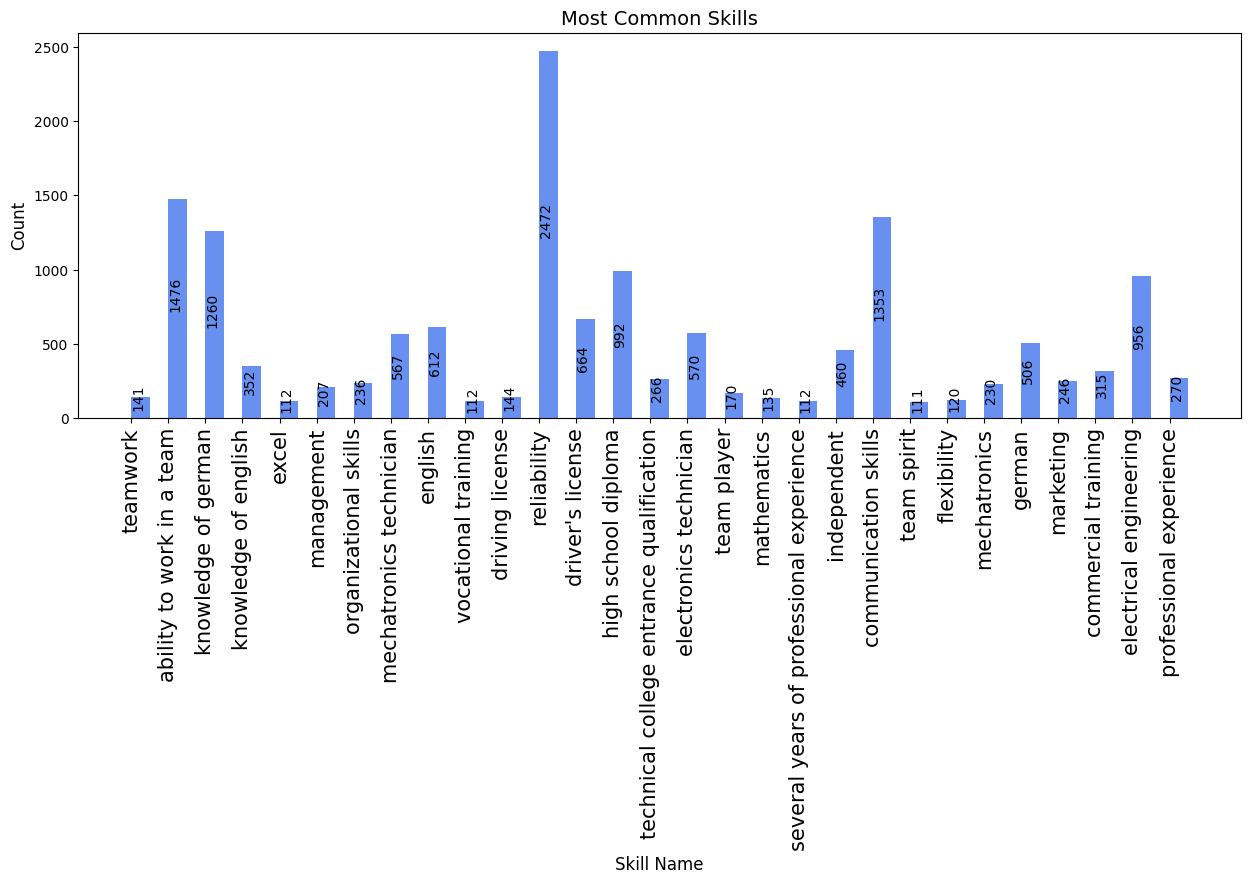

In [98]:
x= range(len(dic))
y=list(dic.values())
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']
plt.figure(figsize=(15, 5))
plt.bar(range(len(dic)), list(dic.values()), color=colors[3], align='edge', width=0.5)
plt.xticks(range(len(dic)), list(dic.keys()), rotation=90, fontsize=15)
# giving title to the plot
addlabels(x,y)
plt.title("Most Common Skills", fontsize=14)    
# giving X and Y labels
plt.xlabel("Skill Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

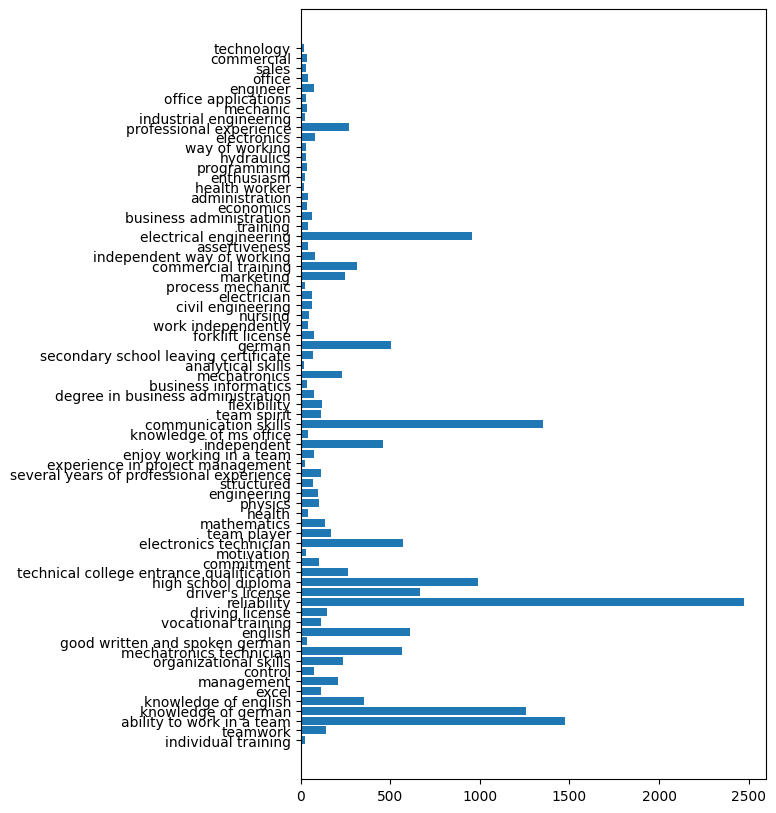

In [67]:
x= range(len(dic))
y=list(dic.values())
colors = ['#1b9e77', '#a9f971', '#fdaa48','#6890F0','#A890F0']


fig, ax = plt.subplots(figsize =(6, 10))
ax.barh(x,y)
plt.yticks(range(len(dic)), list(dic.keys()), rotation=0)

plt.show()

In [26]:
import sqlite3

In [27]:
conn = sqlite3.connect('JobsN.db')

In [28]:
cursor = conn.cursor()

In [29]:
# Drop the GEEK table if already exists.
cursor.execute("DROP TABLE IF EXISTS JobAdverticements")

In [30]:
# Creating table
table = """ CREATE TABLE JobAdverticements (
            JobID INT,
            JobTitle TEXT, 
            JobDescription TEXT, 
            Skills TEXT
        ); """

In [31]:
cursor.execute(table)

In [32]:
n=0
# Testing the NER
for i,  jobdes in enumerate(JobDescription[1:]): 
    n+=1
    doc = nlp(jobdes)
    title = JobTitle[n]
    entitiyText = ""
    for ent in doc.ents:
        entitiyText = entitiyText+ ent.text+  ' | '
    print(entitiyText)
    print()
    cursor.execute('''INSERT INTO JobAdverticements VALUES (?, ?, ?, ?)''', (i, title, jobdes, entitiyText))
    if n>25:
        break

gäubodenbäcker hahn gmbh builds | bridge between tradition | flat hierarchies | corporate culture | specialist shop in eichendorf | specialist shops: you advise and serve our customers warmly | prepare delicious snacks and coffee specialties | implementation of hygiene regulations | knowledge as a salesperson | groomed appearance | changing working hours | pleasant working atmosphere | individual training | progressive family business | gäubodenbacker hahn gmbh | strasse 18b | 

gäubodenbäcker hahn gmbh builds | bridge between tradition | flat hierarchies | corporate culture | specialist shop in regensburg | specialist shops: you advise and serve our customers warmly | prepare delicious snacks and coffee specialties | implementation of hygiene regulations | knowledge as a salesperson | groomed appearance | changing working hours | pleasant working atmosphere | individual training | progressive family business | gäubodenbacker hahn gmbh | strasse 18b | 

gäubodenbäcker hahn gmbh builds 

regional personnel service | mechatronics technician | assembly of electronic assemblies | visual inspection and testing of electronic circuits | wiring/connecting the electronics | experience in the field of electronics | training as an electronics technician/mechatronics technician | foreign certificates for completing an | apprenticeship as an electronics technician | knowledge of soldering | motivation | knowledge of german | russian | ability to work in a team | hourly wage upwards of | €17.50 | driving service | place of work. | 77933 lahr/black forest | commercial type(s | reassignment collective agreement: | |electronics technician - automation technology | 

regional personnel service | employment type(s | servicing | maintaining machines | supervision of service and fitter assignments | determination of maintenance scopes | training as an industrial mechanic | experience in the maintenance and repair of machines | troubleshooting and optimizing processes | driving service | p

In [683]:
data = conn.execute('''SELECT * FROM JobAdverticements ''')

In [684]:
output = data.fetchall() 

In [685]:
for row in output:
    print(row)
    print()

(0, 'bakery salesperson (m/f/d)', '  combined with a history of more than 100 years, gäubodenbäcker hahn gmbh builds a bridge between tradition and future. our employees have made us what we are today. that is why we treat each other at work with mutual appreciation and respectful cooperation. flat hierarchies, lots of fun and joy in our daily work characterize our corporate culture.  for our specialist shop in eichendorf, we are now looking for bakery salespeople (m/f/d) with a heart, skilled or unskilled full-time, part-time or on a mini-job basis.  your tasks...  * you sell our freshly baked goods in specialist shops: you advise and serve our customers warmly and competently * you collect with our modern cash register system * you bake fresh rolls throughout the day, prepare delicious snacks and coffee specialties and ensure that the goods are presented in an appealing way * you pay attention to the implementation of hygiene regulations and company standards, because our customers a

In [666]:
conn.commit()
conn.close()